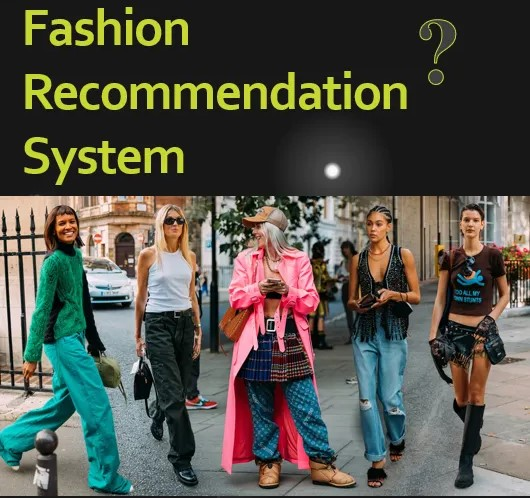 

# Introduction

In today's digital age, the importance of personalized virtual fashion experiences cannot be overstated. With the exponential growth of online platforms and social media, fashion has become a powerful tool for self-expression. Individuals seek tailored guidance to navigate the vast landscape of digital fashion, where the absence of personalized recommendations often leads to dissatisfaction and confusion.
While advances in big data, virtual fitting, and design-support systems have improved the fashion design landscape, the lack of tailored guidance remains a significant obstacle. This limits the ability of users to discover styles, create cohesive outfits, and ultimately feel satisfied with their digital fashion choices.
By addressing this personalization gap, businesses can improve customer acquisition and retention, increase conversion rates, and reduce returns. A platform that understands individual style preferences and delivers seamless outfit recommendations has the potential to revolutionize the digital fashion experience and establish a strong position within this rapidly growing market.


# Problem Statement

Digital fashion often lacks the personalized guidance and tailored styling experience that individuals receive in physical stores, leading to mismatched outfits and less confident digital self-expression.
The lack of personalized guidance in the digital fashion space significantly impacts user satisfaction and engagement. According to recent studies, over 70% of online shoppers express frustration with generic product recommendations, leading to decreased conversion rates and customer loyalty. Without tailored styling support, users struggle to curate cohesive outfits, resulting in missed opportunities for self-expression and confidence in their digital presence.


# Objectives

The main objective of this study is to build a Virtual fashion recommendation system that will help quality purchases and use of less time in trying to figure out how to match your closet.
Other objectives are to:

##### 1.	Utilize deep learning models, such as convolutional neural networks and transformers, to analyze visual features of fashion items.
##### 2.	Train models to understand compatibility, and style cohesion, and create complete, well-balanced outfits.
##### 3.	Enable hyper-personalized recommendations:
##### 4.	Gather user preferences through explicit input (questionnaires, style quizzes) and implicit data (browsing history, saved items).
##### 5.	Refine deep learning models to incorporate user data for hyper-tailored recommendations.
##### 6.	Implement a user-centric visual search:
##### 7.	Allow users to upload inspirational images or reference items.
##### 8.	Build a search system using deep learning-based image analysis to identify similar or complementary styles.


# Import Libraries

In [8]:
import tensorflow
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.layers import GlobalMaxPooling2D

# Instantiate the model

The ResNet50 model is being instantiated here.

We are loading the pre-trained ResNet50 model with ImageNet weights and excluding the top classification layers.

This means we are using the pre-trained ResNet50 model as a feature extractor.

The input shape of the model is set to (224, 224, 3) which is the standard input size for ResNet50.

In [ ]:
model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

Set the model to non-trainable

By setting the model to non-trainable, we ensure that the weights of the pre-trained ResNet50 model  are not updated during training. We are using the pre-trained weights as fixed feature extractors.

In [9]:
model.trainable = False

# Create a Sequential model

Here, we are creating a Sequential model using TensorFlow Keras.

We are adding the pre-trained ResNet50 model (which we instantiated earlier) as the first layer of the Sequential model.

We are also adding a GlobalMaxPooling2D layer after the ResNet50 model.

In [10]:
model = tensorflow.keras.Sequential([
    model,  # Adding the pre-trained ResNet50 model
    GlobalMaxPooling2D()  # Adding a GlobalMaxPooling2D layer
])

# Display the summary of the model
# The summary() function provides a summary of the model architecture, 
# including the type of each layer, output shape, and number of parameters.

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [11]:
#Import Libraries
import cv2
import numpy as np

Define the path to the image file

Here, we specify the file path where the image is stored.

If the image is not loaded successfully (i.e., img is None), print an error message.
 Otherwise, resize the image to the specified dimensions (224x224).

## Define the path to the image file

Here, we specify the file path where the image is stored.

If the image is not loaded successfully (i.e., img is None), print an error message.
 Otherwise, resize the image to the specified dimensions (224x224).
# Explanation:

path: This variable stores the file path where the image is stored.

img: This variable stores the image after it is read using OpenCV (cv2.imread()).

cv2.imread(path): This function reads the image from the specified file path.

if img is None: This condition checks if the image is loaded successfully. If the image is not loaded successfully (i.e., img is None), an error message is printed.

cv2.resize(img, (224, 224)): This function resizes the image to the specified dimensions (224x224).


In [ ]:
path = r"C:\Users\ADMIN\course\Capstoneproj\FASHION_AI_DATASET\base\Images\collar_design_labels\0a3c5f3d18291fb013cc496ac2248c26.jpg"
img = cv2.imread(path)

if img is None:
    print("Error: Unable to load image")
else:
    # Resize the image
    img = cv2.resize(img, (224, 224))

#### Below line converts the image, which is originally in OpenCV format, to a NumPy array. This conversion is necessary for further processing using NumPy functions.

In [13]:
# Convert the image to a NumPy array
# Here, we convert the image (which is originally in OpenCV format) to a NumPy array using np.array().
img = np.array(img)

# Display the shape of the image
# The shape attribute of a NumPy array returns a tuple representing the dimensions of the array.
# For an image, the shape tuple represents (height, width, number of channels).
# In this case, the shape tuple will represent the height, width, and number of color channels of the image.
print(img.shape)

(224, 224, 3)

In [14]:
# Expand the dimensions of the image array
# Here, we are expanding the dimensions of the image array using np.expand_dims().
# This is often required when working with deep learning models, which expect batch inputs.
# By adding an extra dimension at the beginning of the array, we can process a single image as if it were part of a batch of images.
expand_img = np.expand_dims(img, axis=0)

# Display the shape of the expanded image array
# The shape attribute of a NumPy array returns a tuple representing the dimensions of the array.
# In this case, the shape tuple will represent the dimensions of the expanded image array.
print(expand_img.shape)


(1, 224, 224, 3)

In [15]:
# Preprocess the expanded image array
# Here, we preprocess the expanded image array before feeding it into a neural network model.
# The preprocess_input() function is used to preprocess images according to the requirements of the specific model (in this case, ResNet50).
preprocessed_img = preprocess_input(expand_img)

# Display the shape of the preprocessed image array
# The shape attribute of a NumPy array returns a tuple representing the dimensions of the array.
# In this case, the shape tuple represents the dimensions of the preprocessed image array.
print(preprocessed_img.shape)


(1, 224, 224, 3)

In [16]:
# Get predictions from the model and flatten the results
# Here, we obtain predictions from the neural network model using the preprocessed image array.
# The model.predict() function is used to obtain predictions from the model.
# The flatten() function is used to flatten the predictions array into a one-dimensional array.
result = model.predict(preprocessed_img).flatten()

# Display the shape of the flattened results
# The shape attribute of a NumPy array returns a tuple representing the dimensions of the array.
# In this case, the shape tuple represents the shape of the flattened results array.
print(result.shape)


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


(2048,)

#### This line normalizes the results array obtained from the model predictions.

In [17]:
from numpy.linalg import norm

# Normalize the results array for better predictions
# Here, we normalize the results array obtained from the model predictions.
# The norm() function is used to calculate the L2 norm of the results array.
# Then, we divide the results array by its L2 norm to normalize it.
normalized_result = result / norm(result)

# Display the normalized results array
print(normalized_result)

# Display the shape of the normalized results array
print(normalized_result.shape)


[0.01981886 0.03148413 0.02509308 ... 0.01925113 0.0176835  0.04694058]


(2048,)

## Below function called extract_features takes an image path and a pre-trained model as input.
##### Resizes the image to match the input size of the model (224x224)
##### Converts the image to a NumPy array.
##### Preprocesses the image
##### Obtains predictions from the model and flattens the results.
##### Normalizes the results array for better predictions.
##### Returns the normalized results array

In [18]:
# Function to extract features from an image
# Here, we define a function called extract_features that takes an image path and a pre-trained model as input.
# The function reads the image from the specified path, preprocesses it, passes it through the model to extract features,
# and then normalizes the features for better predictions.
def extract_features(img_path, model):
    # Read the image using OpenCV
    img = cv2.imread(img_path)
    
    # Resize the image to match the input size of the model (224x224)
    img = cv2.resize(img, (224, 224))
    
    # Convert the image to a NumPy array
    img = np.array(img)
    
    # Expand the dimensions of the image array
    expand_img = np.expand_dims(img, axis=0)
    
    # Preprocess the image
    preprocessed_img = preprocess_input(expand_img)
    
    # Get predictions from the model and flatten the results
    result = model.predict(preprocessed_img).flatten()
    
    # Normalize the results array for better predictions
    normalized_result = result / norm(result)
    
    return normalized_result  

In [19]:
import os

In [20]:
# Define the root folder containing subfolders (classes) of images
root_folder = "Images"
# Create empty lists to store file names and feature vectors
filename = []
feature_list = []

# Iterate through each subfolder (class) inside the root folder
for class_folder in os.listdir(root_folder):
    class_path = os.path.join(root_folder, class_folder)
    
    # Check if the item in the root folder is a directory
    if os.path.isdir(class_path):
        # Iterate through each file within the class folder
        for file in os.listdir(class_path):
            # Append the file path to the filename list
            filename.append(os.path.join(class_path, file))

In [21]:
filename[1:10]

['Images\\coat_length_labels\\000a7bac19435a6a009d4d817293c779.jpg',
 'Images\\coat_length_labels\\00187c92481171bfa6e3d75184c74c3a.jpg',
 'Images\\coat_length_labels\\0019c11b6b0eaba29749e59391119040.jpg',
 'Images\\coat_length_labels\\001f79f24e49fb08bc1d16953a2e9f7d.jpg',
 'Images\\coat_length_labels\\00320fd9c425cc72f8130e07e60d8fa8.jpg',
 'Images\\coat_length_labels\\003abb66838d45039dadeac1ca0e1926.jpg',
 'Images\\coat_length_labels\\00596d461e2b316d2efc15d6a664da16.jpg',
 'Images\\coat_length_labels\\00669d7948938f9132a2e822c4625bee.jpg',
 'Images\\coat_length_labels\\006b6a336692af75b058046ab11719f0.jpg']

In [22]:
from tqdm import tqdm

In [23]:
#for file in tqdm(filename):
    #feature_list.append(extract_features(file,model))

import time

for file in tqdm(filename, desc="Processing files"):
    feature_list.append(extract_features(file,model))
    time.sleep(0.1)  # Simulating processing time
    

Processing files:   0%|          | 0/79573 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


Processing files:   0%|          | 1/79573 [00:00<12:15:49,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


Processing files:   0%|          | 2/79573 [00:01<12:01:11,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


Processing files:   0%|          | 3/79573 [00:01<13:24:14,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


Processing files:   0%|          | 4/79573 [00:02<14:35:33,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


Processing files:   0%|          | 5/79573 [00:03<15:16:30,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


Processing files:   0%|          | 6/79573 [00:03<15:10:08,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


Processing files:   0%|          | 7/79573 [00:04<15:36:30,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Processing files:   0%|          | 8/79573 [00:05<15:51:12,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


Processing files:   0%|          | 9/79573 [00:06<16:12:33,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing files:   0%|          | 10/79573 [00:06<14:48:56,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


Processing files:   0%|          | 11/79573 [00:07<14:21:50,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


Processing files:   0%|          | 12/79573 [00:08<14:47:22,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


Processing files:   0%|          | 13/79573 [00:08<15:23:59,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


Processing files:   0%|          | 14/79573 [00:09<15:43:34,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing files:   0%|          | 15/79573 [00:10<14:48:30,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


Processing files:   0%|          | 16/79573 [00:10<14:47:28,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


Processing files:   0%|          | 17/79573 [00:11<15:50:52,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing files:   0%|          | 18/79573 [00:12<14:24:27,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


Processing files:   0%|          | 19/79573 [00:12<14:49:24,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Processing files:   0%|          | 20/79573 [00:13<15:12:32,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


Processing files:   0%|          | 21/79573 [00:14<15:22:39,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing files:   0%|          | 22/79573 [00:14<13:47:27,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


Processing files:   0%|          | 23/79573 [00:15<14:29:10,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


Processing files:   0%|          | 24/79573 [00:16<15:07:35,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


Processing files:   0%|          | 25/79573 [00:16<15:34:34,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing files:   0%|          | 26/79573 [00:17<14:35:17,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


Processing files:   0%|          | 27/79573 [00:18<14:10:05,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Processing files:   0%|          | 28/79573 [00:18<13:32:15,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


Processing files:   0%|          | 29/79573 [00:19<14:18:45,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing files:   0%|          | 30/79573 [00:19<13:43:34,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


Processing files:   0%|          | 31/79573 [00:20<13:49:27,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing files:   0%|          | 32/79573 [00:20<12:23:48,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing files:   0%|          | 33/79573 [00:21<11:33:11,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


Processing files:   0%|          | 34/79573 [00:21<11:38:54,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


Processing files:   0%|          | 35/79573 [00:22<12:41:13,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


Processing files:   0%|          | 36/79573 [00:23<12:26:10,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


Processing files:   0%|          | 37/79573 [00:23<13:18:08,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


Processing files:   0%|          | 38/79573 [00:24<12:47:01,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


Processing files:   0%|          | 39/79573 [00:25<13:25:16,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


Processing files:   0%|          | 40/79573 [00:25<14:17:08,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


Processing files:   0%|          | 41/79573 [00:26<14:57:29,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing files:   0%|          | 42/79573 [00:27<13:57:08,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


Processing files:   0%|          | 43/79573 [00:27<14:53:47,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing files:   0%|          | 44/79573 [00:28<13:23:50,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


Processing files:   0%|          | 45/79573 [00:29<13:56:15,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Processing files:   0%|          | 46/79573 [00:29<14:43:56,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


Processing files:   0%|          | 47/79573 [00:30<15:14:15,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


Processing files:   0%|          | 48/79573 [00:31<16:00:53,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


Processing files:   0%|          | 49/79573 [00:32<16:22:24,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


Processing files:   0%|          | 50/79573 [00:32<17:23:55,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


Processing files:   0%|          | 51/79573 [00:33<16:03:41,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing files:   0%|          | 52/79573 [00:34<14:58:28,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing files:   0%|          | 53/79573 [00:34<14:00:36,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Processing files:   0%|          | 54/79573 [00:35<14:41:57,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


Processing files:   0%|          | 55/79573 [00:36<14:56:06,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Processing files:   0%|          | 56/79573 [00:36<15:20:41,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


Processing files:   0%|          | 57/79573 [00:37<15:49:32,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing files:   0%|          | 58/79573 [00:38<14:39:09,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


Processing files:   0%|          | 59/79573 [00:38<14:34:50,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Processing files:   0%|          | 60/79573 [00:39<15:00:40,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing files:   0%|          | 61/79573 [00:40<13:44:09,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


Processing files:   0%|          | 62/79573 [00:40<14:35:45,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   0%|          | 63/79573 [00:41<13:19:14,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


Processing files:   0%|          | 64/79573 [00:41<13:20:13,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


Processing files:   0%|          | 65/79573 [00:42<12:39:13,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


Processing files:   0%|          | 66/79573 [00:42<12:52:19,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing files:   0%|          | 67/79573 [00:43<12:04:18,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing files:   0%|          | 68/79573 [00:43<11:33:21,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing files:   0%|          | 69/79573 [00:44<10:49:54,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


Processing files:   0%|          | 70/79573 [00:44<11:57:18,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


Processing files:   0%|          | 71/79573 [00:45<13:25:50,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


Processing files:   0%|          | 72/79573 [00:46<13:15:38,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing files:   0%|          | 73/79573 [00:46<13:01:19,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


Processing files:   0%|          | 74/79573 [00:47<14:28:38,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


Processing files:   0%|          | 75/79573 [00:48<13:55:38,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


Processing files:   0%|          | 76/79573 [00:48<14:30:26,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing files:   0%|          | 77/79573 [00:49<13:38:05,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


Processing files:   0%|          | 78/79573 [00:50<13:37:55,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


Processing files:   0%|          | 79/79573 [00:50<14:30:41,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


Processing files:   0%|          | 80/79573 [00:51<15:14:19,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


Processing files:   0%|          | 81/79573 [00:52<15:46:15,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Processing files:   0%|          | 82/79573 [00:52<13:44:40,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


Processing files:   0%|          | 83/79573 [00:53<14:44:05,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing files:   0%|          | 84/79573 [00:53<12:59:25,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


Processing files:   0%|          | 85/79573 [00:54<13:22:05,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing files:   0%|          | 86/79573 [00:55<12:02:47,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


Processing files:   0%|          | 87/79573 [00:55<12:17:10,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   0%|          | 88/79573 [00:56<11:54:31,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


Processing files:   0%|          | 89/79573 [00:56<13:27:15,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Processing files:   0%|          | 90/79573 [00:57<14:23:47,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


Processing files:   0%|          | 91/79573 [00:58<15:00:13,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing files:   0%|          | 92/79573 [00:58<13:39:00,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


Processing files:   0%|          | 93/79573 [00:59<14:44:19,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing files:   0%|          | 94/79573 [01:00<13:40:54,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


Processing files:   0%|          | 95/79573 [01:00<14:23:18,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


Processing files:   0%|          | 96/79573 [01:01<15:19:21,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


Processing files:   0%|          | 97/79573 [01:02<15:02:04,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing files:   0%|          | 98/79573 [01:02<13:50:18,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


Processing files:   0%|          | 99/79573 [01:03<14:44:07,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing files:   0%|          | 100/79573 [01:04<13:19:36,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


Processing files:   0%|          | 101/79573 [01:04<14:11:13,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing files:   0%|          | 102/79573 [01:05<14:06:49,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


Processing files:   0%|          | 103/79573 [01:06<14:14:20,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


Processing files:   0%|          | 104/79573 [01:06<15:07:06,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing files:   0%|          | 105/79573 [01:07<13:11:57,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


Processing files:   0%|          | 106/79573 [01:07<13:19:58,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing files:   0%|          | 107/79573 [01:08<11:52:21,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing files:   0%|          | 108/79573 [01:08<11:06:41,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


Processing files:   0%|          | 109/79573 [01:09<12:43:02,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


Processing files:   0%|          | 110/79573 [01:10<13:16:51,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


Processing files:   0%|          | 111/79573 [01:10<12:54:16,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing files:   0%|          | 112/79573 [01:11<11:57:11,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Processing files:   0%|          | 113/79573 [01:11<13:12:37,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


Processing files:   0%|          | 114/79573 [01:12<14:08:46,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing files:   0%|          | 115/79573 [01:13<13:31:20,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


Processing files:   0%|          | 116/79573 [01:13<14:49:52,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing files:   0%|          | 117/79573 [01:14<13:39:24,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


Processing files:   0%|          | 118/79573 [01:15<14:23:41,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


Processing files:   0%|          | 119/79573 [01:15<15:17:10,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   0%|          | 120/79573 [01:16<13:40:19,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


Processing files:   0%|          | 121/79573 [01:17<14:40:18,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


Processing files:   0%|          | 122/79573 [01:17<15:26:17,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


Processing files:   0%|          | 123/79573 [01:18<15:52:08,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing files:   0%|          | 124/79573 [01:19<14:25:24,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Processing files:   0%|          | 125/79573 [01:19<14:51:28,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Processing files:   0%|          | 126/79573 [01:20<15:10:45,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


Processing files:   0%|          | 127/79573 [01:21<15:12:38,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing files:   0%|          | 128/79573 [01:21<13:25:40,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


Processing files:   0%|          | 129/79573 [01:22<13:58:47,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing files:   0%|          | 130/79573 [01:22<13:23:17,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


Processing files:   0%|          | 131/79573 [01:23<14:28:19,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


Processing files:   0%|          | 132/79573 [01:24<13:41:42,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


Processing files:   0%|          | 133/79573 [01:24<14:34:47,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


Processing files:   0%|          | 134/79573 [01:25<15:28:16,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


Processing files:   0%|          | 135/79573 [01:26<15:28:21,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing files:   0%|          | 136/79573 [01:26<13:38:58,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


Processing files:   0%|          | 137/79573 [01:27<14:45:26,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


Processing files:   0%|          | 138/79573 [01:28<14:35:03,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing files:   0%|          | 139/79573 [01:28<13:50:03,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


Processing files:   0%|          | 140/79573 [01:29<14:47:24,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing files:   0%|          | 141/79573 [01:30<13:55:08,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


Processing files:   0%|          | 142/79573 [01:30<14:29:45,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


Processing files:   0%|          | 143/79573 [01:31<15:23:10,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing files:   0%|          | 144/79573 [01:32<14:07:23,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


Processing files:   0%|          | 145/79573 [01:32<14:28:18,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


Processing files:   0%|          | 146/79573 [01:33<14:05:04,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


Processing files:   0%|          | 147/79573 [01:34<14:15:10,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing files:   0%|          | 148/79573 [01:34<13:12:47,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   0%|          | 149/79573 [01:35<12:18:09,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


Processing files:   0%|          | 150/79573 [01:35<13:36:59,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


Processing files:   0%|          | 151/79573 [01:36<14:31:52,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


Processing files:   0%|          | 152/79573 [01:37<14:03:54,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing files:   0%|          | 153/79573 [01:37<12:39:30,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


Processing files:   0%|          | 154/79573 [01:38<12:55:42,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


Processing files:   0%|          | 155/79573 [01:38<13:36:47,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


Processing files:   0%|          | 156/79573 [01:39<13:28:53,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing files:   0%|          | 157/79573 [01:40<12:26:20,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing files:   0%|          | 158/79573 [01:40<11:20:58,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


Processing files:   0%|          | 159/79573 [01:41<11:52:52,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


Processing files:   0%|          | 160/79573 [01:41<13:37:30,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing files:   0%|          | 161/79573 [01:42<12:07:06,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing files:   0%|          | 162/79573 [01:42<12:19:53,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


Processing files:   0%|          | 163/79573 [01:43<13:34:18,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   0%|          | 164/79573 [01:43<12:28:36,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


Processing files:   0%|          | 165/79573 [01:44<12:44:55,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


Processing files:   0%|          | 166/79573 [01:45<11:55:38,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


Processing files:   0%|          | 167/79573 [01:45<13:39:52,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   0%|          | 168/79573 [01:46<12:23:57,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing files:   0%|          | 169/79573 [01:46<12:13:37,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing files:   0%|          | 170/79573 [01:47<11:44:27,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing files:   0%|          | 171/79573 [01:47<11:24:35,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing files:   0%|          | 172/79573 [01:48<11:01:54,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   0%|          | 173/79573 [01:48<11:25:46,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing files:   0%|          | 174/79573 [01:49<11:29:00,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


Processing files:   0%|          | 175/79573 [01:49<12:13:53,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


Processing files:   0%|          | 176/79573 [01:50<13:08:48,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


Processing files:   0%|          | 177/79573 [01:51<13:51:33,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


Processing files:   0%|          | 178/79573 [01:52<14:37:35,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing files:   0%|          | 179/79573 [01:52<13:21:51,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing files:   0%|          | 180/79573 [01:53<12:16:09,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing files:   0%|          | 181/79573 [01:53<12:17:38,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing files:   0%|          | 182/79573 [01:54<11:45:16,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing files:   0%|          | 183/79573 [01:54<11:23:45,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing files:   0%|          | 184/79573 [01:54<10:56:44,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing files:   0%|          | 185/79573 [01:55<11:32:23,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing files:   0%|          | 186/79573 [01:56<11:05:37,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


Processing files:   0%|          | 187/79573 [01:56<11:51:36,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


Processing files:   0%|          | 188/79573 [01:57<11:57:39,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


Processing files:   0%|          | 189/79573 [01:57<12:37:52,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing files:   0%|          | 190/79573 [01:58<12:27:26,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing files:   0%|          | 191/79573 [01:58<12:24:30,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


Processing files:   0%|          | 192/79573 [01:59<13:21:42,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


Processing files:   0%|          | 193/79573 [02:00<12:54:01,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing files:   0%|          | 194/79573 [02:00<12:20:14,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Processing files:   0%|          | 195/79573 [02:01<13:19:47,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing files:   0%|          | 196/79573 [02:01<12:44:53,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


Processing files:   0%|          | 197/79573 [02:02<14:17:10,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   0%|          | 198/79573 [02:03<13:04:15,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing files:   0%|          | 199/79573 [02:03<13:01:16,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing files:   0%|          | 200/79573 [02:04<12:49:41,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing files:   0%|          | 201/79573 [02:04<12:46:30,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


Processing files:   0%|          | 202/79573 [02:05<12:40:50,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing files:   0%|          | 203/79573 [02:05<11:59:06,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing files:   0%|          | 204/79573 [02:06<12:33:06,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


Processing files:   0%|          | 205/79573 [02:07<12:58:28,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing files:   0%|          | 206/79573 [02:07<12:31:10,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


Processing files:   0%|          | 207/79573 [02:08<14:09:18,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing files:   0%|          | 208/79573 [02:08<12:58:17,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing files:   0%|          | 209/79573 [02:09<12:48:49,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


Processing files:   0%|          | 210/79573 [02:10<12:52:08,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


Processing files:   0%|          | 211/79573 [02:10<14:00:54,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


Processing files:   0%|          | 212/79573 [02:11<14:44:32,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


Processing files:   0%|          | 213/79573 [02:12<14:27:23,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   0%|          | 214/79573 [02:12<13:04:01,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


Processing files:   0%|          | 215/79573 [02:13<14:20:27,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing files:   0%|          | 216/79573 [02:13<13:02:50,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing files:   0%|          | 217/79573 [02:14<12:53:07,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   0%|          | 218/79573 [02:14<12:06:11,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


Processing files:   0%|          | 219/79573 [02:15<13:19:43,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


Processing files:   0%|          | 220/79573 [02:16<13:23:12,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   0%|          | 221/79573 [02:16<13:14:09,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


Processing files:   0%|          | 222/79573 [02:17<14:50:44,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing files:   0%|          | 223/79573 [02:18<13:12:22,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing files:   0%|          | 224/79573 [02:18<12:15:10,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


Processing files:   0%|          | 225/79573 [02:19<13:18:10,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


Processing files:   0%|          | 226/79573 [02:19<13:22:13,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   0%|          | 227/79573 [02:20<12:13:36,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing files:   0%|          | 228/79573 [02:20<11:28:31,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing files:   0%|          | 229/79573 [02:21<11:06:33,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


Processing files:   0%|          | 230/79573 [02:21<12:00:06,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


Processing files:   0%|          | 231/79573 [02:22<12:37:10,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing files:   0%|          | 232/79573 [02:23<11:50:52,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


Processing files:   0%|          | 233/79573 [02:23<13:11:41,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing files:   0%|          | 234/79573 [02:24<12:09:13,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   0%|          | 235/79573 [02:24<11:53:07,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing files:   0%|          | 236/79573 [02:25<11:46:58,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing files:   0%|          | 237/79573 [02:25<11:08:25,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing files:   0%|          | 238/79573 [02:26<11:10:51,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


Processing files:   0%|          | 239/79573 [02:26<12:06:17,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


Processing files:   0%|          | 240/79573 [02:27<12:09:24,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   0%|          | 241/79573 [02:27<11:30:00,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


Processing files:   0%|          | 242/79573 [02:28<12:50:02,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing files:   0%|          | 243/79573 [02:29<12:33:57,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


Processing files:   0%|          | 244/79573 [02:29<14:06:00,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


Processing files:   0%|          | 245/79573 [02:30<14:26:08,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing files:   0%|          | 246/79573 [02:31<13:07:37,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


Processing files:   0%|          | 247/79573 [02:31<14:27:59,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


Processing files:   0%|          | 248/79573 [02:32<15:15:07,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


Processing files:   0%|          | 249/79573 [02:33<14:04:57,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing files:   0%|          | 250/79573 [02:33<13:34:32,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


Processing files:   0%|          | 251/79573 [02:34<13:32:06,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing files:   0%|          | 252/79573 [02:34<12:29:28,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


Processing files:   0%|          | 253/79573 [02:35<13:00:40,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


Processing files:   0%|          | 254/79573 [02:36<13:21:50,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


Processing files:   0%|          | 255/79573 [02:36<13:19:25,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


Processing files:   0%|          | 256/79573 [02:37<13:21:28,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing files:   0%|          | 257/79573 [02:37<12:28:41,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


Processing files:   0%|          | 258/79573 [02:38<13:34:28,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Processing files:   0%|          | 259/79573 [02:39<14:14:01,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


Processing files:   0%|          | 260/79573 [02:39<14:22:36,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


Processing files:   0%|          | 261/79573 [02:40<15:11:56,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


Processing files:   0%|          | 262/79573 [02:41<15:11:10,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   0%|          | 263/79573 [02:41<13:18:31,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing files:   0%|          | 264/79573 [02:42<11:50:23,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


Processing files:   0%|          | 265/79573 [02:42<13:24:03,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing files:   0%|          | 266/79573 [02:43<12:43:20,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing files:   0%|          | 267/79573 [02:43<12:09:18,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


Processing files:   0%|          | 268/79573 [02:44<13:28:24,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


Processing files:   0%|          | 269/79573 [02:45<14:11:26,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Processing files:   0%|          | 270/79573 [02:46<14:41:09,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing files:   0%|          | 271/79573 [02:46<14:14:21,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing files:   0%|          | 272/79573 [02:47<13:38:23,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


Processing files:   0%|          | 273/79573 [02:47<14:09:39,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


Processing files:   0%|          | 274/79573 [02:48<14:52:32,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


Processing files:   0%|          | 275/79573 [02:49<14:58:08,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


Processing files:   0%|          | 276/79573 [02:50<15:01:45,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


Processing files:   0%|          | 277/79573 [02:50<14:56:37,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing files:   0%|          | 278/79573 [02:51<13:57:08,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Processing files:   0%|          | 279/79573 [02:51<14:27:00,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing files:   0%|          | 280/79573 [02:52<13:12:43,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing files:   0%|          | 281/79573 [02:52<12:03:33,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing files:   0%|          | 282/79573 [02:53<11:49:15,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing files:   0%|          | 283/79573 [02:53<11:30:46,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


Processing files:   0%|          | 284/79573 [02:54<13:14:21,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


Processing files:   0%|          | 285/79573 [02:55<13:02:57,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Processing files:   0%|          | 286/79573 [02:55<13:50:04,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


Processing files:   0%|          | 287/79573 [02:56<14:43:15,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


Processing files:   0%|          | 288/79573 [02:57<14:29:54,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing files:   0%|          | 289/79573 [02:57<13:13:42,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


Processing files:   0%|          | 290/79573 [02:58<14:13:33,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing files:   0%|          | 291/79573 [02:59<13:16:25,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


Processing files:   0%|          | 292/79573 [02:59<14:20:26,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


Processing files:   0%|          | 293/79573 [03:00<14:05:39,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Processing files:   0%|          | 294/79573 [03:01<14:42:52,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


Processing files:   0%|          | 295/79573 [03:01<15:17:13,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Processing files:   0%|          | 296/79573 [03:02<15:26:06,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing files:   0%|          | 297/79573 [03:03<13:53:53,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing files:   0%|          | 298/79573 [03:03<13:05:21,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


Processing files:   0%|          | 299/79573 [03:04<12:57:16,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


Processing files:   0%|          | 300/79573 [03:04<14:02:44,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


Processing files:   0%|          | 301/79573 [03:05<14:11:42,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing files:   0%|          | 302/79573 [03:06<12:51:27,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


Processing files:   0%|          | 303/79573 [03:06<12:50:31,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   0%|          | 304/79573 [03:07<12:21:25,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing files:   0%|          | 305/79573 [03:07<11:57:36,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Processing files:   0%|          | 306/79573 [03:08<12:13:42,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   0%|          | 307/79573 [03:08<11:45:53,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing files:   0%|          | 308/79573 [03:09<11:47:37,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


Processing files:   0%|          | 309/79573 [03:09<12:43:55,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Processing files:   0%|          | 310/79573 [03:10<13:38:47,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


Processing files:   0%|          | 311/79573 [03:11<14:06:00,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing files:   0%|          | 312/79573 [03:11<12:21:56,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


Processing files:   0%|          | 313/79573 [03:12<13:15:10,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


Processing files:   0%|          | 314/79573 [03:13<14:09:45,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing files:   0%|          | 315/79573 [03:13<13:12:42,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


Processing files:   0%|          | 316/79573 [03:14<12:58:09,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


Processing files:   0%|          | 317/79573 [03:14<14:01:48,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing files:   0%|          | 318/79573 [03:15<12:37:19,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing files:   0%|          | 319/79573 [03:15<12:27:57,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


Processing files:   0%|          | 320/79573 [03:16<13:12:43,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Processing files:   0%|          | 321/79573 [03:17<14:01:24,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


Processing files:   0%|          | 322/79573 [03:18<14:14:41,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


Processing files:   0%|          | 323/79573 [03:18<14:42:11,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing files:   0%|          | 324/79573 [03:19<13:25:36,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


Processing files:   0%|          | 325/79573 [03:19<14:28:34,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


Processing files:   0%|          | 326/79573 [03:20<14:30:39,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


Processing files:   0%|          | 327/79573 [03:21<14:08:18,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


Processing files:   0%|          | 328/79573 [03:21<13:52:57,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


Processing files:   0%|          | 329/79573 [03:22<14:20:40,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing files:   0%|          | 330/79573 [03:22<12:42:30,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


Processing files:   0%|          | 331/79573 [03:23<12:31:27,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   0%|          | 332/79573 [03:23<11:28:59,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Processing files:   0%|          | 333/79573 [03:24<11:17:52,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


Processing files:   0%|          | 334/79573 [03:25<12:25:29,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


Processing files:   0%|          | 335/79573 [03:25<13:54:38,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


Processing files:   0%|          | 336/79573 [03:26<12:05:20,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


Processing files:   0%|          | 337/79573 [03:26<13:23:44,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


Processing files:   0%|          | 338/79573 [03:27<14:20:20,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


Processing files:   0%|          | 339/79573 [03:28<14:37:54,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing files:   0%|          | 340/79573 [03:28<13:24:37,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


Processing files:   0%|          | 341/79573 [03:29<13:45:15,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


Processing files:   0%|          | 342/79573 [03:30<13:25:04,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


Processing files:   0%|          | 343/79573 [03:30<13:30:19,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


Processing files:   0%|          | 344/79573 [03:31<14:28:37,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


Processing files:   0%|          | 345/79573 [03:32<15:03:30,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


Processing files:   0%|          | 346/79573 [03:33<15:33:55,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


Processing files:   0%|          | 347/79573 [03:33<15:40:43,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing files:   0%|          | 348/79573 [03:34<14:18:41,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


Processing files:   0%|          | 349/79573 [03:34<13:49:56,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing files:   0%|          | 350/79573 [03:35<12:32:46,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing files:   0%|          | 351/79573 [03:35<11:53:44,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


Processing files:   0%|          | 352/79573 [03:36<12:50:39,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


Processing files:   0%|          | 353/79573 [03:37<13:08:02,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing files:   0%|          | 354/79573 [03:37<12:56:12,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing files:   0%|          | 355/79573 [03:38<12:14:33,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


Processing files:   0%|          | 356/79573 [03:38<13:40:38,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


Processing files:   0%|          | 357/79573 [03:39<13:35:32,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


Processing files:   0%|          | 358/79573 [03:40<13:37:36,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


Processing files:   0%|          | 359/79573 [03:40<13:12:12,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Processing files:   0%|          | 360/79573 [03:41<13:51:43,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing files:   0%|          | 361/79573 [03:41<12:33:59,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing files:   0%|          | 362/79573 [03:42<12:15:51,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


Processing files:   0%|          | 363/79573 [03:43<13:11:09,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing files:   0%|          | 364/79573 [03:43<13:05:12,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


Processing files:   0%|          | 365/79573 [03:44<13:00:40,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


Processing files:   0%|          | 366/79573 [03:44<14:08:54,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


Processing files:   0%|          | 367/79573 [03:45<14:03:27,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


Processing files:   0%|          | 368/79573 [03:46<14:35:16,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing files:   0%|          | 369/79573 [03:46<13:29:35,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing files:   0%|          | 370/79573 [03:47<12:27:37,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


Processing files:   0%|          | 371/79573 [03:48<13:41:00,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


Processing files:   0%|          | 372/79573 [03:48<14:47:25,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


Processing files:   0%|          | 373/79573 [03:49<14:28:11,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


Processing files:   0%|          | 374/79573 [03:50<14:35:00,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


Processing files:   0%|          | 375/79573 [03:50<15:10:48,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing files:   0%|          | 376/79573 [03:51<13:16:16,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


Processing files:   0%|          | 377/79573 [03:52<14:12:55,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


Processing files:   0%|          | 378/79573 [03:52<15:07:50,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Processing files:   0%|          | 379/79573 [03:53<14:57:18,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing files:   0%|          | 380/79573 [03:53<13:32:25,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


Processing files:   0%|          | 381/79573 [03:54<13:41:55,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


Processing files:   0%|          | 382/79573 [03:55<13:15:14,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


Processing files:   0%|          | 383/79573 [03:55<14:22:35,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


Processing files:   0%|          | 384/79573 [03:56<14:19:32,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing files:   0%|          | 385/79573 [03:56<12:46:14,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


Processing files:   0%|          | 386/79573 [03:57<14:03:13,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


Processing files:   0%|          | 387/79573 [03:58<14:32:56,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


Processing files:   0%|          | 388/79573 [03:59<14:31:50,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


Processing files:   0%|          | 389/79573 [03:59<13:57:24,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


Processing files:   0%|          | 390/79573 [04:00<13:53:35,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


Processing files:   0%|          | 391/79573 [04:00<13:34:02,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


Processing files:   0%|          | 392/79573 [04:01<14:08:28,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


Processing files:   0%|          | 393/79573 [04:02<13:21:30,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


Processing files:   0%|          | 394/79573 [04:02<14:25:29,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   0%|          | 395/79573 [04:03<13:40:42,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


Processing files:   0%|          | 396/79573 [04:04<14:06:16,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


Processing files:   0%|          | 397/79573 [04:04<15:06:38,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing files:   1%|          | 398/79573 [04:05<13:33:22,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Processing files:   1%|          | 399/79573 [04:06<14:16:56,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


Processing files:   1%|          | 400/79573 [04:06<15:10:26,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


Processing files:   1%|          | 401/79573 [04:07<14:21:42,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing files:   1%|          | 402/79573 [04:07<13:23:31,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing files:   1%|          | 403/79573 [04:08<12:43:07,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing files:   1%|          | 404/79573 [04:08<11:58:46,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing files:   1%|          | 405/79573 [04:09<11:43:07,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   1%|          | 406/79573 [04:09<11:24:41,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


Processing files:   1%|          | 407/79573 [04:10<12:16:46,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


Processing files:   1%|          | 408/79573 [04:11<12:45:01,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing files:   1%|          | 409/79573 [04:11<11:20:17,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing files:   1%|          | 410/79573 [04:12<11:03:02,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing files:   1%|          | 411/79573 [04:12<11:01:06,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing files:   1%|          | 412/79573 [04:13<11:01:44,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


Processing files:   1%|          | 413/79573 [04:13<11:03:29,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


Processing files:   1%|          | 414/79573 [04:14<11:09:16,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


Processing files:   1%|          | 415/79573 [04:14<10:53:33,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


Processing files:   1%|          | 416/79573 [04:15<12:14:29,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


Processing files:   1%|          | 417/79573 [04:15<13:38:04,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing files:   1%|          | 418/79573 [04:16<13:10:08,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing files:   1%|          | 419/79573 [04:16<12:14:31,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing files:   1%|          | 420/79573 [04:17<11:35:50,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


Processing files:   1%|          | 421/79573 [04:17<10:33:31,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


Processing files:   1%|          | 422/79573 [04:18<11:51:07,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Processing files:   1%|          | 423/79573 [04:19<12:59:59,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


Processing files:   1%|          | 424/79573 [04:19<12:54:45,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


Processing files:   1%|          | 425/79573 [04:20<13:44:46,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing files:   1%|          | 426/79573 [04:20<12:17:11,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing files:   1%|          | 427/79573 [04:21<11:51:26,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Processing files:   1%|          | 428/79573 [04:22<13:04:47,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


Processing files:   1%|          | 429/79573 [04:22<13:26:50,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


Processing files:   1%|          | 430/79573 [04:23<12:48:38,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


Processing files:   1%|          | 431/79573 [04:23<13:02:11,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing files:   1%|          | 432/79573 [04:24<12:25:22,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing files:   1%|          | 433/79573 [04:24<12:04:26,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


Processing files:   1%|          | 434/79573 [04:25<13:34:57,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


Processing files:   1%|          | 435/79573 [04:26<13:28:39,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


Processing files:   1%|          | 436/79573 [04:27<14:25:42,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


Processing files:   1%|          | 437/79573 [04:27<13:54:13,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


Processing files:   1%|          | 438/79573 [04:28<14:08:04,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing files:   1%|          | 439/79573 [04:28<13:05:40,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


Processing files:   1%|          | 440/79573 [04:29<14:12:30,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


Processing files:   1%|          | 441/79573 [04:30<14:20:32,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Processing files:   1%|          | 442/79573 [04:30<14:55:31,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


Processing files:   1%|          | 443/79573 [04:31<15:16:49,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


Processing files:   1%|          | 444/79573 [04:32<14:53:58,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


Processing files:   1%|          | 445/79573 [04:33<15:28:51,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


Processing files:   1%|          | 446/79573 [04:33<15:04:32,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


Processing files:   1%|          | 447/79573 [04:34<14:24:18,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


Processing files:   1%|          | 448/79573 [04:34<13:54:26,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing files:   1%|          | 449/79573 [04:35<13:15:07,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   1%|          | 450/79573 [04:35<12:48:59,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


Processing files:   1%|          | 451/79573 [04:36<12:36:34,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing files:   1%|          | 452/79573 [04:36<11:52:35,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing files:   1%|          | 453/79573 [04:37<11:06:12,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


Processing files:   1%|          | 454/79573 [04:37<10:57:17,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing files:   1%|          | 455/79573 [04:38<11:22:14,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing files:   1%|          | 456/79573 [04:38<11:30:05,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing files:   1%|          | 457/79573 [04:39<11:09:30,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing files:   1%|          | 458/79573 [04:39<10:39:09,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


Processing files:   1%|          | 459/79573 [04:40<12:34:09,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Processing files:   1%|          | 460/79573 [04:41<13:34:24,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


Processing files:   1%|          | 461/79573 [04:41<12:52:26,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


Processing files:   1%|          | 462/79573 [04:42<14:05:57,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


Processing files:   1%|          | 463/79573 [04:43<13:33:45,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


Processing files:   1%|          | 464/79573 [04:43<14:00:44,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


Processing files:   1%|          | 465/79573 [04:44<14:05:46,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


Processing files:   1%|          | 466/79573 [04:45<14:18:23,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


Processing files:   1%|          | 467/79573 [04:46<15:12:57,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing files:   1%|          | 468/79573 [04:46<13:10:59,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing files:   1%|          | 469/79573 [04:46<12:34:47,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


Processing files:   1%|          | 470/79573 [04:47<13:58:48,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


Processing files:   1%|          | 471/79573 [04:48<14:35:36,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


Processing files:   1%|          | 472/79573 [04:49<14:34:28,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


Processing files:   1%|          | 473/79573 [04:49<14:24:38,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


Processing files:   1%|          | 474/79573 [04:50<13:56:17,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


Processing files:   1%|          | 475/79573 [04:50<13:19:22,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


Processing files:   1%|          | 476/79573 [04:51<13:53:05,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


Processing files:   1%|          | 477/79573 [04:51<12:32:45,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing files:   1%|          | 478/79573 [04:52<14:08:34,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


Processing files:   1%|          | 479/79573 [04:53<14:23:33,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing files:   1%|          | 480/79573 [04:53<13:19:16,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing files:   1%|          | 481/79573 [04:54<12:07:35,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing files:   1%|          | 482/79573 [04:54<11:33:08,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing files:   1%|          | 483/79573 [04:55<10:41:01,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing files:   1%|          | 484/79573 [04:55<10:35:30,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Processing files:   1%|          | 485/79573 [04:56<10:29:44,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing files:   1%|          | 486/79573 [04:56<11:00:23,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


Processing files:   1%|          | 487/79573 [04:57<12:15:26,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing files:   1%|          | 488/79573 [04:57<11:39:38,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing files:   1%|          | 489/79573 [04:58<11:07:21,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing files:   1%|          | 490/79573 [04:58<10:36:01,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


Processing files:   1%|          | 491/79573 [04:59<10:42:59,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing files:   1%|          | 492/79573 [04:59<10:06:49,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing files:   1%|          | 493/79573 [05:00<10:11:13,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   1%|          | 494/79573 [05:00<9:53:09,  2.22it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing files:   1%|          | 495/79573 [05:01<9:56:00,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing files:   1%|          | 496/79573 [05:01<9:58:08,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


Processing files:   1%|          | 497/79573 [05:02<10:25:53,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


Processing files:   1%|          | 498/79573 [05:02<12:35:01,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Processing files:   1%|          | 499/79573 [05:03<13:37:12,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


Processing files:   1%|          | 500/79573 [05:04<13:28:21,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


Processing files:   1%|          | 501/79573 [05:04<14:28:57,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


Processing files:   1%|          | 502/79573 [05:05<14:40:16,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing files:   1%|          | 503/79573 [05:05<12:53:01,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing files:   1%|          | 504/79573 [05:06<12:10:41,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing files:   1%|          | 505/79573 [05:06<10:59:42,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


Processing files:   1%|          | 506/79573 [05:07<12:21:21,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing files:   1%|          | 507/79573 [05:08<11:53:08,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing files:   1%|          | 508/79573 [05:08<11:51:17,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


Processing files:   1%|          | 509/79573 [05:09<12:08:53,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing files:   1%|          | 510/79573 [05:09<12:08:24,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   1%|          | 511/79573 [05:10<11:50:15,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   1%|          | 512/79573 [05:10<12:01:20,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


Processing files:   1%|          | 513/79573 [05:11<11:34:44,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing files:   1%|          | 514/79573 [05:11<10:48:24,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Processing files:   1%|          | 515/79573 [05:12<12:33:51,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing files:   1%|          | 516/79573 [05:12<11:43:56,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


Processing files:   1%|          | 517/79573 [05:13<12:21:44,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing files:   1%|          | 518/79573 [05:14<12:02:15,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   1%|          | 519/79573 [05:14<11:43:13,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing files:   1%|          | 520/79573 [05:15<11:41:39,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


Processing files:   1%|          | 521/79573 [05:15<13:21:31,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing files:   1%|          | 522/79573 [05:16<13:27:13,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


Processing files:   1%|          | 523/79573 [05:17<13:59:27,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing files:   1%|          | 524/79573 [05:17<14:01:17,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


Processing files:   1%|          | 525/79573 [05:18<14:17:55,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


Processing files:   1%|          | 526/79573 [05:19<14:01:00,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


Processing files:   1%|          | 527/79573 [05:19<14:59:49,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


Processing files:   1%|          | 528/79573 [05:20<13:33:59,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing files:   1%|          | 529/79573 [05:20<12:32:32,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   1%|          | 530/79573 [05:21<11:59:03,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   1%|          | 531/79573 [05:21<11:46:55,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


Processing files:   1%|          | 532/79573 [05:22<12:17:20,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing files:   1%|          | 533/79573 [05:22<11:37:47,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


Processing files:   1%|          | 534/79573 [05:23<12:17:24,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


Processing files:   1%|          | 535/79573 [05:24<13:05:13,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing files:   1%|          | 536/79573 [05:24<12:48:10,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Processing files:   1%|          | 537/79573 [05:25<13:51:07,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


Processing files:   1%|          | 538/79573 [05:26<14:29:59,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing files:   1%|          | 539/79573 [05:26<13:27:26,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing files:   1%|          | 540/79573 [05:27<12:23:56,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


Processing files:   1%|          | 541/79573 [05:27<13:59:29,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing files:   1%|          | 542/79573 [05:28<13:07:13,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing files:   1%|          | 543/79573 [05:28<11:52:53,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


Processing files:   1%|          | 544/79573 [05:29<13:23:18,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Processing files:   1%|          | 545/79573 [05:30<12:21:33,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing files:   1%|          | 546/79573 [05:30<12:08:23,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


Processing files:   1%|          | 547/79573 [05:31<13:11:02,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


Processing files:   1%|          | 548/79573 [05:31<11:52:33,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


Processing files:   1%|          | 549/79573 [05:32<12:11:05,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing files:   1%|          | 550/79573 [05:32<11:23:34,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


Processing files:   1%|          | 551/79573 [05:33<12:27:44,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Processing files:   1%|          | 552/79573 [05:33<11:05:25,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


Processing files:   1%|          | 553/79573 [05:34<9:53:52,  2.22it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing files:   1%|          | 554/79573 [05:34<9:48:28,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing files:   1%|          | 555/79573 [05:35<9:44:18,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


Processing files:   1%|          | 556/79573 [05:35<9:16:35,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


Processing files:   1%|          | 557/79573 [05:35<8:51:42,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


Processing files:   1%|          | 558/79573 [05:36<8:59:08,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


Processing files:   1%|          | 559/79573 [05:36<8:56:48,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


Processing files:   1%|          | 560/79573 [05:36<9:02:28,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing files:   1%|          | 561/79573 [05:37<9:11:44,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Processing files:   1%|          | 562/79573 [05:37<8:57:39,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Processing files:   1%|          | 563/79573 [05:38<8:23:04,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing files:   1%|          | 564/79573 [05:38<8:43:52,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing files:   1%|          | 565/79573 [05:38<8:53:25,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


Processing files:   1%|          | 566/79573 [05:39<8:44:12,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


Processing files:   1%|          | 567/79573 [05:39<8:34:34,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing files:   1%|          | 568/79573 [05:40<8:34:12,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing files:   1%|          | 569/79573 [05:40<8:28:36,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


Processing files:   1%|          | 570/79573 [05:40<8:23:23,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Processing files:   1%|          | 571/79573 [05:41<8:25:10,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


Processing files:   1%|          | 572/79573 [05:41<8:39:00,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


Processing files:   1%|          | 573/79573 [05:42<8:33:40,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Processing files:   1%|          | 574/79573 [05:42<8:54:27,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


Processing files:   1%|          | 575/79573 [05:42<8:45:59,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


Processing files:   1%|          | 576/79573 [05:43<8:54:09,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


Processing files:   1%|          | 577/79573 [05:43<8:47:03,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Processing files:   1%|          | 578/79573 [05:44<8:17:35,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing files:   1%|          | 579/79573 [05:44<9:00:42,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Processing files:   1%|          | 580/79573 [05:44<8:30:18,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing files:   1%|          | 581/79573 [05:45<8:50:17,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


Processing files:   1%|          | 582/79573 [05:45<8:59:44,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Processing files:   1%|          | 583/79573 [05:46<8:49:04,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing files:   1%|          | 584/79573 [05:46<9:39:51,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing files:   1%|          | 585/79573 [05:47<10:03:16,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


Processing files:   1%|          | 586/79573 [05:47<9:45:38,  2.25it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Processing files:   1%|          | 587/79573 [05:47<9:35:31,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


Processing files:   1%|          | 588/79573 [05:48<8:43:00,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Processing files:   1%|          | 589/79573 [05:48<9:04:18,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Processing files:   1%|          | 590/79573 [05:49<9:07:45,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


Processing files:   1%|          | 591/79573 [05:49<10:11:10,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing files:   1%|          | 592/79573 [05:50<10:19:03,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing files:   1%|          | 593/79573 [05:50<10:00:38,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


Processing files:   1%|          | 594/79573 [05:50<9:04:12,  2.42it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing files:   1%|          | 595/79573 [05:51<8:53:02,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Processing files:   1%|          | 596/79573 [05:51<8:48:20,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing files:   1%|          | 597/79573 [05:52<8:55:42,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


Processing files:   1%|          | 598/79573 [05:52<9:20:22,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Processing files:   1%|          | 599/79573 [05:52<9:01:54,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


Processing files:   1%|          | 600/79573 [05:53<9:03:34,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


Processing files:   1%|          | 601/79573 [05:53<8:21:53,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Processing files:   1%|          | 602/79573 [05:54<8:28:35,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


Processing files:   1%|          | 603/79573 [05:54<8:11:56,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Processing files:   1%|          | 604/79573 [05:54<7:44:36,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing files:   1%|          | 605/79573 [05:55<8:15:31,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


Processing files:   1%|          | 606/79573 [05:55<8:36:08,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing files:   1%|          | 607/79573 [05:55<8:30:03,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


Processing files:   1%|          | 608/79573 [05:56<8:41:20,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Processing files:   1%|          | 609/79573 [05:56<8:23:40,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


Processing files:   1%|          | 610/79573 [05:57<8:54:34,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


Processing files:   1%|          | 611/79573 [05:57<9:04:59,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


Processing files:   1%|          | 612/79573 [05:58<9:05:38,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Processing files:   1%|          | 613/79573 [05:58<8:29:44,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


Processing files:   1%|          | 614/79573 [05:58<8:28:44,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


Processing files:   1%|          | 615/79573 [05:59<8:04:27,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing files:   1%|          | 616/79573 [05:59<8:33:20,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing files:   1%|          | 617/79573 [05:59<8:50:35,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Processing files:   1%|          | 618/79573 [06:00<8:53:42,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Processing files:   1%|          | 619/79573 [06:00<8:35:17,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   1%|          | 620/79573 [06:01<8:50:51,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing files:   1%|          | 621/79573 [06:01<9:01:59,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Processing files:   1%|          | 622/79573 [06:01<8:34:25,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Processing files:   1%|          | 623/79573 [06:02<8:07:46,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Processing files:   1%|          | 624/79573 [06:02<8:15:28,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing files:   1%|          | 625/79573 [06:03<9:07:40,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


Processing files:   1%|          | 626/79573 [06:03<9:11:35,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


Processing files:   1%|          | 627/79573 [06:03<8:24:10,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing files:   1%|          | 628/79573 [06:04<8:25:20,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


Processing files:   1%|          | 629/79573 [06:04<8:26:05,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Processing files:   1%|          | 630/79573 [06:05<8:43:13,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing files:   1%|          | 631/79573 [06:05<9:00:04,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Processing files:   1%|          | 632/79573 [06:05<8:30:54,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing files:   1%|          | 633/79573 [06:06<8:44:26,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


Processing files:   1%|          | 634/79573 [06:06<8:12:38,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


Processing files:   1%|          | 635/79573 [06:06<7:57:19,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   1%|          | 636/79573 [06:07<8:28:33,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Processing files:   1%|          | 637/79573 [06:07<8:02:21,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


Processing files:   1%|          | 638/79573 [06:08<7:53:42,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Processing files:   1%|          | 639/79573 [06:08<7:50:04,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


Processing files:   1%|          | 640/79573 [06:08<7:35:56,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Processing files:   1%|          | 641/79573 [06:09<7:33:01,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   1%|          | 642/79573 [06:09<8:14:07,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing files:   1%|          | 643/79573 [06:09<8:30:18,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Processing files:   1%|          | 644/79573 [06:10<8:01:24,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing files:   1%|          | 645/79573 [06:10<8:20:01,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing files:   1%|          | 646/79573 [06:11<8:34:38,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Processing files:   1%|          | 647/79573 [06:11<8:33:13,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing files:   1%|          | 648/79573 [06:11<8:32:40,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   1%|          | 649/79573 [06:12<9:09:15,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


Processing files:   1%|          | 650/79573 [06:12<8:59:35,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Processing files:   1%|          | 651/79573 [06:13<8:26:30,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


Processing files:   1%|          | 652/79573 [06:13<8:19:01,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing files:   1%|          | 653/79573 [06:13<8:43:39,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing files:   1%|          | 654/79573 [06:14<8:44:51,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Processing files:   1%|          | 655/79573 [06:14<9:06:01,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


Processing files:   1%|          | 656/79573 [06:15<10:04:50,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing files:   1%|          | 657/79573 [06:15<9:17:29,  2.36it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing files:   1%|          | 658/79573 [06:16<9:30:07,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


Processing files:   1%|          | 659/79573 [06:16<9:04:25,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Processing files:   1%|          | 660/79573 [06:16<8:35:02,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Processing files:   1%|          | 661/79573 [06:17<8:38:17,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Processing files:   1%|          | 662/79573 [06:17<8:41:44,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


Processing files:   1%|          | 663/79573 [06:18<9:01:40,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


Processing files:   1%|          | 664/79573 [06:18<8:57:42,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


Processing files:   1%|          | 665/79573 [06:18<8:24:23,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


Processing files:   1%|          | 666/79573 [06:19<8:27:56,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


Processing files:   1%|          | 667/79573 [06:19<8:20:36,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   1%|          | 668/79573 [06:19<8:26:22,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Processing files:   1%|          | 669/79573 [06:20<8:25:32,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Processing files:   1%|          | 670/79573 [06:20<8:46:25,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Processing files:   1%|          | 671/79573 [06:21<8:41:16,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   1%|          | 672/79573 [06:21<8:50:02,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Processing files:   1%|          | 673/79573 [06:22<9:10:01,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Processing files:   1%|          | 674/79573 [06:22<8:48:14,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing files:   1%|          | 675/79573 [06:22<8:40:14,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


Processing files:   1%|          | 676/79573 [06:23<8:56:42,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing files:   1%|          | 677/79573 [06:23<9:06:18,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing files:   1%|          | 678/79573 [06:24<8:56:10,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing files:   1%|          | 679/79573 [06:24<8:47:35,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing files:   1%|          | 680/79573 [06:24<8:59:31,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


Processing files:   1%|          | 681/79573 [06:25<9:07:37,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Processing files:   1%|          | 682/79573 [06:25<9:06:15,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


Processing files:   1%|          | 683/79573 [06:26<8:55:11,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Processing files:   1%|          | 684/79573 [06:26<8:35:56,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Processing files:   1%|          | 685/79573 [06:26<8:18:41,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Processing files:   1%|          | 686/79573 [06:27<8:30:23,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


Processing files:   1%|          | 687/79573 [06:27<8:36:46,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Processing files:   1%|          | 688/79573 [06:28<8:56:23,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Processing files:   1%|          | 689/79573 [06:28<9:06:03,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


Processing files:   1%|          | 690/79573 [06:28<8:33:07,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


Processing files:   1%|          | 691/79573 [06:29<9:49:27,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


Processing files:   1%|          | 692/79573 [06:29<8:49:56,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


Processing files:   1%|          | 693/79573 [06:30<8:55:21,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Processing files:   1%|          | 694/79573 [06:30<8:38:45,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Processing files:   1%|          | 695/79573 [06:30<8:05:50,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Processing files:   1%|          | 696/79573 [06:31<8:36:11,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


Processing files:   1%|          | 697/79573 [06:31<8:14:11,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing files:   1%|          | 698/79573 [06:31<8:11:09,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


Processing files:   1%|          | 699/79573 [06:32<8:22:06,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


Processing files:   1%|          | 700/79573 [06:32<8:04:34,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing files:   1%|          | 701/79573 [06:33<8:45:33,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing files:   1%|          | 702/79573 [06:33<8:29:32,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   1%|          | 703/79573 [06:33<8:13:48,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing files:   1%|          | 704/79573 [06:34<8:38:25,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


Processing files:   1%|          | 705/79573 [06:34<8:14:42,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Processing files:   1%|          | 706/79573 [06:35<8:35:55,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Processing files:   1%|          | 707/79573 [06:35<8:27:48,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


Processing files:   1%|          | 708/79573 [06:35<8:03:28,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Processing files:   1%|          | 709/79573 [06:36<8:22:39,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing files:   1%|          | 710/79573 [06:36<8:34:55,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


Processing files:   1%|          | 711/79573 [06:36<8:15:45,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing files:   1%|          | 712/79573 [06:37<8:14:43,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing files:   1%|          | 713/79573 [06:37<8:48:45,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


Processing files:   1%|          | 714/79573 [06:38<8:12:50,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing files:   1%|          | 715/79573 [06:38<9:16:38,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing files:   1%|          | 716/79573 [06:39<9:17:51,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


Processing files:   1%|          | 717/79573 [06:39<8:47:03,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


Processing files:   1%|          | 718/79573 [06:39<8:18:48,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing files:   1%|          | 719/79573 [06:40<8:23:13,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing files:   1%|          | 720/79573 [06:40<9:07:00,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing files:   1%|          | 721/79573 [06:41<10:03:14,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Processing files:   1%|          | 722/79573 [06:41<10:01:14,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Processing files:   1%|          | 723/79573 [06:41<9:37:55,  2.27it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


Processing files:   1%|          | 724/79573 [06:42<9:17:29,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Processing files:   1%|          | 725/79573 [06:42<8:34:20,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Processing files:   1%|          | 726/79573 [06:43<8:47:16,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


Processing files:   1%|          | 727/79573 [06:43<8:17:12,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Processing files:   1%|          | 728/79573 [06:43<7:56:27,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing files:   1%|          | 729/79573 [06:44<8:13:15,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Processing files:   1%|          | 730/79573 [06:44<7:50:12,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


Processing files:   1%|          | 731/79573 [06:44<7:33:45,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing files:   1%|          | 732/79573 [06:45<8:10:02,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


Processing files:   1%|          | 733/79573 [06:45<7:54:49,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


Processing files:   1%|          | 734/79573 [06:45<7:45:43,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Processing files:   1%|          | 735/79573 [06:46<7:56:02,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Processing files:   1%|          | 736/79573 [06:46<8:02:19,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


Processing files:   1%|          | 737/79573 [06:47<8:17:21,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing files:   1%|          | 738/79573 [06:47<8:54:27,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


Processing files:   1%|          | 739/79573 [06:47<8:42:33,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


Processing files:   1%|          | 740/79573 [06:48<8:22:00,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Processing files:   1%|          | 741/79573 [06:48<8:13:46,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


Processing files:   1%|          | 742/79573 [06:49<8:50:57,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


Processing files:   1%|          | 743/79573 [06:49<8:25:40,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


Processing files:   1%|          | 744/79573 [06:49<8:16:28,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing files:   1%|          | 745/79573 [06:50<8:44:36,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Processing files:   1%|          | 746/79573 [06:50<8:23:33,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Processing files:   1%|          | 747/79573 [06:51<8:47:35,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Processing files:   1%|          | 748/79573 [06:51<8:21:40,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Processing files:   1%|          | 749/79573 [06:51<8:34:43,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


Processing files:   1%|          | 750/79573 [06:52<8:17:52,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


Processing files:   1%|          | 751/79573 [06:52<8:28:56,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


Processing files:   1%|          | 752/79573 [06:52<8:03:46,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing files:   1%|          | 753/79573 [06:53<8:28:38,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


Processing files:   1%|          | 754/79573 [06:53<8:25:39,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   1%|          | 755/79573 [06:54<8:43:40,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing files:   1%|          | 756/79573 [06:54<8:37:44,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing files:   1%|          | 757/79573 [06:54<8:24:01,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


Processing files:   1%|          | 758/79573 [06:55<7:59:59,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


Processing files:   1%|          | 759/79573 [06:55<8:14:28,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing files:   1%|          | 760/79573 [06:56<8:53:12,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


Processing files:   1%|          | 761/79573 [06:56<8:13:01,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


Processing files:   1%|          | 762/79573 [06:56<8:14:55,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing files:   1%|          | 763/79573 [06:57<8:21:38,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Processing files:   1%|          | 764/79573 [06:57<7:57:23,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing files:   1%|          | 765/79573 [06:57<8:23:01,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing files:   1%|          | 766/79573 [06:58<8:42:54,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


Processing files:   1%|          | 767/79573 [06:58<8:32:02,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing files:   1%|          | 768/79573 [06:59<8:37:02,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


Processing files:   1%|          | 769/79573 [06:59<9:02:19,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


Processing files:   1%|          | 770/79573 [06:59<8:49:06,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing files:   1%|          | 771/79573 [07:00<8:46:53,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing files:   1%|          | 772/79573 [07:00<8:42:50,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Processing files:   1%|          | 773/79573 [07:01<8:08:04,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing files:   1%|          | 774/79573 [07:01<8:28:53,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   1%|          | 775/79573 [07:01<8:37:26,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Processing files:   1%|          | 776/79573 [07:02<8:20:16,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


Processing files:   1%|          | 777/79573 [07:02<7:57:20,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


Processing files:   1%|          | 778/79573 [07:02<7:59:10,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


Processing files:   1%|          | 779/79573 [07:03<7:46:38,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing files:   1%|          | 780/79573 [07:03<7:52:11,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   1%|          | 781/79573 [07:04<8:46:53,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing files:   1%|          | 782/79573 [07:04<8:51:00,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Processing files:   1%|          | 783/79573 [07:04<8:17:06,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing files:   1%|          | 784/79573 [07:05<8:57:33,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Processing files:   1%|          | 785/79573 [07:05<8:50:26,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   1%|          | 786/79573 [07:06<9:02:40,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


Processing files:   1%|          | 787/79573 [07:06<8:26:00,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


Processing files:   1%|          | 788/79573 [07:06<7:59:58,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


Processing files:   1%|          | 789/79573 [07:07<7:46:33,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   1%|          | 790/79573 [07:07<8:14:17,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


Processing files:   1%|          | 791/79573 [07:07<8:03:26,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Processing files:   1%|          | 792/79573 [07:08<8:07:09,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


Processing files:   1%|          | 793/79573 [07:08<8:13:41,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


Processing files:   1%|          | 794/79573 [07:09<8:01:18,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing files:   1%|          | 795/79573 [07:09<8:28:44,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing files:   1%|          | 796/79573 [07:09<8:15:55,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing files:   1%|          | 797/79573 [07:10<8:36:02,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing files:   1%|          | 798/79573 [07:10<8:46:49,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


Processing files:   1%|          | 799/79573 [07:11<8:49:06,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Processing files:   1%|          | 800/79573 [07:11<8:34:19,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


Processing files:   1%|          | 801/79573 [07:11<8:32:05,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing files:   1%|          | 802/79573 [07:12<9:14:37,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


Processing files:   1%|          | 803/79573 [07:12<8:57:10,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Processing files:   1%|          | 804/79573 [07:13<8:25:01,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Processing files:   1%|          | 805/79573 [07:13<8:29:04,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing files:   1%|          | 806/79573 [07:13<8:29:46,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


Processing files:   1%|          | 807/79573 [07:14<8:34:03,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing files:   1%|          | 808/79573 [07:14<8:28:26,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Processing files:   1%|          | 809/79573 [07:14<7:54:21,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing files:   1%|          | 810/79573 [07:15<8:19:34,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Processing files:   1%|          | 811/79573 [07:15<8:56:18,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


Processing files:   1%|          | 812/79573 [07:16<8:19:41,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


Processing files:   1%|          | 813/79573 [07:16<8:07:37,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


Processing files:   1%|          | 814/79573 [07:16<7:37:49,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing files:   1%|          | 815/79573 [07:17<7:54:27,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


Processing files:   1%|          | 816/79573 [07:17<8:12:18,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Processing files:   1%|          | 817/79573 [07:17<8:34:50,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   1%|          | 818/79573 [07:18<8:43:57,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Processing files:   1%|          | 819/79573 [07:18<8:20:48,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Processing files:   1%|          | 820/79573 [07:19<8:37:15,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Processing files:   1%|          | 821/79573 [07:19<8:13:58,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Processing files:   1%|          | 822/79573 [07:19<8:02:55,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


Processing files:   1%|          | 823/79573 [07:20<8:02:44,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


Processing files:   1%|          | 824/79573 [07:20<7:49:54,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing files:   1%|          | 825/79573 [07:20<8:20:28,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Processing files:   1%|          | 826/79573 [07:21<7:56:18,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


Processing files:   1%|          | 827/79573 [07:21<7:45:07,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing files:   1%|          | 828/79573 [07:22<8:41:48,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


Processing files:   1%|          | 829/79573 [07:22<8:48:44,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


Processing files:   1%|          | 830/79573 [07:22<8:42:25,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


Processing files:   1%|          | 831/79573 [07:23<8:17:29,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Processing files:   1%|          | 832/79573 [07:23<8:24:04,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


Processing files:   1%|          | 833/79573 [07:24<8:33:26,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing files:   1%|          | 834/79573 [07:24<8:36:42,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


Processing files:   1%|          | 835/79573 [07:24<8:29:10,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


Processing files:   1%|          | 836/79573 [07:25<8:33:28,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Processing files:   1%|          | 837/79573 [07:25<8:21:38,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Processing files:   1%|          | 838/79573 [07:25<7:53:29,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Processing files:   1%|          | 839/79573 [07:26<7:36:50,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Processing files:   1%|          | 840/79573 [07:26<7:39:08,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing files:   1%|          | 841/79573 [07:26<7:48:10,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Processing files:   1%|          | 842/79573 [07:27<7:48:23,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


Processing files:   1%|          | 843/79573 [07:27<7:58:50,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Processing files:   1%|          | 844/79573 [07:27<7:38:50,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


Processing files:   1%|          | 845/79573 [07:28<7:20:31,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing files:   1%|          | 846/79573 [07:28<7:49:18,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Processing files:   1%|          | 847/79573 [07:29<7:46:08,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Processing files:   1%|          | 848/79573 [07:29<8:06:31,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Processing files:   1%|          | 849/79573 [07:29<7:44:15,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing files:   1%|          | 850/79573 [07:30<8:11:59,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Processing files:   1%|          | 851/79573 [07:30<8:04:01,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Processing files:   1%|          | 852/79573 [07:30<7:47:16,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   1%|          | 853/79573 [07:31<8:24:39,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


Processing files:   1%|          | 854/79573 [07:31<7:53:19,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


Processing files:   1%|          | 855/79573 [07:32<8:00:24,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   1%|          | 856/79573 [07:32<8:25:12,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing files:   1%|          | 857/79573 [07:32<8:15:37,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Processing files:   1%|          | 858/79573 [07:33<7:43:02,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing files:   1%|          | 859/79573 [07:33<8:09:32,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Processing files:   1%|          | 860/79573 [07:33<7:49:13,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing files:   1%|          | 861/79573 [07:34<8:16:41,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing files:   1%|          | 862/79573 [07:34<8:51:52,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing files:   1%|          | 863/79573 [07:35<8:45:31,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Processing files:   1%|          | 864/79573 [07:35<8:17:52,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


Processing files:   1%|          | 865/79573 [07:35<7:57:42,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


Processing files:   1%|          | 866/79573 [07:36<8:28:13,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


Processing files:   1%|          | 867/79573 [07:36<8:05:11,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing files:   1%|          | 868/79573 [07:36<8:17:52,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


Processing files:   1%|          | 869/79573 [07:37<8:30:10,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


Processing files:   1%|          | 870/79573 [07:37<8:29:34,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


Processing files:   1%|          | 871/79573 [07:38<8:22:04,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing files:   1%|          | 872/79573 [07:38<8:37:17,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   1%|          | 873/79573 [07:39<9:28:52,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Processing files:   1%|          | 874/79573 [07:39<8:43:55,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


Processing files:   1%|          | 875/79573 [07:39<8:33:48,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Processing files:   1%|          | 876/79573 [07:40<8:23:14,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing files:   1%|          | 877/79573 [07:40<8:52:35,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Processing files:   1%|          | 878/79573 [07:40<8:42:05,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


Processing files:   1%|          | 879/79573 [07:41<8:20:53,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Processing files:   1%|          | 880/79573 [07:41<8:02:39,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


Processing files:   1%|          | 881/79573 [07:42<8:14:53,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Processing files:   1%|          | 882/79573 [07:42<7:59:14,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


Processing files:   1%|          | 883/79573 [07:42<7:35:18,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


Processing files:   1%|          | 884/79573 [07:43<8:59:15,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


Processing files:   1%|          | 885/79573 [07:43<8:25:42,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing files:   1%|          | 886/79573 [07:44<8:52:09,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Processing files:   1%|          | 887/79573 [07:44<8:13:25,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


Processing files:   1%|          | 888/79573 [07:44<8:03:51,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


Processing files:   1%|          | 889/79573 [07:45<8:14:16,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing files:   1%|          | 890/79573 [07:45<9:05:14,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing files:   1%|          | 891/79573 [07:46<9:18:29,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Processing files:   1%|          | 892/79573 [07:46<8:48:48,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Processing files:   1%|          | 893/79573 [07:46<8:14:09,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing files:   1%|          | 894/79573 [07:47<8:02:09,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Processing files:   1%|          | 895/79573 [07:47<8:21:47,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


Processing files:   1%|          | 896/79573 [07:47<7:56:11,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Processing files:   1%|          | 897/79573 [07:48<7:45:52,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing files:   1%|          | 898/79573 [07:48<7:49:02,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Processing files:   1%|          | 899/79573 [07:48<7:35:12,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Processing files:   1%|          | 900/79573 [07:49<7:25:41,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


Processing files:   1%|          | 901/79573 [07:49<7:29:08,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing files:   1%|          | 902/79573 [07:49<8:04:58,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


Processing files:   1%|          | 903/79573 [07:50<8:00:34,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


Processing files:   1%|          | 904/79573 [07:50<8:02:29,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Processing files:   1%|          | 905/79573 [07:51<8:20:21,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Processing files:   1%|          | 906/79573 [07:51<7:51:54,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing files:   1%|          | 907/79573 [07:51<8:08:32,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


Processing files:   1%|          | 908/79573 [07:52<7:48:48,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


Processing files:   1%|          | 909/79573 [07:52<7:36:57,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Processing files:   1%|          | 910/79573 [07:52<7:30:36,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


Processing files:   1%|          | 911/79573 [07:53<7:45:13,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


Processing files:   1%|          | 912/79573 [07:53<8:00:52,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Processing files:   1%|          | 913/79573 [07:53<7:55:11,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Processing files:   1%|          | 914/79573 [07:54<8:17:52,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Processing files:   1%|          | 915/79573 [07:54<8:05:20,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


Processing files:   1%|          | 916/79573 [07:55<8:20:00,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing files:   1%|          | 917/79573 [07:55<8:29:43,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


Processing files:   1%|          | 918/79573 [07:55<7:59:43,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


Processing files:   1%|          | 919/79573 [07:56<7:54:54,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing files:   1%|          | 920/79573 [07:56<8:26:14,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Processing files:   1%|          | 921/79573 [07:56<8:04:37,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing files:   1%|          | 922/79573 [07:57<8:14:28,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing files:   1%|          | 923/79573 [07:57<8:21:43,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Processing files:   1%|          | 924/79573 [07:58<8:08:14,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing files:   1%|          | 925/79573 [07:58<8:21:58,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


Processing files:   1%|          | 926/79573 [07:58<8:23:33,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Processing files:   1%|          | 927/79573 [07:59<7:57:43,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


Processing files:   1%|          | 928/79573 [07:59<8:36:42,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Processing files:   1%|          | 929/79573 [07:59<8:11:19,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Processing files:   1%|          | 930/79573 [08:00<8:02:43,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Processing files:   1%|          | 931/79573 [08:00<7:52:58,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Processing files:   1%|          | 932/79573 [08:00<7:42:26,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing files:   1%|          | 933/79573 [08:01<8:16:58,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Processing files:   1%|          | 934/79573 [08:01<8:02:47,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing files:   1%|          | 935/79573 [08:02<8:03:09,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


Processing files:   1%|          | 936/79573 [08:02<7:57:12,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Processing files:   1%|          | 937/79573 [08:02<7:55:06,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Processing files:   1%|          | 938/79573 [08:03<7:53:43,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Processing files:   1%|          | 939/79573 [08:03<8:08:46,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Processing files:   1%|          | 940/79573 [08:04<8:17:42,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


Processing files:   1%|          | 941/79573 [08:04<8:33:19,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


Processing files:   1%|          | 942/79573 [08:04<8:26:52,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Processing files:   1%|          | 943/79573 [08:05<8:13:11,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


Processing files:   1%|          | 944/79573 [08:05<8:11:24,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing files:   1%|          | 945/79573 [08:05<8:19:38,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


Processing files:   1%|          | 946/79573 [08:06<7:54:18,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing files:   1%|          | 947/79573 [08:06<8:00:37,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing files:   1%|          | 948/79573 [08:06<7:59:09,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


Processing files:   1%|          | 949/79573 [08:07<7:49:11,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Processing files:   1%|          | 950/79573 [08:07<7:37:25,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing files:   1%|          | 951/79573 [08:08<8:09:40,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Processing files:   1%|          | 952/79573 [08:08<8:11:06,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Processing files:   1%|          | 953/79573 [08:08<7:42:58,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Processing files:   1%|          | 954/79573 [08:09<7:42:37,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing files:   1%|          | 955/79573 [08:09<8:19:13,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing files:   1%|          | 956/79573 [08:10<8:54:58,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Processing files:   1%|          | 957/79573 [08:10<8:37:51,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Processing files:   1%|          | 958/79573 [08:10<8:10:45,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


Processing files:   1%|          | 959/79573 [08:11<8:00:13,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Processing files:   1%|          | 960/79573 [08:11<8:05:45,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Processing files:   1%|          | 961/79573 [08:11<7:52:25,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Processing files:   1%|          | 962/79573 [08:12<8:28:56,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing files:   1%|          | 963/79573 [08:12<8:05:21,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing files:   1%|          | 964/79573 [08:12<8:30:09,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Processing files:   1%|          | 965/79573 [08:13<8:15:50,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


Processing files:   1%|          | 966/79573 [08:13<8:08:59,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Processing files:   1%|          | 967/79573 [08:14<8:27:11,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


Processing files:   1%|          | 968/79573 [08:14<8:17:43,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing files:   1%|          | 969/79573 [08:14<8:09:10,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Processing files:   1%|          | 970/79573 [08:15<7:48:49,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


Processing files:   1%|          | 971/79573 [08:15<7:34:11,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Processing files:   1%|          | 972/79573 [08:15<7:25:57,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Processing files:   1%|          | 973/79573 [08:16<7:24:57,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   1%|          | 974/79573 [08:16<7:48:10,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Processing files:   1%|          | 975/79573 [08:16<7:58:13,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing files:   1%|          | 976/79573 [08:17<8:19:32,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


Processing files:   1%|          | 977/79573 [08:17<8:02:56,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Processing files:   1%|          | 978/79573 [08:18<7:39:17,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing files:   1%|          | 979/79573 [08:18<8:13:04,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Processing files:   1%|          | 980/79573 [08:18<8:22:31,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


Processing files:   1%|          | 981/79573 [08:19<8:05:56,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing files:   1%|          | 982/79573 [08:19<8:11:32,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing files:   1%|          | 983/79573 [08:20<8:56:12,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Processing files:   1%|          | 984/79573 [08:20<8:14:52,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Processing files:   1%|          | 985/79573 [08:20<8:01:41,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


Processing files:   1%|          | 986/79573 [08:21<8:13:37,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


Processing files:   1%|          | 987/79573 [08:21<8:48:39,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


Processing files:   1%|          | 988/79573 [08:22<9:04:51,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


Processing files:   1%|          | 989/79573 [08:22<9:07:57,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Processing files:   1%|          | 990/79573 [08:22<8:23:13,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


Processing files:   1%|          | 991/79573 [08:23<8:24:13,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing files:   1%|          | 992/79573 [08:23<8:30:08,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Processing files:   1%|          | 993/79573 [08:23<7:56:27,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


Processing files:   1%|          | 994/79573 [08:24<7:41:04,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing files:   1%|▏         | 995/79573 [08:24<8:29:55,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


Processing files:   1%|▏         | 996/79573 [08:24<8:14:46,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


Processing files:   1%|▏         | 997/79573 [08:25<8:22:45,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing files:   1%|▏         | 998/79573 [08:25<8:16:03,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Processing files:   1%|▏         | 999/79573 [08:26<7:59:18,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Processing files:   1%|▏         | 1000/79573 [08:26<7:42:23,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing files:   1%|▏         | 1001/79573 [08:26<7:44:31,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


Processing files:   1%|▏         | 1002/79573 [08:27<7:43:21,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


Processing files:   1%|▏         | 1003/79573 [08:27<8:24:23,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


Processing files:   1%|▏         | 1004/79573 [08:27<8:27:49,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


Processing files:   1%|▏         | 1005/79573 [08:28<8:26:53,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Processing files:   1%|▏         | 1006/79573 [08:28<8:14:30,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


Processing files:   1%|▏         | 1007/79573 [08:29<8:44:25,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


Processing files:   1%|▏         | 1008/79573 [08:29<8:26:25,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Processing files:   1%|▏         | 1009/79573 [08:29<7:49:56,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


Processing files:   1%|▏         | 1010/79573 [08:30<8:11:08,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing files:   1%|▏         | 1011/79573 [08:30<8:32:16,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Processing files:   1%|▏         | 1012/79573 [08:31<8:28:16,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


Processing files:   1%|▏         | 1013/79573 [08:31<8:04:05,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


Processing files:   1%|▏         | 1014/79573 [08:31<7:55:50,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


Processing files:   1%|▏         | 1015/79573 [08:32<8:06:25,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing files:   1%|▏         | 1016/79573 [08:32<8:16:04,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Processing files:   1%|▏         | 1017/79573 [08:32<7:51:08,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Processing files:   1%|▏         | 1018/79573 [08:33<7:43:57,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing files:   1%|▏         | 1019/79573 [08:33<8:14:23,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Processing files:   1%|▏         | 1020/79573 [08:33<8:16:44,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing files:   1%|▏         | 1021/79573 [08:34<8:38:55,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing files:   1%|▏         | 1022/79573 [08:34<8:38:54,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


Processing files:   1%|▏         | 1023/79573 [08:35<8:24:15,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing files:   1%|▏         | 1024/79573 [08:35<8:27:12,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing files:   1%|▏         | 1025/79573 [08:35<8:27:22,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Processing files:   1%|▏         | 1026/79573 [08:36<8:23:03,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Processing files:   1%|▏         | 1027/79573 [08:36<8:23:12,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


Processing files:   1%|▏         | 1028/79573 [08:37<8:29:13,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


Processing files:   1%|▏         | 1029/79573 [08:37<8:58:28,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


Processing files:   1%|▏         | 1030/79573 [08:37<9:00:02,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


Processing files:   1%|▏         | 1031/79573 [08:38<8:56:11,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


Processing files:   1%|▏         | 1032/79573 [08:38<8:13:55,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


Processing files:   1%|▏         | 1033/79573 [08:39<8:04:52,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Processing files:   1%|▏         | 1034/79573 [08:39<7:58:15,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


Processing files:   1%|▏         | 1035/79573 [08:39<7:54:44,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Processing files:   1%|▏         | 1036/79573 [08:40<7:58:40,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   1%|▏         | 1037/79573 [08:40<8:23:20,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Processing files:   1%|▏         | 1038/79573 [08:40<8:25:50,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


Processing files:   1%|▏         | 1039/79573 [08:41<8:06:43,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   1%|▏         | 1040/79573 [08:41<8:15:53,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Processing files:   1%|▏         | 1041/79573 [08:42<8:02:17,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


Processing files:   1%|▏         | 1042/79573 [08:42<7:39:21,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


Processing files:   1%|▏         | 1043/79573 [08:42<8:01:43,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Processing files:   1%|▏         | 1044/79573 [08:43<8:21:36,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


Processing files:   1%|▏         | 1045/79573 [08:43<8:43:58,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


Processing files:   1%|▏         | 1046/79573 [08:44<9:17:11,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


Processing files:   1%|▏         | 1047/79573 [08:44<8:43:19,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


Processing files:   1%|▏         | 1048/79573 [08:44<8:19:59,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   1%|▏         | 1049/79573 [08:45<8:18:05,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Processing files:   1%|▏         | 1050/79573 [08:45<8:15:25,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


Processing files:   1%|▏         | 1051/79573 [08:45<7:50:29,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


Processing files:   1%|▏         | 1052/79573 [08:46<7:36:19,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Processing files:   1%|▏         | 1053/79573 [08:46<7:38:56,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing files:   1%|▏         | 1054/79573 [08:46<8:14:51,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing files:   1%|▏         | 1055/79573 [08:47<8:58:59,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Processing files:   1%|▏         | 1056/79573 [08:47<8:13:30,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing files:   1%|▏         | 1057/79573 [08:48<8:11:34,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


Processing files:   1%|▏         | 1058/79573 [08:48<7:58:08,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Processing files:   1%|▏         | 1059/79573 [08:48<7:35:43,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Processing files:   1%|▏         | 1060/79573 [08:49<7:24:33,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Processing files:   1%|▏         | 1061/79573 [08:49<7:29:34,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing files:   1%|▏         | 1062/79573 [08:49<7:39:50,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Processing files:   1%|▏         | 1063/79573 [08:50<8:05:35,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


Processing files:   1%|▏         | 1064/79573 [08:50<8:07:32,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


Processing files:   1%|▏         | 1065/79573 [08:50<7:40:41,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Processing files:   1%|▏         | 1066/79573 [08:51<7:28:32,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing files:   1%|▏         | 1067/79573 [08:51<8:19:00,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Processing files:   1%|▏         | 1068/79573 [08:52<8:23:12,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


Processing files:   1%|▏         | 1069/79573 [08:52<8:09:57,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Processing files:   1%|▏         | 1070/79573 [08:52<7:41:42,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


Processing files:   1%|▏         | 1071/79573 [08:53<7:27:09,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


Processing files:   1%|▏         | 1072/79573 [08:53<7:56:40,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing files:   1%|▏         | 1073/79573 [08:54<9:08:02,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing files:   1%|▏         | 1074/79573 [08:54<9:27:13,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


Processing files:   1%|▏         | 1075/79573 [08:55<10:00:46,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing files:   1%|▏         | 1076/79573 [08:55<10:01:30,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing files:   1%|▏         | 1077/79573 [08:55<10:02:34,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


Processing files:   1%|▏         | 1078/79573 [08:56<10:58:21,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing files:   1%|▏         | 1079/79573 [08:57<11:17:35,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing files:   1%|▏         | 1080/79573 [08:57<11:03:27,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing files:   1%|▏         | 1081/79573 [08:58<10:47:20,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing files:   1%|▏         | 1082/79573 [08:58<10:36:57,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   1%|▏         | 1083/79573 [08:58<10:24:20,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing files:   1%|▏         | 1084/79573 [08:59<9:49:28,  2.22it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing files:   1%|▏         | 1085/79573 [08:59<10:03:16,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


Processing files:   1%|▏         | 1086/79573 [09:00<10:34:16,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


Processing files:   1%|▏         | 1087/79573 [09:00<11:15:04,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing files:   1%|▏         | 1088/79573 [09:01<11:25:13,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing files:   1%|▏         | 1089/79573 [09:01<11:11:06,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing files:   1%|▏         | 1090/79573 [09:02<10:38:47,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


Processing files:   1%|▏         | 1091/79573 [09:02<10:52:40,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


Processing files:   1%|▏         | 1092/79573 [09:03<11:47:52,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing files:   1%|▏         | 1093/79573 [09:04<11:21:11,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing files:   1%|▏         | 1094/79573 [09:04<11:38:20,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing files:   1%|▏         | 1095/79573 [09:05<11:23:13,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing files:   1%|▏         | 1096/79573 [09:05<11:05:45,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing files:   1%|▏         | 1097/79573 [09:06<11:03:04,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


Processing files:   1%|▏         | 1098/79573 [09:06<10:56:47,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing files:   1%|▏         | 1099/79573 [09:07<10:48:14,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   1%|▏         | 1100/79573 [09:07<11:31:04,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing files:   1%|▏         | 1101/79573 [09:08<11:07:10,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


Processing files:   1%|▏         | 1102/79573 [09:08<11:33:33,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing files:   1%|▏         | 1103/79573 [09:09<11:35:35,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing files:   1%|▏         | 1104/79573 [09:09<11:50:47,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing files:   1%|▏         | 1105/79573 [09:10<11:33:08,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing files:   1%|▏         | 1106/79573 [09:10<11:32:34,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


Processing files:   1%|▏         | 1107/79573 [09:11<11:51:29,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing files:   1%|▏         | 1108/79573 [09:11<11:32:06,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing files:   1%|▏         | 1109/79573 [09:12<11:12:20,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing files:   1%|▏         | 1110/79573 [09:12<11:25:48,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


Processing files:   1%|▏         | 1111/79573 [09:13<11:33:10,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing files:   1%|▏         | 1112/79573 [09:13<11:09:30,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


Processing files:   1%|▏         | 1113/79573 [09:14<12:17:11,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   1%|▏         | 1114/79573 [09:15<11:39:23,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing files:   1%|▏         | 1115/79573 [09:15<11:46:24,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing files:   1%|▏         | 1116/79573 [09:16<11:21:31,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


Processing files:   1%|▏         | 1117/79573 [09:16<12:03:31,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing files:   1%|▏         | 1118/79573 [09:17<11:36:39,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


Processing files:   1%|▏         | 1119/79573 [09:17<11:26:51,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   1%|▏         | 1120/79573 [09:18<11:05:34,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


Processing files:   1%|▏         | 1121/79573 [09:18<11:36:30,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing files:   1%|▏         | 1122/79573 [09:19<11:13:30,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


Processing files:   1%|▏         | 1123/79573 [09:19<11:01:35,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing files:   1%|▏         | 1124/79573 [09:20<11:21:57,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing files:   1%|▏         | 1125/79573 [09:20<11:24:00,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


Processing files:   1%|▏         | 1126/79573 [09:21<11:36:39,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing files:   1%|▏         | 1127/79573 [09:21<11:20:01,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


Processing files:   1%|▏         | 1128/79573 [09:22<11:21:02,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing files:   1%|▏         | 1129/79573 [09:22<11:00:18,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing files:   1%|▏         | 1130/79573 [09:23<10:40:23,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing files:   1%|▏         | 1131/79573 [09:23<10:38:24,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing files:   1%|▏         | 1132/79573 [09:24<10:29:35,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing files:   1%|▏         | 1133/79573 [09:24<10:37:45,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing files:   1%|▏         | 1134/79573 [09:25<11:15:05,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing files:   1%|▏         | 1135/79573 [09:25<11:09:54,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


Processing files:   1%|▏         | 1136/79573 [09:26<11:58:15,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing files:   1%|▏         | 1137/79573 [09:27<11:31:39,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


Processing files:   1%|▏         | 1138/79573 [09:27<11:54:21,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing files:   1%|▏         | 1139/79573 [09:28<11:39:44,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing files:   1%|▏         | 1140/79573 [09:28<11:38:13,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


Processing files:   1%|▏         | 1141/79573 [09:29<11:27:25,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing files:   1%|▏         | 1142/79573 [09:29<11:17:27,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing files:   1%|▏         | 1143/79573 [09:30<11:06:44,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


Processing files:   1%|▏         | 1144/79573 [09:30<11:24:52,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing files:   1%|▏         | 1145/79573 [09:31<11:11:03,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing files:   1%|▏         | 1146/79573 [09:31<11:35:30,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing files:   1%|▏         | 1147/79573 [09:32<11:21:59,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing files:   1%|▏         | 1148/79573 [09:32<11:18:47,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing files:   1%|▏         | 1149/79573 [09:33<11:01:42,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing files:   1%|▏         | 1150/79573 [09:33<11:26:22,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   1%|▏         | 1151/79573 [09:34<11:23:06,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing files:   1%|▏         | 1152/79573 [09:34<11:14:12,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing files:   1%|▏         | 1153/79573 [09:35<11:09:43,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


Processing files:   1%|▏         | 1154/79573 [09:35<11:23:15,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing files:   1%|▏         | 1155/79573 [09:36<11:13:48,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing files:   1%|▏         | 1156/79573 [09:36<11:20:17,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing files:   1%|▏         | 1157/79573 [09:37<11:16:56,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


Processing files:   1%|▏         | 1158/79573 [09:38<11:44:56,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


Processing files:   1%|▏         | 1159/79573 [09:38<12:11:38,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing files:   1%|▏         | 1160/79573 [09:39<11:43:13,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   1%|▏         | 1161/79573 [09:39<10:58:16,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing files:   1%|▏         | 1162/79573 [09:40<11:13:16,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


Processing files:   1%|▏         | 1163/79573 [09:40<11:37:24,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


Processing files:   1%|▏         | 1164/79573 [09:41<11:41:50,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing files:   1%|▏         | 1165/79573 [09:41<12:02:18,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


Processing files:   1%|▏         | 1166/79573 [09:42<11:55:39,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing files:   1%|▏         | 1167/79573 [09:42<11:30:25,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing files:   1%|▏         | 1168/79573 [09:43<11:06:26,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   1%|▏         | 1169/79573 [09:43<11:04:06,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


Processing files:   1%|▏         | 1170/79573 [09:44<11:20:32,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


Processing files:   1%|▏         | 1171/79573 [09:44<11:08:14,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing files:   1%|▏         | 1172/79573 [09:45<11:00:50,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing files:   1%|▏         | 1173/79573 [09:45<10:59:09,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


Processing files:   1%|▏         | 1174/79573 [09:46<11:39:30,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing files:   1%|▏         | 1175/79573 [09:46<11:29:43,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


Processing files:   1%|▏         | 1176/79573 [09:47<12:17:41,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing files:   1%|▏         | 1177/79573 [09:48<11:44:46,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


Processing files:   1%|▏         | 1178/79573 [09:48<11:40:10,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing files:   1%|▏         | 1179/79573 [09:49<11:13:34,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing files:   1%|▏         | 1180/79573 [09:49<11:26:45,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing files:   1%|▏         | 1181/79573 [09:50<11:12:14,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing files:   1%|▏         | 1182/79573 [09:50<11:07:56,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing files:   1%|▏         | 1183/79573 [09:51<10:53:41,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


Processing files:   1%|▏         | 1184/79573 [09:51<11:17:15,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


Processing files:   1%|▏         | 1185/79573 [09:52<11:11:32,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing files:   1%|▏         | 1186/79573 [09:52<11:32:56,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing files:   1%|▏         | 1187/79573 [09:53<11:27:31,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


Processing files:   1%|▏         | 1188/79573 [09:53<11:13:25,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


Processing files:   1%|▏         | 1189/79573 [09:54<11:18:32,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing files:   1%|▏         | 1190/79573 [09:54<11:36:06,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   1%|▏         | 1191/79573 [09:55<10:52:52,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


Processing files:   1%|▏         | 1192/79573 [09:55<11:26:46,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing files:   1%|▏         | 1193/79573 [09:56<11:06:05,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing files:   2%|▏         | 1194/79573 [09:56<11:15:01,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


Processing files:   2%|▏         | 1195/79573 [09:57<11:49:59,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing files:   2%|▏         | 1196/79573 [09:57<11:20:40,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


Processing files:   2%|▏         | 1197/79573 [09:58<12:13:47,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


Processing files:   2%|▏         | 1198/79573 [09:59<12:01:42,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


Processing files:   2%|▏         | 1199/79573 [09:59<11:46:56,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing files:   2%|▏         | 1200/79573 [10:00<11:22:41,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing files:   2%|▏         | 1201/79573 [10:00<11:23:10,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing files:   2%|▏         | 1202/79573 [10:01<11:03:11,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


Processing files:   2%|▏         | 1203/79573 [10:01<10:56:38,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


Processing files:   2%|▏         | 1204/79573 [10:02<11:18:05,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


Processing files:   2%|▏         | 1205/79573 [10:02<11:11:58,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing files:   2%|▏         | 1206/79573 [10:03<10:54:57,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


Processing files:   2%|▏         | 1207/79573 [10:03<11:25:21,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing files:   2%|▏         | 1208/79573 [10:04<11:10:46,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


Processing files:   2%|▏         | 1209/79573 [10:04<11:13:54,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing files:   2%|▏         | 1210/79573 [10:05<11:21:52,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   2%|▏         | 1211/79573 [10:05<10:43:59,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   2%|▏         | 1212/79573 [10:06<10:31:13,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing files:   2%|▏         | 1213/79573 [10:06<11:11:18,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing files:   2%|▏         | 1214/79573 [10:07<11:19:55,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


Processing files:   2%|▏         | 1215/79573 [10:07<11:39:28,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


Processing files:   2%|▏         | 1216/79573 [10:08<11:22:55,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


Processing files:   2%|▏         | 1217/79573 [10:08<11:29:19,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Processing files:   2%|▏         | 1218/79573 [10:09<11:25:19,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing files:   2%|▏         | 1219/79573 [10:09<11:08:50,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing files:   2%|▏         | 1220/79573 [10:10<11:46:52,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   2%|▏         | 1221/79573 [10:10<10:59:35,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


Processing files:   2%|▏         | 1222/79573 [10:11<11:27:03,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing files:   2%|▏         | 1223/79573 [10:11<11:03:35,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


Processing files:   2%|▏         | 1224/79573 [10:12<11:43:42,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing files:   2%|▏         | 1225/79573 [10:12<11:15:47,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing files:   2%|▏         | 1226/79573 [10:13<11:25:13,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing files:   2%|▏         | 1227/79573 [10:14<11:20:23,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


Processing files:   2%|▏         | 1228/79573 [10:14<11:52:47,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing files:   2%|▏         | 1229/79573 [10:15<11:28:18,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


Processing files:   2%|▏         | 1230/79573 [10:15<11:32:28,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing files:   2%|▏         | 1231/79573 [10:16<11:05:21,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing files:   2%|▏         | 1232/79573 [10:16<11:19:38,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing files:   2%|▏         | 1233/79573 [10:17<11:10:55,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing files:   2%|▏         | 1234/79573 [10:17<11:54:47,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Processing files:   2%|▏         | 1235/79573 [10:18<11:31:28,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing files:   2%|▏         | 1236/79573 [10:18<11:33:38,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing files:   2%|▏         | 1237/79573 [10:19<11:35:51,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing files:   2%|▏         | 1238/79573 [10:19<11:11:02,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing files:   2%|▏         | 1239/79573 [10:20<11:03:05,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


Processing files:   2%|▏         | 1240/79573 [10:20<12:01:09,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing files:   2%|▏         | 1241/79573 [10:21<11:16:04,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing files:   2%|▏         | 1242/79573 [10:21<11:24:01,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


Processing files:   2%|▏         | 1243/79573 [10:22<11:36:25,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing files:   2%|▏         | 1244/79573 [10:22<11:19:05,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


Processing files:   2%|▏         | 1245/79573 [10:23<11:21:44,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing files:   2%|▏         | 1246/79573 [10:24<11:37:56,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing files:   2%|▏         | 1247/79573 [10:24<11:25:46,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing files:   2%|▏         | 1248/79573 [10:25<11:10:27,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


Processing files:   2%|▏         | 1249/79573 [10:25<11:32:54,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing files:   2%|▏         | 1250/79573 [10:26<11:15:21,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing files:   2%|▏         | 1251/79573 [10:26<11:20:03,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing files:   2%|▏         | 1252/79573 [10:27<10:57:58,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


Processing files:   2%|▏         | 1253/79573 [10:27<11:20:33,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing files:   2%|▏         | 1254/79573 [10:28<11:02:30,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


Processing files:   2%|▏         | 1255/79573 [10:28<11:05:25,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing files:   2%|▏         | 1256/79573 [10:29<11:20:07,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing files:   2%|▏         | 1257/79573 [10:29<11:36:55,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing files:   2%|▏         | 1258/79573 [10:30<11:32:00,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing files:   2%|▏         | 1259/79573 [10:30<11:31:15,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


Processing files:   2%|▏         | 1260/79573 [10:31<11:37:55,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing files:   2%|▏         | 1261/79573 [10:31<11:18:45,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


Processing files:   2%|▏         | 1262/79573 [10:32<11:28:50,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing files:   2%|▏         | 1263/79573 [10:32<11:15:53,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


Processing files:   2%|▏         | 1264/79573 [10:33<12:04:43,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


Processing files:   2%|▏         | 1265/79573 [10:34<12:08:27,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


Processing files:   2%|▏         | 1266/79573 [10:34<11:43:45,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing files:   2%|▏         | 1267/79573 [10:35<11:27:29,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


Processing files:   2%|▏         | 1268/79573 [10:35<11:52:00,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing files:   2%|▏         | 1269/79573 [10:36<11:46:08,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing files:   2%|▏         | 1270/79573 [10:36<11:57:51,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing files:   2%|▏         | 1271/79573 [10:37<11:27:09,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing files:   2%|▏         | 1272/79573 [10:37<11:14:27,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing files:   2%|▏         | 1273/79573 [10:38<10:53:53,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


Processing files:   2%|▏         | 1274/79573 [10:38<11:23:52,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing files:   2%|▏         | 1275/79573 [10:39<11:01:25,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


Processing files:   2%|▏         | 1276/79573 [10:39<11:30:18,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing files:   2%|▏         | 1277/79573 [10:40<11:22:00,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing files:   2%|▏         | 1278/79573 [10:40<11:10:54,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Processing files:   2%|▏         | 1279/79573 [10:41<11:18:45,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing files:   2%|▏         | 1280/79573 [10:41<11:32:27,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing files:   2%|▏         | 1281/79573 [10:42<11:20:34,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing files:   2%|▏         | 1282/79573 [10:42<11:01:23,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing files:   2%|▏         | 1283/79573 [10:43<10:49:54,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing files:   2%|▏         | 1284/79573 [10:43<11:14:04,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing files:   2%|▏         | 1285/79573 [10:44<11:14:26,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


Processing files:   2%|▏         | 1286/79573 [10:45<11:26:54,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing files:   2%|▏         | 1287/79573 [10:45<11:21:02,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


Processing files:   2%|▏         | 1288/79573 [10:46<11:31:47,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


Processing files:   2%|▏         | 1289/79573 [10:46<11:23:04,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing files:   2%|▏         | 1290/79573 [10:47<10:59:22,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


Processing files:   2%|▏         | 1291/79573 [10:47<11:14:35,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing files:   2%|▏         | 1292/79573 [10:48<10:41:56,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   2%|▏         | 1293/79573 [10:48<11:13:18,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing files:   2%|▏         | 1294/79573 [10:49<11:23:08,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


Processing files:   2%|▏         | 1295/79573 [10:49<11:23:38,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


Processing files:   2%|▏         | 1296/79573 [10:50<11:12:03,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing files:   2%|▏         | 1297/79573 [10:50<11:48:08,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing files:   2%|▏         | 1298/79573 [10:51<11:21:02,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing files:   2%|▏         | 1299/79573 [10:51<11:25:49,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing files:   2%|▏         | 1300/79573 [10:52<11:14:43,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


Processing files:   2%|▏         | 1301/79573 [10:52<11:23:05,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing files:   2%|▏         | 1302/79573 [10:53<11:18:44,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing files:   2%|▏         | 1303/79573 [10:53<11:19:02,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


Processing files:   2%|▏         | 1304/79573 [10:54<12:17:34,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing files:   2%|▏         | 1305/79573 [10:55<11:46:14,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


Processing files:   2%|▏         | 1306/79573 [10:55<12:11:22,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


Processing files:   2%|▏         | 1307/79573 [10:56<12:13:23,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


Processing files:   2%|▏         | 1308/79573 [10:56<11:59:55,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


Processing files:   2%|▏         | 1309/79573 [10:57<12:02:20,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


Processing files:   2%|▏         | 1310/79573 [10:57<11:44:01,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


Processing files:   2%|▏         | 1311/79573 [10:58<11:38:06,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


Processing files:   2%|▏         | 1312/79573 [10:58<11:24:04,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing files:   2%|▏         | 1313/79573 [10:59<11:37:07,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


Processing files:   2%|▏         | 1314/79573 [10:59<11:37:10,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


Processing files:   2%|▏         | 1315/79573 [11:00<11:23:29,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing files:   2%|▏         | 1316/79573 [11:00<11:10:45,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


Processing files:   2%|▏         | 1317/79573 [11:01<11:29:45,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing files:   2%|▏         | 1318/79573 [11:01<11:25:02,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


Processing files:   2%|▏         | 1319/79573 [11:02<11:33:55,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


Processing files:   2%|▏         | 1320/79573 [11:03<11:38:57,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing files:   2%|▏         | 1321/79573 [11:03<11:17:52,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing files:   2%|▏         | 1322/79573 [11:03<10:54:56,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


Processing files:   2%|▏         | 1323/79573 [11:04<11:20:31,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing files:   2%|▏         | 1324/79573 [11:05<11:10:24,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing files:   2%|▏         | 1325/79573 [11:05<11:08:26,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing files:   2%|▏         | 1326/79573 [11:06<11:24:46,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


Processing files:   2%|▏         | 1327/79573 [11:06<11:24:50,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


Processing files:   2%|▏         | 1328/79573 [11:07<11:41:21,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing files:   2%|▏         | 1329/79573 [11:07<11:27:22,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing files:   2%|▏         | 1330/79573 [11:08<11:16:02,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


Processing files:   2%|▏         | 1331/79573 [11:08<11:34:24,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing files:   2%|▏         | 1332/79573 [11:09<11:07:12,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing files:   2%|▏         | 1333/79573 [11:09<11:01:26,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


Processing files:   2%|▏         | 1334/79573 [11:10<11:26:14,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing files:   2%|▏         | 1335/79573 [11:10<11:32:23,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Processing files:   2%|▏         | 1336/79573 [11:11<11:20:00,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing files:   2%|▏         | 1337/79573 [11:11<11:53:04,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing files:   2%|▏         | 1338/79573 [11:12<11:28:31,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


Processing files:   2%|▏         | 1339/79573 [11:13<11:54:44,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


Processing files:   2%|▏         | 1340/79573 [11:13<12:00:37,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


Processing files:   2%|▏         | 1341/79573 [11:14<11:53:30,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing files:   2%|▏         | 1342/79573 [11:14<11:19:44,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


Processing files:   2%|▏         | 1343/79573 [11:15<11:38:09,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


Processing files:   2%|▏         | 1344/79573 [11:15<11:36:15,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


Processing files:   2%|▏         | 1345/79573 [11:16<11:28:27,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


Processing files:   2%|▏         | 1346/79573 [11:16<11:49:37,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing files:   2%|▏         | 1347/79573 [11:17<11:27:09,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


Processing files:   2%|▏         | 1348/79573 [11:17<12:38:28,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


Processing files:   2%|▏         | 1349/79573 [11:18<12:58:16,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing files:   2%|▏         | 1350/79573 [11:19<12:21:49,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing files:   2%|▏         | 1351/79573 [11:19<12:02:47,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing files:   2%|▏         | 1352/79573 [11:20<12:01:55,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


Processing files:   2%|▏         | 1353/79573 [11:20<12:03:18,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


Processing files:   2%|▏         | 1354/79573 [11:21<12:06:37,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Processing files:   2%|▏         | 1355/79573 [11:21<11:37:55,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


Processing files:   2%|▏         | 1356/79573 [11:22<11:50:20,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing files:   2%|▏         | 1357/79573 [11:22<11:48:03,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing files:   2%|▏         | 1358/79573 [11:23<11:45:37,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing files:   2%|▏         | 1359/79573 [11:23<11:29:30,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing files:   2%|▏         | 1360/79573 [11:24<11:12:30,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing files:   2%|▏         | 1361/79573 [11:24<11:01:21,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


Processing files:   2%|▏         | 1362/79573 [11:25<11:22:02,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing files:   2%|▏         | 1363/79573 [11:25<11:00:56,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing files:   2%|▏         | 1364/79573 [11:26<10:52:04,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing files:   2%|▏         | 1365/79573 [11:26<10:47:42,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing files:   2%|▏         | 1366/79573 [11:27<10:41:30,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


Processing files:   2%|▏         | 1367/79573 [11:27<10:56:48,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


Processing files:   2%|▏         | 1368/79573 [11:28<11:07:29,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing files:   2%|▏         | 1369/79573 [11:28<10:44:12,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing files:   2%|▏         | 1370/79573 [11:29<11:00:56,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


Processing files:   2%|▏         | 1371/79573 [11:30<11:30:59,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing files:   2%|▏         | 1372/79573 [11:30<11:06:55,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing files:   2%|▏         | 1373/79573 [11:30<10:57:49,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


Processing files:   2%|▏         | 1374/79573 [11:31<11:00:42,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing files:   2%|▏         | 1375/79573 [11:31<10:50:45,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing files:   2%|▏         | 1376/79573 [11:32<11:24:03,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing files:   2%|▏         | 1377/79573 [11:33<11:06:17,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing files:   2%|▏         | 1378/79573 [11:33<11:22:27,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing files:   2%|▏         | 1379/79573 [11:34<10:51:27,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


Processing files:   2%|▏         | 1380/79573 [11:34<11:09:33,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


Processing files:   2%|▏         | 1381/79573 [11:35<11:17:16,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing files:   2%|▏         | 1382/79573 [11:35<10:35:40,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


Processing files:   2%|▏         | 1383/79573 [11:36<10:59:12,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


Processing files:   2%|▏         | 1384/79573 [11:36<10:58:02,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


Processing files:   2%|▏         | 1385/79573 [11:37<11:18:39,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing files:   2%|▏         | 1386/79573 [11:37<11:00:43,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing files:   2%|▏         | 1387/79573 [11:38<10:53:15,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing files:   2%|▏         | 1388/79573 [11:38<10:57:01,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing files:   2%|▏         | 1389/79573 [11:39<10:49:56,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


Processing files:   2%|▏         | 1390/79573 [11:39<11:16:17,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


Processing files:   2%|▏         | 1391/79573 [11:40<11:43:16,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing files:   2%|▏         | 1392/79573 [11:40<11:16:11,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


Processing files:   2%|▏         | 1393/79573 [11:41<12:11:05,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing files:   2%|▏         | 1394/79573 [11:41<11:54:55,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


Processing files:   2%|▏         | 1395/79573 [11:42<12:12:21,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing files:   2%|▏         | 1396/79573 [11:42<11:42:08,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


Processing files:   2%|▏         | 1397/79573 [11:43<11:50:07,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing files:   2%|▏         | 1398/79573 [11:44<11:22:13,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


Processing files:   2%|▏         | 1399/79573 [11:44<11:24:43,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


Processing files:   2%|▏         | 1400/79573 [11:45<11:30:40,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


Processing files:   2%|▏         | 1401/79573 [11:45<11:47:24,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing files:   2%|▏         | 1402/79573 [11:46<11:18:47,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing files:   2%|▏         | 1403/79573 [11:46<11:25:22,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing files:   2%|▏         | 1404/79573 [11:47<11:07:01,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


Processing files:   2%|▏         | 1405/79573 [11:47<11:32:26,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing files:   2%|▏         | 1406/79573 [11:48<11:18:05,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing files:   2%|▏         | 1407/79573 [11:48<11:31:56,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


Processing files:   2%|▏         | 1408/79573 [11:49<11:17:24,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


Processing files:   2%|▏         | 1409/79573 [11:49<11:42:41,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing files:   2%|▏         | 1410/79573 [11:50<11:16:10,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing files:   2%|▏         | 1411/79573 [11:50<11:14:24,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


Processing files:   2%|▏         | 1412/79573 [11:51<11:18:08,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


Processing files:   2%|▏         | 1413/79573 [11:51<11:28:03,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


Processing files:   2%|▏         | 1414/79573 [11:52<12:08:25,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


Processing files:   2%|▏         | 1415/79573 [11:53<11:44:24,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing files:   2%|▏         | 1416/79573 [11:53<12:27:08,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing files:   2%|▏         | 1417/79573 [11:54<11:49:27,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


Processing files:   2%|▏         | 1418/79573 [11:54<12:13:32,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing files:   2%|▏         | 1419/79573 [11:55<11:44:15,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing files:   2%|▏         | 1420/79573 [11:55<11:33:04,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing files:   2%|▏         | 1421/79573 [11:56<11:15:06,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing files:   2%|▏         | 1422/79573 [11:56<10:48:03,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


Processing files:   2%|▏         | 1423/79573 [11:57<11:13:57,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


Processing files:   2%|▏         | 1424/79573 [11:57<11:10:17,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing files:   2%|▏         | 1425/79573 [11:58<10:59:21,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


Processing files:   2%|▏         | 1426/79573 [11:58<11:31:53,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing files:   2%|▏         | 1427/79573 [11:59<11:26:03,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing files:   2%|▏         | 1428/79573 [11:59<11:08:07,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing files:   2%|▏         | 1429/79573 [12:00<10:58:08,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


Processing files:   2%|▏         | 1430/79573 [12:00<10:59:20,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Processing files:   2%|▏         | 1431/79573 [12:01<10:48:59,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


Processing files:   2%|▏         | 1432/79573 [12:01<11:18:11,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing files:   2%|▏         | 1433/79573 [12:02<10:58:21,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


Processing files:   2%|▏         | 1434/79573 [12:02<11:17:20,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


Processing files:   2%|▏         | 1435/79573 [12:03<11:26:18,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


Processing files:   2%|▏         | 1436/79573 [12:04<11:32:07,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


Processing files:   2%|▏         | 1437/79573 [12:04<11:24:15,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing files:   2%|▏         | 1438/79573 [12:05<11:10:12,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


Processing files:   2%|▏         | 1439/79573 [12:05<12:18:45,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


Processing files:   2%|▏         | 1440/79573 [12:06<11:44:56,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing files:   2%|▏         | 1441/79573 [12:06<12:11:10,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing files:   2%|▏         | 1442/79573 [12:07<11:41:29,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing files:   2%|▏         | 1443/79573 [12:07<11:59:58,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing files:   2%|▏         | 1444/79573 [12:08<11:31:12,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


Processing files:   2%|▏         | 1445/79573 [12:08<11:52:56,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Processing files:   2%|▏         | 1446/79573 [12:09<11:27:52,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


Processing files:   2%|▏         | 1447/79573 [12:10<11:51:58,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


Processing files:   2%|▏         | 1448/79573 [12:10<11:38:32,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing files:   2%|▏         | 1449/79573 [12:11<11:42:42,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


Processing files:   2%|▏         | 1450/79573 [12:11<12:01:31,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


Processing files:   2%|▏         | 1451/79573 [12:12<11:38:20,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


Processing files:   2%|▏         | 1452/79573 [12:12<11:30:11,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing files:   2%|▏         | 1453/79573 [12:13<11:15:00,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


Processing files:   2%|▏         | 1454/79573 [12:13<12:12:49,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing files:   2%|▏         | 1455/79573 [12:14<11:47:51,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


Processing files:   2%|▏         | 1456/79573 [12:14<12:18:30,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


Processing files:   2%|▏         | 1457/79573 [12:15<12:32:43,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing files:   2%|▏         | 1458/79573 [12:16<12:18:31,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


Processing files:   2%|▏         | 1459/79573 [12:16<12:09:54,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


Processing files:   2%|▏         | 1460/79573 [12:17<12:17:09,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


Processing files:   2%|▏         | 1461/79573 [12:17<12:14:30,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


Processing files:   2%|▏         | 1462/79573 [12:18<12:02:59,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


Processing files:   2%|▏         | 1463/79573 [12:18<11:38:32,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


Processing files:   2%|▏         | 1464/79573 [12:19<11:41:48,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing files:   2%|▏         | 1465/79573 [12:19<11:24:02,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


Processing files:   2%|▏         | 1466/79573 [12:20<12:16:49,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Processing files:   2%|▏         | 1467/79573 [12:20<11:43:36,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


Processing files:   2%|▏         | 1468/79573 [12:21<12:05:16,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing files:   2%|▏         | 1469/79573 [12:22<11:45:02,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


Processing files:   2%|▏         | 1470/79573 [12:22<12:00:22,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing files:   2%|▏         | 1471/79573 [12:23<11:25:50,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing files:   2%|▏         | 1472/79573 [12:23<11:49:47,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing files:   2%|▏         | 1473/79573 [12:24<11:24:20,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


Processing files:   2%|▏         | 1474/79573 [12:24<12:15:08,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


Processing files:   2%|▏         | 1475/79573 [12:25<12:17:21,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing files:   2%|▏         | 1476/79573 [12:25<12:08:28,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


Processing files:   2%|▏         | 1477/79573 [12:26<11:54:27,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing files:   2%|▏         | 1478/79573 [12:26<11:33:30,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing files:   2%|▏         | 1479/79573 [12:27<11:12:19,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


Processing files:   2%|▏         | 1480/79573 [12:27<11:05:09,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


Processing files:   2%|▏         | 1481/79573 [12:28<10:59:30,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


Processing files:   2%|▏         | 1482/79573 [12:28<11:08:33,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


Processing files:   2%|▏         | 1483/79573 [12:29<11:13:57,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


Processing files:   2%|▏         | 1484/79573 [12:30<12:14:52,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


Processing files:   2%|▏         | 1485/79573 [12:30<12:11:07,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


Processing files:   2%|▏         | 1486/79573 [12:31<11:48:03,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


Processing files:   2%|▏         | 1487/79573 [12:31<11:38:57,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


Processing files:   2%|▏         | 1488/79573 [12:32<11:55:11,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


Processing files:   2%|▏         | 1489/79573 [12:32<12:01:46,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


Processing files:   2%|▏         | 1490/79573 [12:33<11:46:03,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing files:   2%|▏         | 1491/79573 [12:33<11:19:33,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing files:   2%|▏         | 1492/79573 [12:34<11:11:08,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing files:   2%|▏         | 1493/79573 [12:34<11:05:53,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


Processing files:   2%|▏         | 1494/79573 [12:35<11:48:21,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


Processing files:   2%|▏         | 1495/79573 [12:36<11:56:58,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


Processing files:   2%|▏         | 1496/79573 [12:36<12:34:02,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing files:   2%|▏         | 1497/79573 [12:37<12:05:11,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   2%|▏         | 1498/79573 [12:37<12:29:08,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


Processing files:   2%|▏         | 1499/79573 [12:38<11:58:12,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing files:   2%|▏         | 1500/79573 [12:38<11:32:51,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing files:   2%|▏         | 1501/79573 [12:39<10:59:54,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


Processing files:   2%|▏         | 1502/79573 [12:39<11:55:34,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing files:   2%|▏         | 1503/79573 [12:40<11:38:26,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


Processing files:   2%|▏         | 1504/79573 [12:40<11:34:53,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


Processing files:   2%|▏         | 1505/79573 [12:41<11:26:25,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing files:   2%|▏         | 1506/79573 [12:42<11:28:40,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


Processing files:   2%|▏         | 1507/79573 [12:42<11:52:06,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


Processing files:   2%|▏         | 1508/79573 [12:43<11:59:51,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing files:   2%|▏         | 1509/79573 [12:43<12:16:19,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   2%|▏         | 1510/79573 [12:44<12:03:06,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing files:   2%|▏         | 1511/79573 [12:44<11:40:42,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing files:   2%|▏         | 1512/79573 [12:45<11:45:27,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing files:   2%|▏         | 1513/79573 [12:45<11:33:38,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Processing files:   2%|▏         | 1514/79573 [12:46<11:18:14,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing files:   2%|▏         | 1515/79573 [12:46<11:21:15,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing files:   2%|▏         | 1516/79573 [12:47<11:34:41,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


Processing files:   2%|▏         | 1517/79573 [12:47<11:29:07,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


Processing files:   2%|▏         | 1518/79573 [12:48<11:50:30,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


Processing files:   2%|▏         | 1519/79573 [12:49<11:26:23,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


Processing files:   2%|▏         | 1520/79573 [12:49<12:16:28,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing files:   2%|▏         | 1521/79573 [12:50<11:47:17,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


Processing files:   2%|▏         | 1522/79573 [12:50<12:04:49,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


Processing files:   2%|▏         | 1523/79573 [12:51<11:45:43,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


Processing files:   2%|▏         | 1524/79573 [12:52<13:11:51,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


Processing files:   2%|▏         | 1525/79573 [12:52<13:13:13,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


Processing files:   2%|▏         | 1526/79573 [12:53<13:02:27,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


Processing files:   2%|▏         | 1527/79573 [12:53<12:55:46,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


Processing files:   2%|▏         | 1528/79573 [12:54<13:48:05,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing files:   2%|▏         | 1529/79573 [12:55<12:46:14,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


Processing files:   2%|▏         | 1530/79573 [12:55<12:15:16,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


Processing files:   2%|▏         | 1531/79573 [12:56<12:13:43,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


Processing files:   2%|▏         | 1532/79573 [12:56<12:53:06,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


Processing files:   2%|▏         | 1533/79573 [12:57<12:34:37,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


Processing files:   2%|▏         | 1534/79573 [12:57<12:26:29,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing files:   2%|▏         | 1535/79573 [12:58<12:56:40,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


Processing files:   2%|▏         | 1536/79573 [12:59<12:45:50,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


Processing files:   2%|▏         | 1537/79573 [12:59<12:19:09,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing files:   2%|▏         | 1538/79573 [13:00<11:55:21,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing files:   2%|▏         | 1539/79573 [13:00<11:24:34,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing files:   2%|▏         | 1540/79573 [13:01<11:26:16,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


Processing files:   2%|▏         | 1541/79573 [13:01<12:02:49,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


Processing files:   2%|▏         | 1542/79573 [13:02<11:40:56,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing files:   2%|▏         | 1543/79573 [13:02<12:08:40,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing files:   2%|▏         | 1544/79573 [13:03<11:44:10,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


Processing files:   2%|▏         | 1545/79573 [13:03<12:11:21,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


Processing files:   2%|▏         | 1546/79573 [13:04<11:55:35,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


Processing files:   2%|▏         | 1547/79573 [13:05<11:43:06,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing files:   2%|▏         | 1548/79573 [13:05<11:43:01,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


Processing files:   2%|▏         | 1549/79573 [13:06<11:34:17,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


Processing files:   2%|▏         | 1550/79573 [13:06<11:27:21,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


Processing files:   2%|▏         | 1551/79573 [13:07<11:45:15,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


Processing files:   2%|▏         | 1552/79573 [13:07<11:37:12,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


Processing files:   2%|▏         | 1553/79573 [13:08<11:56:49,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


Processing files:   2%|▏         | 1554/79573 [13:08<11:40:55,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing files:   2%|▏         | 1555/79573 [13:09<12:18:29,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


Processing files:   2%|▏         | 1556/79573 [13:09<12:02:26,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


Processing files:   2%|▏         | 1557/79573 [13:10<12:11:12,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing files:   2%|▏         | 1558/79573 [13:10<11:28:48,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


Processing files:   2%|▏         | 1559/79573 [13:11<11:52:22,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing files:   2%|▏         | 1560/79573 [13:12<11:34:46,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


Processing files:   2%|▏         | 1561/79573 [13:12<11:58:33,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


Processing files:   2%|▏         | 1562/79573 [13:13<11:48:07,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


Processing files:   2%|▏         | 1563/79573 [13:13<11:41:22,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


Processing files:   2%|▏         | 1564/79573 [13:14<11:20:14,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


Processing files:   2%|▏         | 1565/79573 [13:14<12:25:21,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing files:   2%|▏         | 1566/79573 [13:15<11:57:02,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing files:   2%|▏         | 1567/79573 [13:15<11:41:44,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


Processing files:   2%|▏         | 1568/79573 [13:16<11:44:02,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


Processing files:   2%|▏         | 1569/79573 [13:17<11:52:03,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


Processing files:   2%|▏         | 1570/79573 [13:17<11:44:40,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


Processing files:   2%|▏         | 1571/79573 [13:18<11:48:15,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


Processing files:   2%|▏         | 1572/79573 [13:18<11:34:32,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing files:   2%|▏         | 1573/79573 [13:19<11:15:49,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


Processing files:   2%|▏         | 1574/79573 [13:19<11:44:39,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


Processing files:   2%|▏         | 1575/79573 [13:20<11:24:26,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


Processing files:   2%|▏         | 1576/79573 [13:20<11:21:16,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


Processing files:   2%|▏         | 1577/79573 [13:21<11:25:59,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


Processing files:   2%|▏         | 1578/79573 [13:21<11:12:24,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing files:   2%|▏         | 1579/79573 [13:22<11:17:43,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


Processing files:   2%|▏         | 1580/79573 [13:22<11:16:10,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


Processing files:   2%|▏         | 1581/79573 [13:23<11:06:46,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


Processing files:   2%|▏         | 1582/79573 [13:23<12:13:58,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


Processing files:   2%|▏         | 1583/79573 [13:24<12:00:10,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing files:   2%|▏         | 1584/79573 [13:24<11:33:24,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


Processing files:   2%|▏         | 1585/79573 [13:25<11:29:33,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


Processing files:   2%|▏         | 1586/79573 [13:26<11:23:15,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing files:   2%|▏         | 1587/79573 [13:26<10:52:53,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing files:   2%|▏         | 1588/79573 [13:27<11:11:25,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


Processing files:   2%|▏         | 1589/79573 [13:27<11:11:09,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


Processing files:   2%|▏         | 1590/79573 [13:28<11:38:55,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


Processing files:   2%|▏         | 1591/79573 [13:28<11:28:35,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


Processing files:   2%|▏         | 1592/79573 [13:29<11:42:47,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing files:   2%|▏         | 1593/79573 [13:29<11:09:36,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


Processing files:   2%|▏         | 1594/79573 [13:30<11:42:27,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


Processing files:   2%|▏         | 1595/79573 [13:30<11:30:16,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


Processing files:   2%|▏         | 1596/79573 [13:31<11:46:07,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing files:   2%|▏         | 1597/79573 [13:31<11:22:30,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


Processing files:   2%|▏         | 1598/79573 [13:32<11:09:51,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


Processing files:   2%|▏         | 1599/79573 [13:32<11:14:43,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


Processing files:   2%|▏         | 1600/79573 [13:33<11:37:47,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


Processing files:   2%|▏         | 1601/79573 [13:33<11:24:33,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


Processing files:   2%|▏         | 1602/79573 [13:34<11:51:55,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing files:   2%|▏         | 1603/79573 [13:35<11:44:47,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


Processing files:   2%|▏         | 1604/79573 [13:35<11:56:48,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


Processing files:   2%|▏         | 1605/79573 [13:36<11:35:33,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


Processing files:   2%|▏         | 1606/79573 [13:36<11:47:28,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing files:   2%|▏         | 1607/79573 [13:37<11:16:48,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing files:   2%|▏         | 1608/79573 [13:37<11:02:30,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


Processing files:   2%|▏         | 1609/79573 [13:38<10:54:26,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


Processing files:   2%|▏         | 1610/79573 [13:38<11:20:01,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


Processing files:   2%|▏         | 1611/79573 [13:39<11:06:00,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


Processing files:   2%|▏         | 1612/79573 [13:39<11:59:04,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


Processing files:   2%|▏         | 1613/79573 [13:40<11:53:06,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


Processing files:   2%|▏         | 1614/79573 [13:40<12:03:13,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


Processing files:   2%|▏         | 1615/79573 [13:41<12:16:06,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


Processing files:   2%|▏         | 1616/79573 [13:42<11:50:29,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


Processing files:   2%|▏         | 1617/79573 [13:42<11:59:02,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


Processing files:   2%|▏         | 1618/79573 [13:43<11:41:48,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


Processing files:   2%|▏         | 1619/79573 [13:43<12:03:22,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing files:   2%|▏         | 1620/79573 [13:44<11:39:18,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing files:   2%|▏         | 1621/79573 [13:44<12:18:21,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


Processing files:   2%|▏         | 1622/79573 [13:45<12:30:30,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


Processing files:   2%|▏         | 1623/79573 [13:45<12:01:02,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


Processing files:   2%|▏         | 1624/79573 [13:46<12:12:56,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


Processing files:   2%|▏         | 1625/79573 [13:47<12:32:07,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


Processing files:   2%|▏         | 1626/79573 [13:47<12:08:42,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing files:   2%|▏         | 1627/79573 [13:48<12:30:01,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


Processing files:   2%|▏         | 1628/79573 [13:48<13:12:49,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


Processing files:   2%|▏         | 1629/79573 [13:49<12:47:20,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


Processing files:   2%|▏         | 1630/79573 [13:50<12:52:06,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


Processing files:   2%|▏         | 1631/79573 [13:50<12:56:04,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


Processing files:   2%|▏         | 1632/79573 [13:51<12:24:22,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


Processing files:   2%|▏         | 1633/79573 [13:51<12:27:25,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing files:   2%|▏         | 1634/79573 [13:52<11:54:33,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


Processing files:   2%|▏         | 1635/79573 [13:52<12:24:18,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


Processing files:   2%|▏         | 1636/79573 [13:53<11:57:33,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing files:   2%|▏         | 1637/79573 [13:53<11:50:39,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing files:   2%|▏         | 1638/79573 [13:54<11:34:58,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


Processing files:   2%|▏         | 1639/79573 [13:54<11:17:43,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


Processing files:   2%|▏         | 1640/79573 [13:55<11:16:40,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Processing files:   2%|▏         | 1641/79573 [13:55<11:06:23,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing files:   2%|▏         | 1642/79573 [13:56<11:24:13,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


Processing files:   2%|▏         | 1643/79573 [13:57<11:30:07,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


Processing files:   2%|▏         | 1644/79573 [13:57<11:46:00,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


Processing files:   2%|▏         | 1645/79573 [13:58<11:39:19,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing files:   2%|▏         | 1646/79573 [13:58<11:13:51,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing files:   2%|▏         | 1647/79573 [13:59<10:40:52,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing files:   2%|▏         | 1648/79573 [13:59<10:26:21,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


Processing files:   2%|▏         | 1649/79573 [14:00<10:28:42,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing files:   2%|▏         | 1650/79573 [14:00<10:53:15,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing files:   2%|▏         | 1651/79573 [14:01<10:53:43,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing files:   2%|▏         | 1652/79573 [14:01<11:33:29,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing files:   2%|▏         | 1653/79573 [14:02<11:21:40,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


Processing files:   2%|▏         | 1654/79573 [14:02<11:16:06,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


Processing files:   2%|▏         | 1655/79573 [14:03<11:26:16,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


Processing files:   2%|▏         | 1656/79573 [14:03<11:57:41,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing files:   2%|▏         | 1657/79573 [14:04<11:22:23,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing files:   2%|▏         | 1658/79573 [14:04<11:34:19,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


Processing files:   2%|▏         | 1659/79573 [14:05<11:42:37,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


Processing files:   2%|▏         | 1660/79573 [14:05<11:33:48,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Processing files:   2%|▏         | 1661/79573 [14:06<11:20:49,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Processing files:   2%|▏         | 1662/79573 [14:06<11:27:18,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing files:   2%|▏         | 1663/79573 [14:07<11:38:14,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing files:   2%|▏         | 1664/79573 [14:08<11:23:34,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


Processing files:   2%|▏         | 1665/79573 [14:08<11:31:00,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


Processing files:   2%|▏         | 1666/79573 [14:09<11:31:41,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


Processing files:   2%|▏         | 1667/79573 [14:09<11:15:03,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


Processing files:   2%|▏         | 1668/79573 [14:10<11:38:32,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


Processing files:   2%|▏         | 1669/79573 [14:10<11:26:00,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


Processing files:   2%|▏         | 1670/79573 [14:11<11:44:28,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


Processing files:   2%|▏         | 1671/79573 [14:11<11:29:32,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


Processing files:   2%|▏         | 1672/79573 [14:12<11:44:59,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing files:   2%|▏         | 1673/79573 [14:12<11:31:43,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


Processing files:   2%|▏         | 1674/79573 [14:13<11:36:58,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


Processing files:   2%|▏         | 1675/79573 [14:14<12:12:54,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   2%|▏         | 1676/79573 [14:14<12:04:34,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


Processing files:   2%|▏         | 1677/79573 [14:15<11:57:08,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing files:   2%|▏         | 1678/79573 [14:15<12:25:21,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


Processing files:   2%|▏         | 1679/79573 [14:16<12:32:00,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


Processing files:   2%|▏         | 1680/79573 [14:16<12:05:07,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


Processing files:   2%|▏         | 1681/79573 [14:17<11:55:05,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing files:   2%|▏         | 1682/79573 [14:17<11:33:17,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Processing files:   2%|▏         | 1683/79573 [14:18<12:14:11,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Processing files:   2%|▏         | 1684/79573 [14:18<11:42:45,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


Processing files:   2%|▏         | 1685/79573 [14:19<11:26:14,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing files:   2%|▏         | 1686/79573 [14:20<11:39:44,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing files:   2%|▏         | 1687/79573 [14:20<11:20:36,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


Processing files:   2%|▏         | 1688/79573 [14:21<11:14:57,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


Processing files:   2%|▏         | 1689/79573 [14:21<11:52:37,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing files:   2%|▏         | 1690/79573 [14:22<12:01:33,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing files:   2%|▏         | 1691/79573 [14:22<12:02:18,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing files:   2%|▏         | 1692/79573 [14:23<11:54:20,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


Processing files:   2%|▏         | 1693/79573 [14:23<12:16:13,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


Processing files:   2%|▏         | 1694/79573 [14:24<11:57:28,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Processing files:   2%|▏         | 1695/79573 [14:25<12:01:41,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


Processing files:   2%|▏         | 1696/79573 [14:25<11:32:15,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


Processing files:   2%|▏         | 1697/79573 [14:26<11:45:47,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


Processing files:   2%|▏         | 1698/79573 [14:26<12:08:22,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


Processing files:   2%|▏         | 1699/79573 [14:27<11:43:23,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


Processing files:   2%|▏         | 1700/79573 [14:27<12:28:23,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing files:   2%|▏         | 1701/79573 [14:28<12:01:54,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


Processing files:   2%|▏         | 1702/79573 [14:28<12:43:23,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


Processing files:   2%|▏         | 1703/79573 [14:29<12:23:36,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


Processing files:   2%|▏         | 1704/79573 [14:30<12:29:55,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   2%|▏         | 1705/79573 [14:30<11:31:04,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


Processing files:   2%|▏         | 1706/79573 [14:31<11:24:57,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing files:   2%|▏         | 1707/79573 [14:31<12:06:44,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


Processing files:   2%|▏         | 1708/79573 [14:32<11:36:52,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing files:   2%|▏         | 1709/79573 [14:32<11:33:49,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing files:   2%|▏         | 1710/79573 [14:33<11:16:48,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


Processing files:   2%|▏         | 1711/79573 [14:33<11:44:27,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


Processing files:   2%|▏         | 1712/79573 [14:34<12:32:27,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing files:   2%|▏         | 1713/79573 [14:34<12:08:09,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing files:   2%|▏         | 1714/79573 [14:35<11:50:57,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


Processing files:   2%|▏         | 1715/79573 [14:36<11:52:50,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


Processing files:   2%|▏         | 1716/79573 [14:36<11:47:07,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


Processing files:   2%|▏         | 1717/79573 [14:37<11:59:02,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


Processing files:   2%|▏         | 1718/79573 [14:37<11:48:43,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing files:   2%|▏         | 1719/79573 [14:38<11:33:18,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing files:   2%|▏         | 1720/79573 [14:38<12:27:04,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


Processing files:   2%|▏         | 1721/79573 [14:39<12:42:30,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing files:   2%|▏         | 1722/79573 [14:40<12:33:42,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


Processing files:   2%|▏         | 1723/79573 [14:40<12:03:34,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing files:   2%|▏         | 1724/79573 [14:41<12:06:36,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing files:   2%|▏         | 1725/79573 [14:41<11:37:42,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


Processing files:   2%|▏         | 1726/79573 [14:42<11:28:37,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing files:   2%|▏         | 1727/79573 [14:42<11:48:48,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


Processing files:   2%|▏         | 1728/79573 [14:43<11:31:10,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


Processing files:   2%|▏         | 1729/79573 [14:43<11:58:58,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


Processing files:   2%|▏         | 1730/79573 [14:44<11:35:11,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


Processing files:   2%|▏         | 1731/79573 [14:44<11:47:21,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


Processing files:   2%|▏         | 1732/79573 [14:45<11:39:55,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


Processing files:   2%|▏         | 1733/79573 [14:45<12:04:37,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing files:   2%|▏         | 1734/79573 [14:46<11:32:54,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing files:   2%|▏         | 1735/79573 [14:47<11:36:34,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


Processing files:   2%|▏         | 1736/79573 [14:47<11:58:07,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


Processing files:   2%|▏         | 1737/79573 [14:48<11:42:01,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing files:   2%|▏         | 1738/79573 [14:48<11:36:55,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


Processing files:   2%|▏         | 1739/79573 [14:49<11:56:59,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


Processing files:   2%|▏         | 1740/79573 [14:49<12:00:47,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


Processing files:   2%|▏         | 1741/79573 [14:50<11:49:22,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


Processing files:   2%|▏         | 1742/79573 [14:50<12:12:09,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


Processing files:   2%|▏         | 1743/79573 [14:51<12:05:43,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


Processing files:   2%|▏         | 1744/79573 [14:51<11:31:48,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


Processing files:   2%|▏         | 1745/79573 [14:52<12:08:09,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing files:   2%|▏         | 1746/79573 [14:53<11:41:39,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


Processing files:   2%|▏         | 1747/79573 [14:53<12:03:18,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing files:   2%|▏         | 1748/79573 [14:54<11:48:54,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


Processing files:   2%|▏         | 1749/79573 [14:54<11:46:37,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


Processing files:   2%|▏         | 1750/79573 [14:55<12:10:52,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing files:   2%|▏         | 1751/79573 [14:55<11:45:07,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing files:   2%|▏         | 1752/79573 [14:56<11:45:20,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing files:   2%|▏         | 1753/79573 [14:56<11:24:05,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


Processing files:   2%|▏         | 1754/79573 [14:57<11:46:42,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing files:   2%|▏         | 1755/79573 [14:57<11:28:25,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


Processing files:   2%|▏         | 1756/79573 [14:58<11:25:29,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing files:   2%|▏         | 1757/79573 [14:58<11:17:39,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


Processing files:   2%|▏         | 1758/79573 [14:59<11:46:59,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


Processing files:   2%|▏         | 1759/79573 [15:00<11:25:54,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


Processing files:   2%|▏         | 1760/79573 [15:00<11:42:54,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing files:   2%|▏         | 1761/79573 [15:01<11:34:14,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


Processing files:   2%|▏         | 1762/79573 [15:01<11:42:41,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing files:   2%|▏         | 1763/79573 [15:02<11:16:35,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Processing files:   2%|▏         | 1764/79573 [15:02<11:08:02,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


Processing files:   2%|▏         | 1765/79573 [15:03<10:55:48,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


Processing files:   2%|▏         | 1766/79573 [15:03<10:54:43,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing files:   2%|▏         | 1767/79573 [15:04<10:58:33,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


Processing files:   2%|▏         | 1768/79573 [15:04<11:41:00,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


Processing files:   2%|▏         | 1769/79573 [15:05<11:30:09,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


Processing files:   2%|▏         | 1770/79573 [15:05<11:27:22,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


Processing files:   2%|▏         | 1771/79573 [15:06<11:14:21,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing files:   2%|▏         | 1772/79573 [15:06<11:20:49,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing files:   2%|▏         | 1773/79573 [15:07<11:20:32,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


Processing files:   2%|▏         | 1774/79573 [15:07<11:26:28,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


Processing files:   2%|▏         | 1775/79573 [15:08<12:05:46,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


Processing files:   2%|▏         | 1776/79573 [15:09<11:48:23,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


Processing files:   2%|▏         | 1777/79573 [15:09<12:13:19,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


Processing files:   2%|▏         | 1778/79573 [15:10<11:53:59,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


Processing files:   2%|▏         | 1779/79573 [15:10<12:10:39,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


Processing files:   2%|▏         | 1780/79573 [15:11<11:49:30,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


Processing files:   2%|▏         | 1781/79573 [15:11<12:28:20,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing files:   2%|▏         | 1782/79573 [15:12<12:33:46,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


Processing files:   2%|▏         | 1783/79573 [15:13<12:24:00,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing files:   2%|▏         | 1784/79573 [15:13<11:47:56,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing files:   2%|▏         | 1785/79573 [15:14<11:34:48,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


Processing files:   2%|▏         | 1786/79573 [15:14<12:19:39,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


Processing files:   2%|▏         | 1787/79573 [15:15<12:26:14,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing files:   2%|▏         | 1788/79573 [15:15<12:19:00,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


Processing files:   2%|▏         | 1789/79573 [15:16<12:13:46,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


Processing files:   2%|▏         | 1790/79573 [15:17<12:12:20,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


Processing files:   2%|▏         | 1791/79573 [15:17<12:03:45,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing files:   2%|▏         | 1792/79573 [15:18<11:31:05,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


Processing files:   2%|▏         | 1793/79573 [15:18<12:12:08,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


Processing files:   2%|▏         | 1794/79573 [15:19<11:48:25,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing files:   2%|▏         | 1795/79573 [15:19<12:40:05,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


Processing files:   2%|▏         | 1796/79573 [15:20<12:17:59,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


Processing files:   2%|▏         | 1797/79573 [15:21<12:43:14,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


Processing files:   2%|▏         | 1798/79573 [15:21<12:31:19,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing files:   2%|▏         | 1799/79573 [15:22<12:02:58,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


Processing files:   2%|▏         | 1800/79573 [15:22<12:00:17,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing files:   2%|▏         | 1801/79573 [15:23<11:36:23,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


Processing files:   2%|▏         | 1802/79573 [15:23<11:40:33,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


Processing files:   2%|▏         | 1803/79573 [15:24<11:27:34,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


Processing files:   2%|▏         | 1804/79573 [15:24<11:52:19,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


Processing files:   2%|▏         | 1805/79573 [15:25<12:11:37,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing files:   2%|▏         | 1806/79573 [15:25<11:51:00,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


Processing files:   2%|▏         | 1807/79573 [15:26<12:05:59,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


Processing files:   2%|▏         | 1808/79573 [15:27<12:00:47,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing files:   2%|▏         | 1809/79573 [15:27<11:38:34,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Processing files:   2%|▏         | 1810/79573 [15:28<11:46:52,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing files:   2%|▏         | 1811/79573 [15:28<11:16:22,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


Processing files:   2%|▏         | 1812/79573 [15:29<11:22:54,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


Processing files:   2%|▏         | 1813/79573 [15:29<11:25:13,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


Processing files:   2%|▏         | 1814/79573 [15:30<11:19:26,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


Processing files:   2%|▏         | 1815/79573 [15:30<11:18:16,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


Processing files:   2%|▏         | 1816/79573 [15:31<11:10:54,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


Processing files:   2%|▏         | 1817/79573 [15:31<12:04:32,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


Processing files:   2%|▏         | 1818/79573 [15:32<11:48:28,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


Processing files:   2%|▏         | 1819/79573 [15:33<12:32:21,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


Processing files:   2%|▏         | 1820/79573 [15:33<12:45:27,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


Processing files:   2%|▏         | 1821/79573 [15:34<12:36:56,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


Processing files:   2%|▏         | 1822/79573 [15:34<12:07:56,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing files:   2%|▏         | 1823/79573 [15:35<11:45:51,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


Processing files:   2%|▏         | 1824/79573 [15:35<11:41:40,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


Processing files:   2%|▏         | 1825/79573 [15:36<11:30:58,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


Processing files:   2%|▏         | 1826/79573 [15:36<12:29:20,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


Processing files:   2%|▏         | 1827/79573 [15:37<12:14:26,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


Processing files:   2%|▏         | 1828/79573 [15:38<12:49:08,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


Processing files:   2%|▏         | 1829/79573 [15:38<12:52:07,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing files:   2%|▏         | 1830/79573 [15:39<12:37:25,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing files:   2%|▏         | 1831/79573 [15:39<12:33:12,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


Processing files:   2%|▏         | 1832/79573 [15:40<13:11:41,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing files:   2%|▏         | 1833/79573 [15:41<12:28:58,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing files:   2%|▏         | 1834/79573 [15:41<12:28:47,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


Processing files:   2%|▏         | 1835/79573 [15:42<12:11:40,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing files:   2%|▏         | 1836/79573 [15:42<12:11:34,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


Processing files:   2%|▏         | 1837/79573 [15:43<12:07:44,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


Processing files:   2%|▏         | 1838/79573 [15:43<11:37:20,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing files:   2%|▏         | 1839/79573 [15:44<11:20:44,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing files:   2%|▏         | 1840/79573 [15:44<11:31:19,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


Processing files:   2%|▏         | 1841/79573 [15:45<11:23:10,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


Processing files:   2%|▏         | 1842/79573 [15:45<11:49:10,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


Processing files:   2%|▏         | 1843/79573 [15:46<11:35:15,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing files:   2%|▏         | 1844/79573 [15:47<11:55:36,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


Processing files:   2%|▏         | 1845/79573 [15:47<11:51:58,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing files:   2%|▏         | 1846/79573 [15:48<11:38:53,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


Processing files:   2%|▏         | 1847/79573 [15:48<12:04:27,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


Processing files:   2%|▏         | 1848/79573 [15:49<11:59:03,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing files:   2%|▏         | 1849/79573 [15:49<11:44:54,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


Processing files:   2%|▏         | 1850/79573 [15:50<11:49:53,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing files:   2%|▏         | 1851/79573 [15:50<11:40:40,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing files:   2%|▏         | 1852/79573 [15:51<11:18:49,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


Processing files:   2%|▏         | 1853/79573 [15:51<12:04:47,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


Processing files:   2%|▏         | 1854/79573 [15:52<11:52:33,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing files:   2%|▏         | 1855/79573 [15:53<12:11:24,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


Processing files:   2%|▏         | 1856/79573 [15:53<11:57:06,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


Processing files:   2%|▏         | 1857/79573 [15:54<11:56:29,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


Processing files:   2%|▏         | 1858/79573 [15:54<11:57:33,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing files:   2%|▏         | 1859/79573 [15:55<11:32:32,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


Processing files:   2%|▏         | 1860/79573 [15:55<11:32:57,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


Processing files:   2%|▏         | 1861/79573 [15:56<11:22:02,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


Processing files:   2%|▏         | 1862/79573 [15:56<12:25:15,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


Processing files:   2%|▏         | 1863/79573 [15:57<12:04:28,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing files:   2%|▏         | 1864/79573 [15:57<11:49:20,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


Processing files:   2%|▏         | 1865/79573 [15:58<11:43:11,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


Processing files:   2%|▏         | 1866/79573 [15:59<11:39:54,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


Processing files:   2%|▏         | 1867/79573 [15:59<12:12:17,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


Processing files:   2%|▏         | 1868/79573 [16:00<11:46:29,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


Processing files:   2%|▏         | 1869/79573 [16:00<11:55:42,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


Processing files:   2%|▏         | 1870/79573 [16:01<11:47:21,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


Processing files:   2%|▏         | 1871/79573 [16:01<12:12:36,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


Processing files:   2%|▏         | 1872/79573 [16:02<12:37:04,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


Processing files:   2%|▏         | 1873/79573 [16:03<12:36:04,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


Processing files:   2%|▏         | 1874/79573 [16:03<12:34:20,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


Processing files:   2%|▏         | 1875/79573 [16:04<12:24:51,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


Processing files:   2%|▏         | 1876/79573 [16:04<12:06:51,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


Processing files:   2%|▏         | 1877/79573 [16:05<11:53:43,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing files:   2%|▏         | 1878/79573 [16:05<11:27:08,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing files:   2%|▏         | 1879/79573 [16:06<11:16:54,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


Processing files:   2%|▏         | 1880/79573 [16:06<11:36:24,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing files:   2%|▏         | 1881/79573 [16:07<11:17:41,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


Processing files:   2%|▏         | 1882/79573 [16:07<11:56:51,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


Processing files:   2%|▏         | 1883/79573 [16:08<11:51:43,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


Processing files:   2%|▏         | 1884/79573 [16:09<11:44:08,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


Processing files:   2%|▏         | 1885/79573 [16:09<11:41:06,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


Processing files:   2%|▏         | 1886/79573 [16:10<11:32:50,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


Processing files:   2%|▏         | 1887/79573 [16:10<12:08:38,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


Processing files:   2%|▏         | 1888/79573 [16:11<12:06:26,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


Processing files:   2%|▏         | 1889/79573 [16:11<12:17:19,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing files:   2%|▏         | 1890/79573 [16:12<11:59:30,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


Processing files:   2%|▏         | 1891/79573 [16:12<12:10:29,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


Processing files:   2%|▏         | 1892/79573 [16:13<11:58:49,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


Processing files:   2%|▏         | 1893/79573 [16:14<12:09:52,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


Processing files:   2%|▏         | 1894/79573 [16:14<11:54:31,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


Processing files:   2%|▏         | 1895/79573 [16:15<12:05:25,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


Processing files:   2%|▏         | 1896/79573 [16:15<12:21:54,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing files:   2%|▏         | 1897/79573 [16:16<12:15:55,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing files:   2%|▏         | 1898/79573 [16:16<11:49:23,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


Processing files:   2%|▏         | 1899/79573 [16:17<11:34:35,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing files:   2%|▏         | 1900/79573 [16:17<11:34:37,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


Processing files:   2%|▏         | 1901/79573 [16:18<11:30:55,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


Processing files:   2%|▏         | 1902/79573 [16:19<12:02:55,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


Processing files:   2%|▏         | 1903/79573 [16:19<11:41:42,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


Processing files:   2%|▏         | 1904/79573 [16:20<11:31:09,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


Processing files:   2%|▏         | 1905/79573 [16:20<11:35:35,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


Processing files:   2%|▏         | 1906/79573 [16:21<11:26:35,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


Processing files:   2%|▏         | 1907/79573 [16:21<12:26:03,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


Processing files:   2%|▏         | 1908/79573 [16:22<12:03:28,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


Processing files:   2%|▏         | 1909/79573 [16:22<12:02:42,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


Processing files:   2%|▏         | 1910/79573 [16:23<12:27:25,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


Processing files:   2%|▏         | 1911/79573 [16:23<11:58:07,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


Processing files:   2%|▏         | 1912/79573 [16:24<12:04:20,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


Processing files:   2%|▏         | 1913/79573 [16:25<12:19:46,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


Processing files:   2%|▏         | 1914/79573 [16:25<11:59:03,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


Processing files:   2%|▏         | 1915/79573 [16:26<11:44:40,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing files:   2%|▏         | 1916/79573 [16:26<11:34:46,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


Processing files:   2%|▏         | 1917/79573 [16:27<11:43:39,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


Processing files:   2%|▏         | 1918/79573 [16:27<12:17:19,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


Processing files:   2%|▏         | 1919/79573 [16:28<11:53:56,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


Processing files:   2%|▏         | 1920/79573 [16:29<12:13:22,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


Processing files:   2%|▏         | 1921/79573 [16:29<12:18:29,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


Processing files:   2%|▏         | 1922/79573 [16:30<12:00:33,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


Processing files:   2%|▏         | 1923/79573 [16:30<12:48:56,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


Processing files:   2%|▏         | 1924/79573 [16:31<12:10:42,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing files:   2%|▏         | 1925/79573 [16:31<12:04:36,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing files:   2%|▏         | 1926/79573 [16:32<11:55:54,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


Processing files:   2%|▏         | 1927/79573 [16:32<11:49:49,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


Processing files:   2%|▏         | 1928/79573 [16:33<11:49:32,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


Processing files:   2%|▏         | 1929/79573 [16:33<11:35:50,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


Processing files:   2%|▏         | 1930/79573 [16:34<12:00:42,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing files:   2%|▏         | 1931/79573 [16:35<11:44:11,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


Processing files:   2%|▏         | 1932/79573 [16:35<11:29:14,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


Processing files:   2%|▏         | 1933/79573 [16:36<11:45:58,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


Processing files:   2%|▏         | 1934/79573 [16:36<12:13:35,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


Processing files:   2%|▏         | 1935/79573 [16:37<11:51:33,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing files:   2%|▏         | 1936/79573 [16:37<11:12:40,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


Processing files:   2%|▏         | 1937/79573 [16:38<11:03:36,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


Processing files:   2%|▏         | 1938/79573 [16:38<12:03:28,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


Processing files:   2%|▏         | 1939/79573 [16:39<11:43:12,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Processing files:   2%|▏         | 1940/79573 [16:39<11:34:25,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


Processing files:   2%|▏         | 1941/79573 [16:40<12:08:22,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


Processing files:   2%|▏         | 1942/79573 [16:41<12:01:01,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


Processing files:   2%|▏         | 1943/79573 [16:41<11:59:26,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing files:   2%|▏         | 1944/79573 [16:42<11:39:30,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


Processing files:   2%|▏         | 1945/79573 [16:42<12:23:37,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing files:   2%|▏         | 1946/79573 [16:43<11:46:06,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


Processing files:   2%|▏         | 1947/79573 [16:43<12:05:08,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


Processing files:   2%|▏         | 1948/79573 [16:44<12:12:25,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


Processing files:   2%|▏         | 1949/79573 [16:45<11:54:18,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


Processing files:   2%|▏         | 1950/79573 [16:45<12:24:37,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Processing files:   2%|▏         | 1951/79573 [16:46<11:51:30,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


Processing files:   2%|▏         | 1952/79573 [16:46<11:38:48,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


Processing files:   2%|▏         | 1953/79573 [16:47<11:47:37,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


Processing files:   2%|▏         | 1954/79573 [16:47<12:17:31,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing files:   2%|▏         | 1955/79573 [16:48<11:33:20,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


Processing files:   2%|▏         | 1956/79573 [16:48<11:40:01,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


Processing files:   2%|▏         | 1957/79573 [16:49<11:30:30,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


Processing files:   2%|▏         | 1958/79573 [16:49<11:56:17,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


Processing files:   2%|▏         | 1959/79573 [16:50<11:45:50,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


Processing files:   2%|▏         | 1960/79573 [16:51<12:01:28,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


Processing files:   2%|▏         | 1961/79573 [16:51<11:49:03,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


Processing files:   2%|▏         | 1962/79573 [16:52<12:04:31,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


Processing files:   2%|▏         | 1963/79573 [16:52<12:21:40,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


Processing files:   2%|▏         | 1964/79573 [16:53<12:02:20,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


Processing files:   2%|▏         | 1965/79573 [16:53<11:43:16,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


Processing files:   2%|▏         | 1966/79573 [16:54<12:19:56,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


Processing files:   2%|▏         | 1967/79573 [16:54<11:51:53,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


Processing files:   2%|▏         | 1968/79573 [16:55<12:59:49,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


Processing files:   2%|▏         | 1969/79573 [16:56<12:27:35,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


Processing files:   2%|▏         | 1970/79573 [16:56<12:45:35,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


Processing files:   2%|▏         | 1971/79573 [16:57<12:17:06,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


Processing files:   2%|▏         | 1972/79573 [16:57<12:41:32,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing files:   2%|▏         | 1973/79573 [16:58<12:02:32,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing files:   2%|▏         | 1974/79573 [16:59<11:59:36,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


Processing files:   2%|▏         | 1975/79573 [16:59<12:21:05,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


Processing files:   2%|▏         | 1976/79573 [17:00<11:49:00,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


Processing files:   2%|▏         | 1977/79573 [17:00<12:19:55,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


Processing files:   2%|▏         | 1978/79573 [17:01<12:04:53,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


Processing files:   2%|▏         | 1979/79573 [17:01<12:56:14,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


Processing files:   2%|▏         | 1980/79573 [17:02<12:28:40,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


Processing files:   2%|▏         | 1981/79573 [17:03<12:27:57,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


Processing files:   2%|▏         | 1982/79573 [17:03<12:13:37,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


Processing files:   2%|▏         | 1983/79573 [17:04<12:09:50,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


Processing files:   2%|▏         | 1984/79573 [17:04<11:56:28,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


Processing files:   2%|▏         | 1985/79573 [17:05<12:10:06,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


Processing files:   2%|▏         | 1986/79573 [17:05<11:54:06,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing files:   2%|▏         | 1987/79573 [17:06<12:16:37,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


Processing files:   2%|▏         | 1988/79573 [17:07<12:42:27,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


Processing files:   2%|▏         | 1989/79573 [17:07<12:15:01,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


Processing files:   3%|▎         | 1990/79573 [17:08<12:01:20,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


Processing files:   3%|▎         | 1991/79573 [17:08<11:52:36,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing files:   3%|▎         | 1992/79573 [17:09<11:46:19,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   3%|▎         | 1993/79573 [17:09<11:07:59,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


Processing files:   3%|▎         | 1994/79573 [17:10<11:07:51,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


Processing files:   3%|▎         | 1995/79573 [17:10<11:11:06,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


Processing files:   3%|▎         | 1996/79573 [17:11<11:16:41,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


Processing files:   3%|▎         | 1997/79573 [17:11<11:40:48,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


Processing files:   3%|▎         | 1998/79573 [17:12<11:27:13,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


Processing files:   3%|▎         | 1999/79573 [17:12<11:20:23,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


Processing files:   3%|▎         | 2000/79573 [17:13<11:38:23,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


Processing files:   3%|▎         | 2001/79573 [17:13<11:26:02,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


Processing files:   3%|▎         | 2002/79573 [17:14<11:20:30,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing files:   3%|▎         | 2003/79573 [17:14<10:40:29,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


Processing files:   3%|▎         | 2004/79573 [17:15<10:46:18,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


Processing files:   3%|▎         | 2005/79573 [17:15<11:26:27,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing files:   3%|▎         | 2006/79573 [17:16<11:17:48,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing files:   3%|▎         | 2007/79573 [17:16<11:15:20,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


Processing files:   3%|▎         | 2008/79573 [17:17<11:15:13,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


Processing files:   3%|▎         | 2009/79573 [17:18<11:15:19,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


Processing files:   3%|▎         | 2010/79573 [17:18<12:31:51,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


Processing files:   3%|▎         | 2011/79573 [17:19<12:05:43,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


Processing files:   3%|▎         | 2012/79573 [17:19<12:18:59,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


Processing files:   3%|▎         | 2013/79573 [17:20<11:46:35,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


Processing files:   3%|▎         | 2014/79573 [17:20<12:12:46,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


Processing files:   3%|▎         | 2015/79573 [17:21<11:56:35,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


Processing files:   3%|▎         | 2016/79573 [17:22<12:17:24,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


Processing files:   3%|▎         | 2017/79573 [17:22<12:01:19,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


Processing files:   3%|▎         | 2018/79573 [17:23<12:10:07,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing files:   3%|▎         | 2019/79573 [17:23<11:55:34,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


Processing files:   3%|▎         | 2020/79573 [17:24<12:17:01,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


Processing files:   3%|▎         | 2021/79573 [17:24<11:54:30,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


Processing files:   3%|▎         | 2022/79573 [17:25<11:44:06,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


Processing files:   3%|▎         | 2023/79573 [17:25<11:31:39,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


Processing files:   3%|▎         | 2024/79573 [17:26<12:15:58,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


Processing files:   3%|▎         | 2025/79573 [17:27<11:58:00,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


Processing files:   3%|▎         | 2026/79573 [17:27<12:58:40,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


Processing files:   3%|▎         | 2027/79573 [17:28<12:29:38,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


Processing files:   3%|▎         | 2028/79573 [17:28<12:45:51,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing files:   3%|▎         | 2029/79573 [17:29<12:13:12,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


Processing files:   3%|▎         | 2030/79573 [17:30<12:18:54,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


Processing files:   3%|▎         | 2031/79573 [17:30<11:51:59,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


Processing files:   3%|▎         | 2032/79573 [17:31<11:52:47,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing files:   3%|▎         | 2033/79573 [17:31<12:12:45,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing files:   3%|▎         | 2034/79573 [17:32<11:50:56,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


Processing files:   3%|▎         | 2035/79573 [17:32<11:43:23,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


Processing files:   3%|▎         | 2036/79573 [17:33<12:09:10,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


Processing files:   3%|▎         | 2037/79573 [17:33<12:01:11,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


Processing files:   3%|▎         | 2038/79573 [17:34<11:57:59,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


Processing files:   3%|▎         | 2039/79573 [17:34<11:51:16,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


Processing files:   3%|▎         | 2040/79573 [17:35<11:46:05,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing files:   3%|▎         | 2041/79573 [17:36<12:04:56,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


Processing files:   3%|▎         | 2042/79573 [17:36<12:11:50,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


Processing files:   3%|▎         | 2043/79573 [17:37<11:57:09,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


Processing files:   3%|▎         | 2044/79573 [17:37<12:27:14,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


Processing files:   3%|▎         | 2045/79573 [17:38<12:05:57,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


Processing files:   3%|▎         | 2046/79573 [17:38<12:16:05,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


Processing files:   3%|▎         | 2047/79573 [17:39<13:20:43,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


Processing files:   3%|▎         | 2048/79573 [17:40<12:44:40,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


Processing files:   3%|▎         | 2049/79573 [17:40<13:36:51,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing files:   3%|▎         | 2050/79573 [17:41<12:36:37,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


Processing files:   3%|▎         | 2051/79573 [17:42<12:52:46,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing files:   3%|▎         | 2052/79573 [17:42<12:12:06,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


Processing files:   3%|▎         | 2053/79573 [17:43<12:16:37,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


Processing files:   3%|▎         | 2054/79573 [17:43<12:39:12,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


Processing files:   3%|▎         | 2055/79573 [17:44<13:01:18,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


Processing files:   3%|▎         | 2056/79573 [17:44<12:28:34,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


Processing files:   3%|▎         | 2057/79573 [17:45<12:46:59,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


Processing files:   3%|▎         | 2058/79573 [17:46<12:43:39,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


Processing files:   3%|▎         | 2059/79573 [17:46<12:33:58,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


Processing files:   3%|▎         | 2060/79573 [17:47<11:58:18,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


Processing files:   3%|▎         | 2061/79573 [17:47<11:46:20,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


Processing files:   3%|▎         | 2062/79573 [17:48<11:34:02,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


Processing files:   3%|▎         | 2063/79573 [17:48<12:02:54,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


Processing files:   3%|▎         | 2064/79573 [17:49<11:49:39,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


Processing files:   3%|▎         | 2065/79573 [17:49<12:06:10,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


Processing files:   3%|▎         | 2066/79573 [17:50<11:55:17,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


Processing files:   3%|▎         | 2067/79573 [17:50<11:36:17,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


Processing files:   3%|▎         | 2068/79573 [17:51<11:33:03,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


Processing files:   3%|▎         | 2069/79573 [17:52<11:50:25,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


Processing files:   3%|▎         | 2070/79573 [17:52<11:49:24,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


Processing files:   3%|▎         | 2071/79573 [17:53<11:56:07,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


Processing files:   3%|▎         | 2072/79573 [17:53<11:48:27,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


Processing files:   3%|▎         | 2073/79573 [17:54<12:10:00,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


Processing files:   3%|▎         | 2074/79573 [17:54<12:07:05,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


Processing files:   3%|▎         | 2075/79573 [17:55<11:58:15,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


Processing files:   3%|▎         | 2076/79573 [17:56<12:07:09,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


Processing files:   3%|▎         | 2077/79573 [17:56<11:58:22,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


Processing files:   3%|▎         | 2078/79573 [17:57<11:47:28,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing files:   3%|▎         | 2079/79573 [17:57<11:09:13,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


Processing files:   3%|▎         | 2080/79573 [17:58<11:15:34,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


Processing files:   3%|▎         | 2081/79573 [17:58<11:57:04,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


Processing files:   3%|▎         | 2082/79573 [17:59<11:42:07,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


Processing files:   3%|▎         | 2083/79573 [17:59<11:37:36,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


Processing files:   3%|▎         | 2084/79573 [18:00<11:36:53,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


Processing files:   3%|▎         | 2085/79573 [18:00<12:05:49,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


Processing files:   3%|▎         | 2086/79573 [18:01<12:30:31,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing files:   3%|▎         | 2087/79573 [18:02<11:56:49,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Processing files:   3%|▎         | 2088/79573 [18:02<11:30:25,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing files:   3%|▎         | 2089/79573 [18:03<11:14:20,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


Processing files:   3%|▎         | 2090/79573 [18:03<11:53:17,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


Processing files:   3%|▎         | 2091/79573 [18:04<11:38:10,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


Processing files:   3%|▎         | 2092/79573 [18:04<12:08:10,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


Processing files:   3%|▎         | 2093/79573 [18:05<11:59:22,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


Processing files:   3%|▎         | 2094/79573 [18:05<12:44:42,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


Processing files:   3%|▎         | 2095/79573 [18:06<12:15:10,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


Processing files:   3%|▎         | 2096/79573 [18:07<12:21:52,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


Processing files:   3%|▎         | 2097/79573 [18:07<12:01:49,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing files:   3%|▎         | 2098/79573 [18:08<11:25:42,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing files:   3%|▎         | 2099/79573 [18:08<11:12:18,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


Processing files:   3%|▎         | 2100/79573 [18:09<11:11:21,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


Processing files:   3%|▎         | 2101/79573 [18:09<12:24:59,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


Processing files:   3%|▎         | 2102/79573 [18:10<11:56:59,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


Processing files:   3%|▎         | 2103/79573 [18:10<11:46:11,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


Processing files:   3%|▎         | 2104/79573 [18:11<11:32:23,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing files:   3%|▎         | 2105/79573 [18:11<11:30:34,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


Processing files:   3%|▎         | 2106/79573 [18:12<12:36:58,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


Processing files:   3%|▎         | 2107/79573 [18:13<13:01:47,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


Processing files:   3%|▎         | 2108/79573 [18:13<12:33:41,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


Processing files:   3%|▎         | 2109/79573 [18:14<12:07:33,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


Processing files:   3%|▎         | 2110/79573 [18:14<12:31:45,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


Processing files:   3%|▎         | 2111/79573 [18:15<12:00:44,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


Processing files:   3%|▎         | 2112/79573 [18:15<12:11:14,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


Processing files:   3%|▎         | 2113/79573 [18:16<11:58:01,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


Processing files:   3%|▎         | 2114/79573 [18:17<11:43:54,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


Processing files:   3%|▎         | 2115/79573 [18:17<11:24:10,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


Processing files:   3%|▎         | 2116/79573 [18:18<11:31:36,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


Processing files:   3%|▎         | 2117/79573 [18:18<11:19:30,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


Processing files:   3%|▎         | 2118/79573 [18:19<11:10:20,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


Processing files:   3%|▎         | 2119/79573 [18:19<11:28:39,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


Processing files:   3%|▎         | 2120/79573 [18:20<11:17:18,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


Processing files:   3%|▎         | 2121/79573 [18:20<11:07:24,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


Processing files:   3%|▎         | 2122/79573 [18:21<11:10:40,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


Processing files:   3%|▎         | 2123/79573 [18:22<13:47:19,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


Processing files:   3%|▎         | 2124/79573 [18:22<13:25:09,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


Processing files:   3%|▎         | 2125/79573 [18:23<12:59:44,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


Processing files:   3%|▎         | 2126/79573 [18:23<12:17:40,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


Processing files:   3%|▎         | 2127/79573 [18:24<11:57:08,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


Processing files:   3%|▎         | 2128/79573 [18:24<12:36:21,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


Processing files:   3%|▎         | 2129/79573 [18:25<12:12:58,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


Processing files:   3%|▎         | 2130/79573 [18:25<11:57:50,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


Processing files:   3%|▎         | 2131/79573 [18:26<12:28:42,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


Processing files:   3%|▎         | 2132/79573 [18:27<11:57:56,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


Processing files:   3%|▎         | 2133/79573 [18:27<11:57:04,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


Processing files:   3%|▎         | 2134/79573 [18:28<12:29:26,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


Processing files:   3%|▎         | 2135/79573 [18:28<12:41:26,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


Processing files:   3%|▎         | 2136/79573 [18:29<12:47:47,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing files:   3%|▎         | 2137/79573 [18:30<12:16:51,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


Processing files:   3%|▎         | 2138/79573 [18:30<12:52:23,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


Processing files:   3%|▎         | 2139/79573 [18:31<12:17:56,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


Processing files:   3%|▎         | 2140/79573 [18:31<13:02:41,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


Processing files:   3%|▎         | 2141/79573 [18:32<12:28:14,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


Processing files:   3%|▎         | 2142/79573 [18:32<12:19:02,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


Processing files:   3%|▎         | 2143/79573 [18:33<12:06:02,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


Processing files:   3%|▎         | 2144/79573 [18:34<12:16:35,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing files:   3%|▎         | 2145/79573 [18:34<11:43:54,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


Processing files:   3%|▎         | 2146/79573 [18:35<11:28:16,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


Processing files:   3%|▎         | 2147/79573 [18:35<11:26:57,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


Processing files:   3%|▎         | 2148/79573 [18:36<11:23:07,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


Processing files:   3%|▎         | 2149/79573 [18:36<11:21:17,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


Processing files:   3%|▎         | 2150/79573 [18:37<11:51:05,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing files:   3%|▎         | 2151/79573 [18:37<11:31:19,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing files:   3%|▎         | 2152/79573 [18:38<11:23:59,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing files:   3%|▎         | 2153/79573 [18:38<11:42:18,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing files:   3%|▎         | 2154/79573 [18:39<11:20:18,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


Processing files:   3%|▎         | 2155/79573 [18:39<10:54:43,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


Processing files:   3%|▎         | 2156/79573 [18:40<11:05:42,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


Processing files:   3%|▎         | 2157/79573 [18:40<11:19:01,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


Processing files:   3%|▎         | 2158/79573 [18:41<11:24:35,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


Processing files:   3%|▎         | 2159/79573 [18:42<12:11:59,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


Processing files:   3%|▎         | 2160/79573 [18:42<12:24:59,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


Processing files:   3%|▎         | 2161/79573 [18:43<11:59:14,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


Processing files:   3%|▎         | 2162/79573 [18:43<11:54:10,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


Processing files:   3%|▎         | 2163/79573 [18:44<11:36:05,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing files:   3%|▎         | 2164/79573 [18:44<11:38:16,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


Processing files:   3%|▎         | 2165/79573 [18:45<11:27:55,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


Processing files:   3%|▎         | 2166/79573 [18:45<11:40:46,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


Processing files:   3%|▎         | 2167/79573 [18:46<11:29:11,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


Processing files:   3%|▎         | 2168/79573 [18:47<11:59:46,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


Processing files:   3%|▎         | 2169/79573 [18:47<11:46:36,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


Processing files:   3%|▎         | 2170/79573 [18:48<11:37:55,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


Processing files:   3%|▎         | 2171/79573 [18:48<11:39:38,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


Processing files:   3%|▎         | 2172/79573 [18:49<11:40:07,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


Processing files:   3%|▎         | 2173/79573 [18:49<11:57:38,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   3%|▎         | 2174/79573 [18:50<11:08:59,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


Processing files:   3%|▎         | 2175/79573 [18:50<11:00:05,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


Processing files:   3%|▎         | 2176/79573 [18:51<11:30:11,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


Processing files:   3%|▎         | 2177/79573 [18:51<11:27:16,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


Processing files:   3%|▎         | 2178/79573 [18:52<11:31:03,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


Processing files:   3%|▎         | 2179/79573 [18:52<11:25:57,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


Processing files:   3%|▎         | 2180/79573 [18:53<11:37:01,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


Processing files:   3%|▎         | 2181/79573 [18:53<11:26:37,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


Processing files:   3%|▎         | 2182/79573 [18:54<11:36:23,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing files:   3%|▎         | 2183/79573 [18:55<11:29:15,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


Processing files:   3%|▎         | 2184/79573 [18:55<11:27:08,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


Processing files:   3%|▎         | 2185/79573 [18:56<11:20:36,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


Processing files:   3%|▎         | 2186/79573 [18:56<11:19:54,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


Processing files:   3%|▎         | 2187/79573 [18:57<11:18:43,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


Processing files:   3%|▎         | 2188/79573 [18:57<11:22:59,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


Processing files:   3%|▎         | 2189/79573 [18:58<11:20:06,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


Processing files:   3%|▎         | 2190/79573 [18:58<11:32:49,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


Processing files:   3%|▎         | 2191/79573 [18:59<11:38:22,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


Processing files:   3%|▎         | 2192/79573 [18:59<11:36:18,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


Processing files:   3%|▎         | 2193/79573 [19:00<11:30:11,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


Processing files:   3%|▎         | 2194/79573 [19:00<11:18:02,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


Processing files:   3%|▎         | 2195/79573 [19:01<11:59:34,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


Processing files:   3%|▎         | 2196/79573 [19:02<12:03:57,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


Processing files:   3%|▎         | 2197/79573 [19:02<11:47:12,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


Processing files:   3%|▎         | 2198/79573 [19:03<11:39:22,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


Processing files:   3%|▎         | 2199/79573 [19:03<11:56:06,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


Processing files:   3%|▎         | 2200/79573 [19:04<11:37:42,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


Processing files:   3%|▎         | 2201/79573 [19:04<11:28:21,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


Processing files:   3%|▎         | 2202/79573 [19:05<11:30:06,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing files:   3%|▎         | 2203/79573 [19:05<11:22:49,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


Processing files:   3%|▎         | 2204/79573 [19:06<11:03:47,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


Processing files:   3%|▎         | 2205/79573 [19:06<11:06:54,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


Processing files:   3%|▎         | 2206/79573 [19:07<11:22:13,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


Processing files:   3%|▎         | 2207/79573 [19:07<11:18:58,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


Processing files:   3%|▎         | 2208/79573 [19:08<11:42:47,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


Processing files:   3%|▎         | 2209/79573 [19:08<11:42:42,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


Processing files:   3%|▎         | 2210/79573 [19:09<11:49:34,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


Processing files:   3%|▎         | 2211/79573 [19:10<11:36:43,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


Processing files:   3%|▎         | 2212/79573 [19:10<11:45:31,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


Processing files:   3%|▎         | 2213/79573 [19:11<11:38:21,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


Processing files:   3%|▎         | 2214/79573 [19:11<11:26:02,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


Processing files:   3%|▎         | 2215/79573 [19:12<11:44:59,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


Processing files:   3%|▎         | 2216/79573 [19:12<12:26:33,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


Processing files:   3%|▎         | 2217/79573 [19:13<12:01:47,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


Processing files:   3%|▎         | 2218/79573 [19:13<12:18:08,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


Processing files:   3%|▎         | 2219/79573 [19:14<12:01:29,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


Processing files:   3%|▎         | 2220/79573 [19:15<11:43:27,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


Processing files:   3%|▎         | 2221/79573 [19:15<11:23:57,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing files:   3%|▎         | 2222/79573 [19:16<11:17:58,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


Processing files:   3%|▎         | 2223/79573 [19:16<11:15:53,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing files:   3%|▎         | 2224/79573 [19:17<11:03:52,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


Processing files:   3%|▎         | 2225/79573 [19:17<11:28:18,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


Processing files:   3%|▎         | 2226/79573 [19:18<11:29:45,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


Processing files:   3%|▎         | 2227/79573 [19:18<11:38:35,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


Processing files:   3%|▎         | 2228/79573 [19:19<11:58:14,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


Processing files:   3%|▎         | 2229/79573 [19:19<11:44:34,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


Processing files:   3%|▎         | 2230/79573 [19:20<11:37:45,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


Processing files:   3%|▎         | 2231/79573 [19:20<11:31:38,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


Processing files:   3%|▎         | 2232/79573 [19:21<11:56:26,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing files:   3%|▎         | 2233/79573 [19:21<11:30:45,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


Processing files:   3%|▎         | 2234/79573 [19:22<11:43:22,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


Processing files:   3%|▎         | 2235/79573 [19:23<11:56:08,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


Processing files:   3%|▎         | 2236/79573 [19:23<11:48:21,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


Processing files:   3%|▎         | 2237/79573 [19:24<11:55:22,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


Processing files:   3%|▎         | 2238/79573 [19:24<11:40:04,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing files:   3%|▎         | 2239/79573 [19:25<11:30:12,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


Processing files:   3%|▎         | 2240/79573 [19:25<11:41:21,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


Processing files:   3%|▎         | 2241/79573 [19:26<11:40:25,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


Processing files:   3%|▎         | 2242/79573 [19:26<11:42:24,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing files:   3%|▎         | 2243/79573 [19:27<11:34:47,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


Processing files:   3%|▎         | 2244/79573 [19:27<11:33:16,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Processing files:   3%|▎         | 2245/79573 [19:28<11:18:51,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


Processing files:   3%|▎         | 2246/79573 [19:29<11:14:55,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


Processing files:   3%|▎         | 2247/79573 [19:29<11:34:43,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


Processing files:   3%|▎         | 2248/79573 [19:30<11:28:52,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing files:   3%|▎         | 2249/79573 [19:30<11:25:35,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


Processing files:   3%|▎         | 2250/79573 [19:31<11:22:33,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


Processing files:   3%|▎         | 2251/79573 [19:31<11:37:16,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


Processing files:   3%|▎         | 2252/79573 [19:32<11:35:46,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing files:   3%|▎         | 2253/79573 [19:32<11:03:38,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing files:   3%|▎         | 2254/79573 [19:33<11:01:42,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


Processing files:   3%|▎         | 2255/79573 [19:33<11:18:41,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing files:   3%|▎         | 2256/79573 [19:34<11:19:12,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing files:   3%|▎         | 2257/79573 [19:34<11:47:12,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


Processing files:   3%|▎         | 2258/79573 [19:35<12:07:47,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


Processing files:   3%|▎         | 2259/79573 [19:36<11:45:28,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


Processing files:   3%|▎         | 2260/79573 [19:36<11:53:49,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


Processing files:   3%|▎         | 2261/79573 [19:37<11:45:54,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing files:   3%|▎         | 2262/79573 [19:37<11:47:10,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


Processing files:   3%|▎         | 2263/79573 [19:38<11:27:46,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing files:   3%|▎         | 2264/79573 [19:38<11:14:23,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


Processing files:   3%|▎         | 2265/79573 [19:39<12:02:23,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


Processing files:   3%|▎         | 2266/79573 [19:39<12:27:57,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


Processing files:   3%|▎         | 2267/79573 [19:40<12:00:42,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


Processing files:   3%|▎         | 2268/79573 [19:40<11:52:46,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


Processing files:   3%|▎         | 2269/79573 [19:41<11:50:01,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


Processing files:   3%|▎         | 2270/79573 [19:42<11:32:55,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


Processing files:   3%|▎         | 2271/79573 [19:42<11:25:07,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing files:   3%|▎         | 2272/79573 [19:43<10:58:23,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


Processing files:   3%|▎         | 2273/79573 [19:43<10:51:36,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


Processing files:   3%|▎         | 2274/79573 [19:44<10:55:31,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


Processing files:   3%|▎         | 2275/79573 [19:44<11:04:42,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Processing files:   3%|▎         | 2276/79573 [19:45<12:28:38,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


Processing files:   3%|▎         | 2277/79573 [19:45<12:16:01,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   3%|▎         | 2278/79573 [19:46<10:58:45,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


Processing files:   3%|▎         | 2279/79573 [19:46<9:39:36,  2.22it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Processing files:   3%|▎         | 2280/79573 [19:46<8:36:24,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing files:   3%|▎         | 2281/79573 [19:47<8:09:34,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


Processing files:   3%|▎         | 2282/79573 [19:47<7:34:09,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   3%|▎         | 2283/79573 [19:47<7:33:56,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing files:   3%|▎         | 2284/79573 [19:48<7:22:57,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


Processing files:   3%|▎         | 2285/79573 [19:48<7:12:11,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing files:   3%|▎         | 2286/79573 [19:48<7:35:29,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing files:   3%|▎         | 2287/79573 [19:49<7:47:53,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing files:   3%|▎         | 2288/79573 [19:49<7:56:39,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing files:   3%|▎         | 2289/79573 [19:49<8:03:11,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Processing files:   3%|▎         | 2290/79573 [19:50<7:36:08,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing files:   3%|▎         | 2291/79573 [19:50<7:49:45,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


Processing files:   3%|▎         | 2292/79573 [19:50<7:22:29,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


Processing files:   3%|▎         | 2293/79573 [19:51<8:08:52,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


Processing files:   3%|▎         | 2294/79573 [20:22<205:20:47,  9.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step


Processing files:   3%|▎         | 2295/79573 [20:23<150:29:55,  7.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


Processing files:   3%|▎         | 2296/79573 [20:24<110:22:30,  5.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step


Processing files:   3%|▎         | 2297/79573 [20:25<83:47:01,  3.90s/it] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


Processing files:   3%|▎         | 2298/79573 [20:25<62:20:04,  2.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


Processing files:   3%|▎         | 2299/79573 [20:26<47:16:30,  2.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing files:   3%|▎         | 2300/79573 [20:26<36:09:43,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


Processing files:   3%|▎         | 2301/79573 [20:27<29:16:31,  1.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


Processing files:   3%|▎         | 2302/79573 [20:28<24:26:08,  1.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing files:   3%|▎         | 2303/79573 [20:28<20:03:32,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing files:   3%|▎         | 2304/79573 [20:29<16:52:00,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


Processing files:   3%|▎         | 2305/79573 [20:29<16:28:30,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


Processing files:   3%|▎         | 2306/79573 [20:30<16:27:51,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


Processing files:   3%|▎         | 2307/79573 [20:31<17:52:26,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step


Processing files:   3%|▎         | 2308/79573 [20:32<19:41:04,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


Processing files:   3%|▎         | 2309/79573 [20:33<17:39:04,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


Processing files:   3%|▎         | 2310/79573 [20:33<16:49:06,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   3%|▎         | 2311/79573 [20:34<14:31:16,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


Processing files:   3%|▎         | 2312/79573 [20:34<13:32:55,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing files:   3%|▎         | 2313/79573 [20:35<12:29:43,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


Processing files:   3%|▎         | 2314/79573 [20:35<12:16:41,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


Processing files:   3%|▎         | 2315/79573 [20:36<12:35:41,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   3%|▎         | 2316/79573 [20:36<11:33:29,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   3%|▎         | 2317/79573 [20:37<10:45:41,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing files:   3%|▎         | 2318/79573 [20:37<9:59:31,  2.15it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing files:   3%|▎         | 2319/79573 [20:38<9:19:34,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing files:   3%|▎         | 2320/79573 [20:38<9:18:06,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing files:   3%|▎         | 2321/79573 [20:38<9:08:13,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing files:   3%|▎         | 2322/79573 [20:39<8:47:49,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   3%|▎         | 2323/79573 [20:39<9:04:22,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing files:   3%|▎         | 2324/79573 [20:40<8:34:21,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


Processing files:   3%|▎         | 2325/79573 [20:40<8:47:44,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing files:   3%|▎         | 2326/79573 [20:40<8:40:48,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing files:   3%|▎         | 2327/79573 [20:41<8:51:44,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing files:   3%|▎         | 2328/79573 [20:41<9:03:14,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing files:   3%|▎         | 2329/79573 [20:42<8:42:52,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing files:   3%|▎         | 2330/79573 [20:42<8:44:42,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing files:   3%|▎         | 2331/79573 [20:42<8:35:12,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing files:   3%|▎         | 2332/79573 [20:43<8:32:23,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing files:   3%|▎         | 2333/79573 [20:43<8:37:52,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing files:   3%|▎         | 2334/79573 [20:44<8:14:16,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing files:   3%|▎         | 2335/79573 [20:44<8:26:02,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Processing files:   3%|▎         | 2336/79573 [20:44<8:05:00,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing files:   3%|▎         | 2337/79573 [20:45<8:15:06,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing files:   3%|▎         | 2338/79573 [20:45<7:57:59,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing files:   3%|▎         | 2339/79573 [20:45<7:47:10,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


Processing files:   3%|▎         | 2340/79573 [20:46<8:09:32,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing files:   3%|▎         | 2341/79573 [20:46<8:02:22,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Processing files:   3%|▎         | 2342/79573 [20:47<8:13:53,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing files:   3%|▎         | 2343/79573 [20:47<8:00:16,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing files:   3%|▎         | 2344/79573 [20:47<7:53:23,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing files:   3%|▎         | 2345/79573 [20:48<8:06:34,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Processing files:   3%|▎         | 2346/79573 [20:48<7:50:27,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing files:   3%|▎         | 2347/79573 [20:48<7:45:13,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing files:   3%|▎         | 2348/79573 [20:49<7:41:58,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing files:   3%|▎         | 2349/79573 [20:49<8:18:19,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   3%|▎         | 2350/79573 [20:50<8:30:12,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing files:   3%|▎         | 2351/79573 [20:50<8:27:52,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing files:   3%|▎         | 2352/79573 [20:50<8:52:08,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


Processing files:   3%|▎         | 2353/79573 [20:51<8:58:50,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


Processing files:   3%|▎         | 2354/79573 [20:52<10:02:03,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing files:   3%|▎         | 2355/79573 [20:52<9:26:59,  2.27it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing files:   3%|▎         | 2356/79573 [20:52<9:17:31,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Processing files:   3%|▎         | 2357/79573 [20:53<9:06:12,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing files:   3%|▎         | 2358/79573 [20:53<9:06:56,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing files:   3%|▎         | 2359/79573 [20:54<9:07:43,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing files:   3%|▎         | 2360/79573 [20:54<9:02:01,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   3%|▎         | 2361/79573 [20:54<9:05:50,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing files:   3%|▎         | 2362/79573 [20:55<8:50:42,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing files:   3%|▎         | 2363/79573 [20:55<9:24:20,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing files:   3%|▎         | 2364/79573 [20:56<9:05:53,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing files:   3%|▎         | 2365/79573 [20:56<8:53:28,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing files:   3%|▎         | 2366/79573 [20:57<9:10:08,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


Processing files:   3%|▎         | 2367/79573 [20:57<9:40:59,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing files:   3%|▎         | 2368/79573 [20:57<9:33:00,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing files:   3%|▎         | 2369/79573 [20:58<9:24:42,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing files:   3%|▎         | 2370/79573 [20:58<9:31:37,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


Processing files:   3%|▎         | 2371/79573 [20:59<10:06:28,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing files:   3%|▎         | 2372/79573 [20:59<9:53:32,  2.17it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   3%|▎         | 2373/79573 [21:00<9:42:09,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing files:   3%|▎         | 2374/79573 [21:00<9:36:30,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing files:   3%|▎         | 2375/79573 [21:01<9:42:10,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


Processing files:   3%|▎         | 2376/79573 [21:01<10:19:37,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing files:   3%|▎         | 2377/79573 [21:02<10:08:07,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


Processing files:   3%|▎         | 2378/79573 [21:02<10:29:18,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing files:   3%|▎         | 2379/79573 [21:03<10:06:23,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


Processing files:   3%|▎         | 2380/79573 [21:03<10:13:51,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing files:   3%|▎         | 2381/79573 [21:04<9:46:04,  2.20it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing files:   3%|▎         | 2382/79573 [21:04<9:43:51,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing files:   3%|▎         | 2383/79573 [21:04<9:13:10,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing files:   3%|▎         | 2384/79573 [21:05<9:04:15,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing files:   3%|▎         | 2385/79573 [21:05<9:10:45,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing files:   3%|▎         | 2386/79573 [21:06<8:46:41,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing files:   3%|▎         | 2387/79573 [21:06<8:46:07,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing files:   3%|▎         | 2388/79573 [21:06<8:46:51,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing files:   3%|▎         | 2389/79573 [21:07<8:24:31,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   3%|▎         | 2390/79573 [21:07<8:42:53,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing files:   3%|▎         | 2391/79573 [21:08<8:48:26,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


Processing files:   3%|▎         | 2392/79573 [21:08<9:06:32,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   3%|▎         | 2393/79573 [21:08<8:47:48,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing files:   3%|▎         | 2394/79573 [21:09<8:53:47,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing files:   3%|▎         | 2395/79573 [21:09<8:36:49,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing files:   3%|▎         | 2396/79573 [21:10<8:28:07,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing files:   3%|▎         | 2397/79573 [21:10<8:15:51,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing files:   3%|▎         | 2398/79573 [21:10<8:17:46,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


Processing files:   3%|▎         | 2399/79573 [21:11<8:44:41,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing files:   3%|▎         | 2400/79573 [21:11<8:37:21,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing files:   3%|▎         | 2401/79573 [21:12<8:51:45,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing files:   3%|▎         | 2402/79573 [21:12<8:58:52,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing files:   3%|▎         | 2403/79573 [21:12<8:56:08,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   3%|▎         | 2404/79573 [21:13<8:41:08,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing files:   3%|▎         | 2405/79573 [21:13<8:43:19,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing files:   3%|▎         | 2406/79573 [21:14<8:24:30,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing files:   3%|▎         | 2407/79573 [21:14<8:12:50,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


Processing files:   3%|▎         | 2408/79573 [21:14<8:48:55,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing files:   3%|▎         | 2409/79573 [21:15<8:29:55,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing files:   3%|▎         | 2410/79573 [21:15<8:42:00,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing files:   3%|▎         | 2411/79573 [21:16<8:21:59,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing files:   3%|▎         | 2412/79573 [21:16<8:06:04,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   3%|▎         | 2413/79573 [21:16<8:36:28,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing files:   3%|▎         | 2414/79573 [21:17<8:26:57,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing files:   3%|▎         | 2415/79573 [21:17<8:22:37,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Processing files:   3%|▎         | 2416/79573 [21:18<8:33:48,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing files:   3%|▎         | 2417/79573 [21:18<8:53:35,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing files:   3%|▎         | 2418/79573 [21:18<9:05:29,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing files:   3%|▎         | 2419/79573 [21:19<9:02:39,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing files:   3%|▎         | 2420/79573 [21:19<8:32:12,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing files:   3%|▎         | 2421/79573 [21:20<8:37:25,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing files:   3%|▎         | 2422/79573 [21:20<8:20:41,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing files:   3%|▎         | 2423/79573 [21:20<8:38:59,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing files:   3%|▎         | 2424/79573 [21:21<8:18:42,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   3%|▎         | 2425/79573 [21:21<8:09:30,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing files:   3%|▎         | 2426/79573 [21:22<8:27:41,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


Processing files:   3%|▎         | 2427/79573 [21:22<8:54:56,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing files:   3%|▎         | 2428/79573 [21:22<8:39:28,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing files:   3%|▎         | 2429/79573 [21:23<8:50:35,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing files:   3%|▎         | 2430/79573 [21:23<8:56:49,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing files:   3%|▎         | 2431/79573 [21:24<8:35:47,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing files:   3%|▎         | 2432/79573 [21:24<8:52:14,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing files:   3%|▎         | 2433/79573 [21:24<8:40:40,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing files:   3%|▎         | 2434/79573 [21:25<8:38:42,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing files:   3%|▎         | 2435/79573 [21:25<8:54:01,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing files:   3%|▎         | 2436/79573 [21:26<8:33:44,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing files:   3%|▎         | 2437/79573 [21:26<8:18:50,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing files:   3%|▎         | 2438/79573 [21:26<8:39:12,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing files:   3%|▎         | 2439/79573 [21:27<8:29:13,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing files:   3%|▎         | 2440/79573 [21:27<8:34:32,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing files:   3%|▎         | 2441/79573 [21:28<8:16:20,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


Processing files:   3%|▎         | 2442/79573 [21:28<8:36:16,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   3%|▎         | 2443/79573 [21:29<8:49:28,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing files:   3%|▎         | 2444/79573 [21:29<8:33:19,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


Processing files:   3%|▎         | 2445/79573 [21:29<8:57:17,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing files:   3%|▎         | 2446/79573 [21:30<8:34:10,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing files:   3%|▎         | 2447/79573 [21:30<8:56:03,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   3%|▎         | 2448/79573 [21:31<8:48:41,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing files:   3%|▎         | 2449/79573 [21:31<8:58:09,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   3%|▎         | 2450/79573 [21:31<8:55:11,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing files:   3%|▎         | 2451/79573 [21:32<8:36:08,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing files:   3%|▎         | 2452/79573 [21:32<8:22:26,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing files:   3%|▎         | 2453/79573 [21:33<8:30:54,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing files:   3%|▎         | 2454/79573 [21:33<8:11:27,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   3%|▎         | 2455/79573 [21:33<8:15:32,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing files:   3%|▎         | 2456/79573 [21:34<8:20:41,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing files:   3%|▎         | 2457/79573 [21:34<8:41:36,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing files:   3%|▎         | 2458/79573 [21:34<8:16:36,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing files:   3%|▎         | 2459/79573 [21:35<8:01:26,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing files:   3%|▎         | 2460/79573 [21:35<7:53:54,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   3%|▎         | 2461/79573 [21:36<8:06:18,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing files:   3%|▎         | 2462/79573 [21:36<8:30:22,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing files:   3%|▎         | 2463/79573 [21:36<8:33:22,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing files:   3%|▎         | 2464/79573 [21:37<8:45:28,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing files:   3%|▎         | 2465/79573 [21:37<8:35:05,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing files:   3%|▎         | 2466/79573 [21:38<8:35:54,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing files:   3%|▎         | 2467/79573 [21:38<8:27:37,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing files:   3%|▎         | 2468/79573 [21:38<8:39:30,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


Processing files:   3%|▎         | 2469/79573 [21:39<9:11:40,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   3%|▎         | 2470/79573 [21:39<8:52:16,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing files:   3%|▎         | 2471/79573 [21:40<8:45:36,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing files:   3%|▎         | 2472/79573 [21:40<8:36:42,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing files:   3%|▎         | 2473/79573 [21:41<9:04:19,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing files:   3%|▎         | 2474/79573 [21:41<8:58:16,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing files:   3%|▎         | 2475/79573 [21:41<9:07:05,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


Processing files:   3%|▎         | 2476/79573 [21:42<9:39:48,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


Processing files:   3%|▎         | 2477/79573 [21:42<9:57:41,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing files:   3%|▎         | 2478/79573 [21:43<9:19:51,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing files:   3%|▎         | 2479/79573 [21:43<9:16:49,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing files:   3%|▎         | 2480/79573 [21:44<8:44:42,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing files:   3%|▎         | 2481/79573 [21:44<8:54:54,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   3%|▎         | 2482/79573 [21:44<8:54:20,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Processing files:   3%|▎         | 2483/79573 [21:45<9:00:06,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing files:   3%|▎         | 2484/79573 [21:45<8:40:18,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing files:   3%|▎         | 2485/79573 [21:46<8:57:34,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing files:   3%|▎         | 2486/79573 [21:46<9:26:34,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


Processing files:   3%|▎         | 2487/79573 [21:47<8:54:36,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing files:   3%|▎         | 2488/79573 [21:47<9:01:25,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing files:   3%|▎         | 2489/79573 [21:47<8:46:13,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing files:   3%|▎         | 2490/79573 [21:48<8:24:02,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   3%|▎         | 2491/79573 [21:48<8:17:23,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   3%|▎         | 2492/79573 [21:48<8:09:08,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing files:   3%|▎         | 2493/79573 [21:49<7:56:31,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing files:   3%|▎         | 2494/79573 [21:49<8:12:18,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing files:   3%|▎         | 2495/79573 [21:50<8:55:29,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


Processing files:   3%|▎         | 2496/79573 [21:50<8:29:45,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing files:   3%|▎         | 2497/79573 [21:50<8:20:10,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


Processing files:   3%|▎         | 2498/79573 [21:51<8:48:50,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing files:   3%|▎         | 2499/79573 [21:51<8:31:14,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing files:   3%|▎         | 2500/79573 [21:52<8:08:32,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   3%|▎         | 2501/79573 [21:52<8:21:51,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing files:   3%|▎         | 2502/79573 [21:52<8:06:11,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing files:   3%|▎         | 2503/79573 [21:53<8:22:07,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing files:   3%|▎         | 2504/79573 [21:53<8:19:49,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing files:   3%|▎         | 2505/79573 [21:54<8:52:48,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing files:   3%|▎         | 2506/79573 [21:54<9:02:26,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing files:   3%|▎         | 2507/79573 [21:54<8:49:34,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


Processing files:   3%|▎         | 2508/79573 [21:55<9:15:32,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing files:   3%|▎         | 2509/79573 [21:55<8:50:17,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing files:   3%|▎         | 2510/79573 [21:56<8:30:18,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   3%|▎         | 2511/79573 [21:56<8:27:05,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing files:   3%|▎         | 2512/79573 [21:56<8:40:08,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   3%|▎         | 2513/79573 [21:57<8:31:51,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing files:   3%|▎         | 2514/79573 [21:57<8:16:14,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing files:   3%|▎         | 2515/79573 [21:58<8:16:50,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   3%|▎         | 2516/79573 [21:58<8:06:30,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing files:   3%|▎         | 2517/79573 [21:58<7:58:29,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


Processing files:   3%|▎         | 2518/79573 [21:59<8:21:42,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing files:   3%|▎         | 2519/79573 [21:59<8:08:05,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


Processing files:   3%|▎         | 2520/79573 [22:00<8:37:47,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing files:   3%|▎         | 2521/79573 [22:00<8:26:08,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


Processing files:   3%|▎         | 2522/79573 [22:00<8:54:07,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing files:   3%|▎         | 2523/79573 [22:01<8:32:11,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing files:   3%|▎         | 2524/79573 [22:01<8:19:55,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing files:   3%|▎         | 2525/79573 [22:02<8:25:56,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing files:   3%|▎         | 2526/79573 [22:02<8:54:10,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing files:   3%|▎         | 2527/79573 [22:02<8:51:02,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing files:   3%|▎         | 2528/79573 [22:03<8:27:20,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   3%|▎         | 2529/79573 [22:03<8:28:30,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing files:   3%|▎         | 2530/79573 [22:04<8:18:30,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   3%|▎         | 2531/79573 [22:04<8:41:27,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing files:   3%|▎         | 2532/79573 [22:04<8:35:13,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing files:   3%|▎         | 2533/79573 [22:05<8:19:20,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing files:   3%|▎         | 2534/79573 [22:05<8:17:03,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing files:   3%|▎         | 2535/79573 [22:05<8:16:36,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


Processing files:   3%|▎         | 2536/79573 [22:06<8:55:05,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing files:   3%|▎         | 2537/79573 [22:06<8:45:31,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing files:   3%|▎         | 2538/79573 [22:07<8:36:08,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing files:   3%|▎         | 2539/79573 [22:07<8:43:01,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing files:   3%|▎         | 2540/79573 [22:08<8:23:51,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing files:   3%|▎         | 2541/79573 [22:08<8:20:01,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   3%|▎         | 2542/79573 [22:08<8:10:13,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing files:   3%|▎         | 2543/79573 [22:09<8:06:48,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing files:   3%|▎         | 2544/79573 [22:09<7:54:26,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing files:   3%|▎         | 2545/79573 [22:09<7:41:55,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing files:   3%|▎         | 2546/79573 [22:10<7:38:33,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing files:   3%|▎         | 2547/79573 [22:10<8:02:41,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   3%|▎         | 2548/79573 [22:11<8:09:12,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing files:   3%|▎         | 2549/79573 [22:11<8:29:54,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing files:   3%|▎         | 2550/79573 [22:11<8:48:37,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing files:   3%|▎         | 2551/79573 [22:12<8:52:29,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   3%|▎         | 2552/79573 [22:12<8:52:08,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing files:   3%|▎         | 2553/79573 [22:13<9:02:15,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing files:   3%|▎         | 2554/79573 [22:13<9:11:10,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing files:   3%|▎         | 2555/79573 [22:14<9:00:38,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


Processing files:   3%|▎         | 2556/79573 [22:14<9:03:12,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing files:   3%|▎         | 2557/79573 [22:14<8:44:38,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing files:   3%|▎         | 2558/79573 [22:15<8:48:55,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing files:   3%|▎         | 2559/79573 [22:15<9:00:20,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing files:   3%|▎         | 2560/79573 [22:16<8:41:28,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   3%|▎         | 2561/79573 [22:16<8:51:42,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing files:   3%|▎         | 2562/79573 [22:16<8:45:47,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing files:   3%|▎         | 2563/79573 [22:17<8:48:57,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing files:   3%|▎         | 2564/79573 [22:17<8:28:07,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing files:   3%|▎         | 2565/79573 [22:18<8:57:42,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   3%|▎         | 2566/79573 [22:18<8:41:55,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing files:   3%|▎         | 2567/79573 [22:18<8:28:11,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing files:   3%|▎         | 2568/79573 [22:19<8:15:07,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


Processing files:   3%|▎         | 2569/79573 [22:19<8:04:49,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   3%|▎         | 2570/79573 [22:19<8:06:26,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   3%|▎         | 2571/79573 [22:20<8:24:04,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing files:   3%|▎         | 2572/79573 [22:20<8:05:42,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing files:   3%|▎         | 2573/79573 [22:21<8:14:43,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing files:   3%|▎         | 2574/79573 [22:21<8:07:36,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing files:   3%|▎         | 2575/79573 [22:21<8:07:13,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Processing files:   3%|▎         | 2576/79573 [22:22<8:41:32,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing files:   3%|▎         | 2577/79573 [22:22<8:31:19,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


Processing files:   3%|▎         | 2578/79573 [22:23<9:06:49,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing files:   3%|▎         | 2579/79573 [22:23<9:22:04,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing files:   3%|▎         | 2580/79573 [22:24<9:18:55,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing files:   3%|▎         | 2581/79573 [22:24<9:07:25,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   3%|▎         | 2582/79573 [22:24<8:51:39,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing files:   3%|▎         | 2583/79573 [22:25<8:43:25,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing files:   3%|▎         | 2584/79573 [22:25<8:59:57,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   3%|▎         | 2585/79573 [22:26<8:38:28,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing files:   3%|▎         | 2586/79573 [22:26<8:54:09,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing files:   3%|▎         | 2587/79573 [22:26<8:42:28,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing files:   3%|▎         | 2588/79573 [22:27<9:03:51,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing files:   3%|▎         | 2589/79573 [22:27<9:21:30,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing files:   3%|▎         | 2590/79573 [22:28<9:08:31,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing files:   3%|▎         | 2591/79573 [22:28<8:47:55,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


Processing files:   3%|▎         | 2592/79573 [22:29<9:01:52,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing files:   3%|▎         | 2593/79573 [22:29<8:59:24,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   3%|▎         | 2594/79573 [22:29<8:38:04,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing files:   3%|▎         | 2595/79573 [22:30<8:30:02,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing files:   3%|▎         | 2596/79573 [22:30<8:42:05,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing files:   3%|▎         | 2597/79573 [22:31<8:21:43,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing files:   3%|▎         | 2598/79573 [22:31<8:18:59,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing files:   3%|▎         | 2599/79573 [22:31<8:08:37,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing files:   3%|▎         | 2600/79573 [22:32<8:06:44,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


Processing files:   3%|▎         | 2601/79573 [22:32<8:49:10,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing files:   3%|▎         | 2602/79573 [22:33<8:44:42,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   3%|▎         | 2603/79573 [22:33<8:30:50,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing files:   3%|▎         | 2604/79573 [22:33<8:19:12,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing files:   3%|▎         | 2605/79573 [22:34<8:28:20,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing files:   3%|▎         | 2606/79573 [22:34<8:16:41,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing files:   3%|▎         | 2607/79573 [22:35<8:27:43,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing files:   3%|▎         | 2608/79573 [22:35<8:29:28,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing files:   3%|▎         | 2609/79573 [22:35<8:11:20,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing files:   3%|▎         | 2610/79573 [22:36<7:59:47,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing files:   3%|▎         | 2611/79573 [22:36<8:02:04,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   3%|▎         | 2612/79573 [22:36<8:09:48,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   3%|▎         | 2613/79573 [22:37<8:28:16,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   3%|▎         | 2614/79573 [22:37<8:20:27,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing files:   3%|▎         | 2615/79573 [22:38<8:05:24,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing files:   3%|▎         | 2616/79573 [22:38<8:30:57,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing files:   3%|▎         | 2617/79573 [22:38<8:30:23,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   3%|▎         | 2618/79573 [22:39<8:25:24,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing files:   3%|▎         | 2619/79573 [22:39<8:15:18,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing files:   3%|▎         | 2620/79573 [22:40<8:20:35,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing files:   3%|▎         | 2621/79573 [22:40<8:26:12,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing files:   3%|▎         | 2622/79573 [22:40<8:24:45,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   3%|▎         | 2623/79573 [22:41<8:26:26,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing files:   3%|▎         | 2624/79573 [22:41<8:54:50,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing files:   3%|▎         | 2625/79573 [22:42<8:31:22,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing files:   3%|▎         | 2626/79573 [22:42<8:42:34,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing files:   3%|▎         | 2627/79573 [22:42<8:35:03,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing files:   3%|▎         | 2628/79573 [22:43<8:34:46,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


Processing files:   3%|▎         | 2629/79573 [22:43<9:23:18,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   3%|▎         | 2630/79573 [22:44<9:09:42,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing files:   3%|▎         | 2631/79573 [22:44<9:27:48,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing files:   3%|▎         | 2632/79573 [22:45<9:12:28,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


Processing files:   3%|▎         | 2633/79573 [22:45<9:46:36,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing files:   3%|▎         | 2634/79573 [22:46<9:23:42,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


Processing files:   3%|▎         | 2635/79573 [22:46<9:42:12,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


Processing files:   3%|▎         | 2636/79573 [22:46<9:38:15,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


Processing files:   3%|▎         | 2637/79573 [22:47<9:47:00,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing files:   3%|▎         | 2638/79573 [22:47<9:13:14,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing files:   3%|▎         | 2639/79573 [22:48<9:14:31,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing files:   3%|▎         | 2640/79573 [22:48<8:54:19,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing files:   3%|▎         | 2641/79573 [22:49<8:57:27,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   3%|▎         | 2642/79573 [22:49<9:17:40,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   3%|▎         | 2643/79573 [22:49<9:09:11,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


Processing files:   3%|▎         | 2644/79573 [22:50<9:33:09,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


Processing files:   3%|▎         | 2645/79573 [22:50<9:40:44,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   3%|▎         | 2646/79573 [22:51<9:28:23,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   3%|▎         | 2647/79573 [22:51<9:12:27,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing files:   3%|▎         | 2648/79573 [22:52<8:44:25,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   3%|▎         | 2649/79573 [22:52<8:29:01,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing files:   3%|▎         | 2650/79573 [22:52<8:07:07,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing files:   3%|▎         | 2651/79573 [22:53<8:43:56,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing files:   3%|▎         | 2652/79573 [22:53<8:44:47,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing files:   3%|▎         | 2653/79573 [22:54<8:49:36,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing files:   3%|▎         | 2654/79573 [22:54<8:52:34,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing files:   3%|▎         | 2655/79573 [22:54<9:01:34,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing files:   3%|▎         | 2656/79573 [22:55<8:45:36,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


Processing files:   3%|▎         | 2657/79573 [22:55<8:15:38,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing files:   3%|▎         | 2658/79573 [22:55<8:03:29,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


Processing files:   3%|▎         | 2659/79573 [22:56<8:43:20,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing files:   3%|▎         | 2660/79573 [22:56<8:58:09,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing files:   3%|▎         | 2661/79573 [22:57<8:28:15,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Processing files:   3%|▎         | 2662/79573 [22:57<8:00:48,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing files:   3%|▎         | 2663/79573 [22:57<7:57:41,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing files:   3%|▎         | 2664/79573 [22:58<7:52:04,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing files:   3%|▎         | 2665/79573 [22:58<8:30:18,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


Processing files:   3%|▎         | 2666/79573 [22:59<8:49:47,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing files:   3%|▎         | 2667/79573 [22:59<9:03:21,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing files:   3%|▎         | 2668/79573 [23:00<8:54:55,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing files:   3%|▎         | 2669/79573 [23:00<8:37:52,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   3%|▎         | 2670/79573 [23:00<8:22:05,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing files:   3%|▎         | 2671/79573 [23:01<8:10:39,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   3%|▎         | 2672/79573 [23:01<8:07:16,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing files:   3%|▎         | 2673/79573 [23:01<7:59:30,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing files:   3%|▎         | 2674/79573 [23:02<8:15:10,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing files:   3%|▎         | 2675/79573 [23:02<8:01:59,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing files:   3%|▎         | 2676/79573 [23:03<7:43:55,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Processing files:   3%|▎         | 2677/79573 [23:03<7:32:26,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing files:   3%|▎         | 2678/79573 [23:03<7:53:54,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


Processing files:   3%|▎         | 2679/79573 [23:04<8:25:26,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   3%|▎         | 2680/79573 [23:04<8:21:02,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing files:   3%|▎         | 2681/79573 [23:05<8:49:47,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing files:   3%|▎         | 2682/79573 [23:05<8:46:08,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing files:   3%|▎         | 2683/79573 [23:05<8:33:36,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


Processing files:   3%|▎         | 2684/79573 [23:06<9:01:38,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing files:   3%|▎         | 2685/79573 [23:06<8:56:43,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   3%|▎         | 2686/79573 [23:07<8:47:32,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing files:   3%|▎         | 2687/79573 [23:07<8:50:41,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


Processing files:   3%|▎         | 2688/79573 [23:08<9:12:26,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing files:   3%|▎         | 2689/79573 [23:08<8:43:34,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing files:   3%|▎         | 2690/79573 [23:08<8:34:29,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing files:   3%|▎         | 2691/79573 [23:09<8:36:10,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing files:   3%|▎         | 2692/79573 [23:09<8:44:38,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing files:   3%|▎         | 2693/79573 [23:09<8:50:56,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


Processing files:   3%|▎         | 2694/79573 [23:10<9:19:53,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing files:   3%|▎         | 2695/79573 [23:10<8:55:40,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing files:   3%|▎         | 2696/79573 [23:11<8:41:25,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing files:   3%|▎         | 2697/79573 [23:11<8:44:04,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


Processing files:   3%|▎         | 2698/79573 [23:12<9:36:32,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing files:   3%|▎         | 2699/79573 [23:12<9:11:09,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing files:   3%|▎         | 2700/79573 [23:13<9:20:13,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing files:   3%|▎         | 2701/79573 [23:13<9:07:01,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing files:   3%|▎         | 2702/79573 [23:13<9:03:31,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing files:   3%|▎         | 2703/79573 [23:14<8:49:11,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   3%|▎         | 2704/79573 [23:14<9:11:21,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing files:   3%|▎         | 2705/79573 [23:15<9:10:46,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing files:   3%|▎         | 2706/79573 [23:15<9:24:32,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing files:   3%|▎         | 2707/79573 [23:16<9:18:04,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   3%|▎         | 2708/79573 [23:16<9:05:30,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing files:   3%|▎         | 2709/79573 [23:16<9:11:38,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing files:   3%|▎         | 2710/79573 [23:17<9:04:03,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing files:   3%|▎         | 2711/79573 [23:17<9:05:39,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   3%|▎         | 2712/79573 [23:18<9:03:41,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing files:   3%|▎         | 2713/79573 [23:18<9:34:08,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


Processing files:   3%|▎         | 2714/79573 [23:19<9:37:25,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing files:   3%|▎         | 2715/79573 [23:19<9:21:42,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing files:   3%|▎         | 2716/79573 [23:19<9:28:20,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing files:   3%|▎         | 2717/79573 [23:20<9:04:37,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing files:   3%|▎         | 2718/79573 [23:20<9:32:43,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Processing files:   3%|▎         | 2719/79573 [23:22<15:27:18,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing files:   3%|▎         | 2720/79573 [23:22<13:10:08,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing files:   3%|▎         | 2721/79573 [23:22<11:33:21,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing files:   3%|▎         | 2722/79573 [23:23<10:35:34,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing files:   3%|▎         | 2723/79573 [23:23<9:50:08,  2.17it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


Processing files:   3%|▎         | 2724/79573 [23:24<10:05:50,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing files:   3%|▎         | 2725/79573 [23:25<17:33:12,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing files:   3%|▎         | 2726/79573 [23:26<15:18:52,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   3%|▎         | 2727/79573 [23:26<13:29:53,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


Processing files:   3%|▎         | 2728/79573 [23:27<12:56:54,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing files:   3%|▎         | 2729/79573 [23:27<11:52:03,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


Processing files:   3%|▎         | 2730/79573 [23:28<11:21:58,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


Processing files:   3%|▎         | 2731/79573 [23:29<14:19:57,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing files:   3%|▎         | 2732/79573 [23:29<12:44:10,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing files:   3%|▎         | 2733/79573 [23:30<11:36:14,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing files:   3%|▎         | 2734/79573 [23:30<11:10:53,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing files:   3%|▎         | 2735/79573 [23:30<10:12:32,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


Processing files:   3%|▎         | 2736/79573 [23:31<10:32:59,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   3%|▎         | 2737/79573 [23:31<10:00:11,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing files:   3%|▎         | 2738/79573 [23:32<9:54:50,  2.15it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing files:   3%|▎         | 2739/79573 [23:32<10:04:30,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing files:   3%|▎         | 2740/79573 [23:33<9:41:46,  2.20it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing files:   3%|▎         | 2741/79573 [23:33<9:39:15,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing files:   3%|▎         | 2742/79573 [23:34<9:35:35,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing files:   3%|▎         | 2743/79573 [23:34<10:05:03,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing files:   3%|▎         | 2744/79573 [23:35<11:07:22,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing files:   3%|▎         | 2745/79573 [23:35<10:04:18,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing files:   3%|▎         | 2746/79573 [23:36<10:09:35,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


Processing files:   3%|▎         | 2747/79573 [23:36<10:21:19,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing files:   3%|▎         | 2748/79573 [23:37<10:15:44,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing files:   3%|▎         | 2749/79573 [23:37<9:47:41,  2.18it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   3%|▎         | 2750/79573 [23:37<9:15:02,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


Processing files:   3%|▎         | 2751/79573 [23:38<9:33:10,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


Processing files:   3%|▎         | 2752/79573 [23:38<9:59:39,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing files:   3%|▎         | 2753/79573 [23:39<9:49:50,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   3%|▎         | 2754/79573 [23:39<9:35:18,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing files:   3%|▎         | 2755/79573 [23:40<9:40:49,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


Processing files:   3%|▎         | 2756/79573 [23:41<12:05:36,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing files:   3%|▎         | 2757/79573 [23:41<11:05:21,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Processing files:   3%|▎         | 2758/79573 [23:42<11:34:48,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


Processing files:   3%|▎         | 2759/79573 [23:42<11:09:50,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing files:   3%|▎         | 2760/79573 [23:42<10:52:21,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing files:   3%|▎         | 2761/79573 [23:43<10:10:37,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing files:   3%|▎         | 2762/79573 [23:43<9:54:48,  2.15it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing files:   3%|▎         | 2763/79573 [23:44<9:34:56,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing files:   3%|▎         | 2764/79573 [23:44<9:18:20,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing files:   3%|▎         | 2765/79573 [23:45<11:22:41,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing files:   3%|▎         | 2766/79573 [23:45<10:18:49,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   3%|▎         | 2767/79573 [23:46<9:32:58,  2.23it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing files:   3%|▎         | 2768/79573 [23:46<9:02:24,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


Processing files:   3%|▎         | 2769/79573 [23:47<10:06:35,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   3%|▎         | 2770/79573 [23:47<10:01:19,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


Processing files:   3%|▎         | 2771/79573 [23:48<10:13:10,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing files:   3%|▎         | 2772/79573 [23:48<10:01:56,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing files:   3%|▎         | 2773/79573 [23:48<9:33:00,  2.23it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   3%|▎         | 2774/79573 [23:49<9:11:59,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing files:   3%|▎         | 2775/79573 [23:49<9:22:10,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   3%|▎         | 2776/79573 [23:50<9:38:06,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   3%|▎         | 2777/79573 [23:50<9:50:46,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing files:   3%|▎         | 2778/79573 [23:51<9:39:44,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   3%|▎         | 2779/79573 [23:51<9:39:17,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   3%|▎         | 2780/79573 [23:52<12:45:04,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   3%|▎         | 2781/79573 [23:52<11:46:20,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing files:   3%|▎         | 2782/79573 [23:53<11:09:02,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


Processing files:   3%|▎         | 2783/79573 [23:53<10:49:04,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing files:   3%|▎         | 2784/79573 [23:54<10:36:36,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing files:   3%|▎         | 2785/79573 [23:54<10:09:53,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   4%|▎         | 2786/79573 [23:55<9:43:31,  2.19it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


Processing files:   4%|▎         | 2787/79573 [23:55<9:57:14,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing files:   4%|▎         | 2788/79573 [23:56<9:29:41,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing files:   4%|▎         | 2789/79573 [23:56<9:44:05,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Processing files:   4%|▎         | 2790/79573 [23:57<9:40:01,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


Processing files:   4%|▎         | 2791/79573 [23:57<9:50:33,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


Processing files:   4%|▎         | 2792/79573 [23:58<10:35:27,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   4%|▎         | 2793/79573 [23:58<9:56:02,  2.15it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing files:   4%|▎         | 2794/79573 [23:58<10:11:43,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing files:   4%|▎         | 2795/79573 [23:59<9:44:24,  2.19it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing files:   4%|▎         | 2796/79573 [23:59<9:40:36,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


Processing files:   4%|▎         | 2797/79573 [24:00<10:17:45,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   4%|▎         | 2798/79573 [24:00<9:38:17,  2.21it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing files:   4%|▎         | 2799/79573 [24:01<9:33:15,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing files:   4%|▎         | 2800/79573 [24:01<9:18:36,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   4%|▎         | 2801/79573 [24:02<9:59:17,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   4%|▎         | 2802/79573 [24:02<9:24:35,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   4%|▎         | 2803/79573 [24:02<8:55:19,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing files:   4%|▎         | 2804/79573 [24:03<9:13:06,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing files:   4%|▎         | 2805/79573 [24:03<9:14:27,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing files:   4%|▎         | 2806/79573 [24:04<10:34:42,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing files:   4%|▎         | 2807/79573 [24:04<10:26:15,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing files:   4%|▎         | 2808/79573 [24:05<9:45:45,  2.18it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   4%|▎         | 2809/79573 [24:05<9:23:08,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing files:   4%|▎         | 2810/79573 [24:06<9:33:43,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing files:   4%|▎         | 2811/79573 [24:06<9:07:26,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing files:   4%|▎         | 2812/79573 [24:06<9:13:09,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


Processing files:   4%|▎         | 2813/79573 [24:07<11:09:28,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing files:   4%|▎         | 2814/79573 [24:08<10:26:19,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


Processing files:   4%|▎         | 2815/79573 [24:08<10:45:07,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing files:   4%|▎         | 2816/79573 [24:09<10:19:13,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


Processing files:   4%|▎         | 2817/79573 [24:09<11:00:22,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


Processing files:   4%|▎         | 2818/79573 [24:10<10:40:01,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   4%|▎         | 2819/79573 [24:10<10:09:32,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing files:   4%|▎         | 2820/79573 [24:11<9:44:16,  2.19it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   4%|▎         | 2821/79573 [24:11<9:27:49,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing files:   4%|▎         | 2822/79573 [24:11<9:27:24,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing files:   4%|▎         | 2823/79573 [24:12<9:07:35,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing files:   4%|▎         | 2824/79573 [24:13<11:08:55,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing files:   4%|▎         | 2825/79573 [24:13<10:23:14,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


Processing files:   4%|▎         | 2826/79573 [24:13<10:50:34,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   4%|▎         | 2827/79573 [24:14<10:21:52,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing files:   4%|▎         | 2828/79573 [24:14<10:06:22,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


Processing files:   4%|▎         | 2829/79573 [24:15<10:52:14,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing files:   4%|▎         | 2830/79573 [24:15<9:51:39,  2.16it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing files:   4%|▎         | 2831/79573 [24:16<9:22:15,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   4%|▎         | 2832/79573 [24:16<9:06:38,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing files:   4%|▎         | 2833/79573 [24:17<9:06:25,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing files:   4%|▎         | 2834/79573 [24:17<8:42:10,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


Processing files:   4%|▎         | 2835/79573 [24:17<9:31:00,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


Processing files:   4%|▎         | 2836/79573 [24:18<9:39:10,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing files:   4%|▎         | 2837/79573 [24:18<9:15:47,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   4%|▎         | 2838/79573 [24:19<9:01:20,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   4%|▎         | 2839/79573 [24:19<9:04:14,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing files:   4%|▎         | 2840/79573 [24:20<8:59:22,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


Processing files:   4%|▎         | 2841/79573 [24:20<9:27:43,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   4%|▎         | 2842/79573 [24:20<9:11:59,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


Processing files:   4%|▎         | 2843/79573 [24:21<9:46:30,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing files:   4%|▎         | 2844/79573 [24:21<9:13:38,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing files:   4%|▎         | 2845/79573 [24:22<8:58:40,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   4%|▎         | 2846/79573 [24:22<8:48:35,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing files:   4%|▎         | 2847/79573 [24:23<9:00:38,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   4%|▎         | 2848/79573 [24:23<9:01:26,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing files:   4%|▎         | 2849/79573 [24:23<8:53:34,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing files:   4%|▎         | 2850/79573 [24:24<8:52:16,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing files:   4%|▎         | 2851/79573 [24:24<9:14:18,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


Processing files:   4%|▎         | 2852/79573 [24:25<13:36:45,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing files:   4%|▎         | 2853/79573 [24:26<12:00:33,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   4%|▎         | 2854/79573 [24:26<11:02:45,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   4%|▎         | 2855/79573 [24:27<10:28:48,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing files:   4%|▎         | 2856/79573 [24:27<9:52:48,  2.16it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing files:   4%|▎         | 2857/79573 [24:27<9:16:30,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing files:   4%|▎         | 2858/79573 [24:28<8:51:05,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing files:   4%|▎         | 2859/79573 [24:28<9:58:59,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing files:   4%|▎         | 2860/79573 [24:29<9:40:43,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing files:   4%|▎         | 2861/79573 [24:29<9:08:48,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing files:   4%|▎         | 2862/79573 [24:30<9:17:03,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


Processing files:   4%|▎         | 2863/79573 [24:30<9:44:38,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing files:   4%|▎         | 2864/79573 [24:31<9:29:08,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing files:   4%|▎         | 2865/79573 [24:31<9:26:42,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


Processing files:   4%|▎         | 2866/79573 [24:31<9:39:54,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   4%|▎         | 2867/79573 [24:32<9:23:08,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing files:   4%|▎         | 2868/79573 [24:32<9:07:57,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing files:   4%|▎         | 2869/79573 [24:33<9:11:28,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


Processing files:   4%|▎         | 2870/79573 [24:33<9:38:02,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing files:   4%|▎         | 2871/79573 [24:34<9:21:26,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


Processing files:   4%|▎         | 2872/79573 [24:34<11:14:30,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


Processing files:   4%|▎         | 2873/79573 [24:35<11:14:06,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing files:   4%|▎         | 2874/79573 [24:35<10:45:07,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing files:   4%|▎         | 2875/79573 [24:36<10:06:51,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing files:   4%|▎         | 2876/79573 [24:36<9:48:52,  2.17it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing files:   4%|▎         | 2877/79573 [24:37<9:36:39,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing files:   4%|▎         | 2878/79573 [24:37<9:28:06,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing files:   4%|▎         | 2879/79573 [24:37<9:25:11,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing files:   4%|▎         | 2880/79573 [24:38<9:10:30,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing files:   4%|▎         | 2881/79573 [24:38<9:53:24,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing files:   4%|▎         | 2882/79573 [24:39<9:53:12,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing files:   4%|▎         | 2883/79573 [24:39<9:18:38,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing files:   4%|▎         | 2884/79573 [24:40<9:13:57,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


Processing files:   4%|▎         | 2885/79573 [24:40<9:58:28,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing files:   4%|▎         | 2886/79573 [24:41<9:38:46,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing files:   4%|▎         | 2887/79573 [24:41<9:33:23,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


Processing files:   4%|▎         | 2888/79573 [24:42<10:10:32,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing files:   4%|▎         | 2889/79573 [24:42<9:56:46,  2.14it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


Processing files:   4%|▎         | 2890/79573 [24:42<10:00:08,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


Processing files:   4%|▎         | 2891/79573 [24:43<11:15:24,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing files:   4%|▎         | 2892/79573 [24:44<10:32:13,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


Processing files:   4%|▎         | 2893/79573 [24:44<10:53:37,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


Processing files:   4%|▎         | 2894/79573 [24:45<10:44:30,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing files:   4%|▎         | 2895/79573 [24:45<10:15:34,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing files:   4%|▎         | 2896/79573 [24:46<10:58:24,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing files:   4%|▎         | 2897/79573 [24:46<10:25:17,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing files:   4%|▎         | 2898/79573 [24:46<9:59:48,  2.13it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing files:   4%|▎         | 2899/79573 [24:47<9:43:07,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   4%|▎         | 2900/79573 [24:47<9:14:37,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing files:   4%|▎         | 2901/79573 [24:48<9:27:32,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing files:   4%|▎         | 2902/79573 [24:48<9:11:21,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   4%|▎         | 2903/79573 [24:49<8:53:31,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing files:   4%|▎         | 2904/79573 [24:49<9:07:02,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing files:   4%|▎         | 2905/79573 [24:49<9:05:01,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing files:   4%|▎         | 2906/79573 [24:50<8:58:15,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing files:   4%|▎         | 2907/79573 [24:50<8:42:49,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing files:   4%|▎         | 2908/79573 [24:51<9:14:26,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing files:   4%|▎         | 2909/79573 [24:51<9:44:36,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


Processing files:   4%|▎         | 2910/79573 [24:52<10:35:09,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   4%|▎         | 2911/79573 [24:52<10:21:36,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing files:   4%|▎         | 2912/79573 [24:53<10:21:17,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   4%|▎         | 2913/79573 [24:53<9:53:55,  2.15it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing files:   4%|▎         | 2914/79573 [24:54<10:03:03,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing files:   4%|▎         | 2915/79573 [24:54<9:44:12,  2.19it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   4%|▎         | 2916/79573 [24:55<10:54:44,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Processing files:   4%|▎         | 2917/79573 [24:55<10:20:46,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   4%|▎         | 2918/79573 [24:56<10:25:16,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing files:   4%|▎         | 2919/79573 [24:56<11:47:57,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Processing files:   4%|▎         | 2920/79573 [24:57<12:01:07,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Processing files:   4%|▎         | 2921/79573 [24:57<11:26:02,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing files:   4%|▎         | 2922/79573 [24:58<11:24:19,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing files:   4%|▎         | 2923/79573 [24:59<12:01:33,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing files:   4%|▎         | 2924/79573 [24:59<11:03:19,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


Processing files:   4%|▎         | 2925/79573 [25:00<11:21:25,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


Processing files:   4%|▎         | 2926/79573 [25:00<10:38:42,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing files:   4%|▎         | 2927/79573 [25:00<10:19:50,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing files:   4%|▎         | 2928/79573 [25:01<9:55:10,  2.15it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing files:   4%|▎         | 2929/79573 [25:01<9:45:09,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


Processing files:   4%|▎         | 2930/79573 [25:02<11:13:42,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing files:   4%|▎         | 2931/79573 [25:02<10:41:16,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing files:   4%|▎         | 2932/79573 [25:03<10:18:57,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   4%|▎         | 2933/79573 [25:03<9:51:06,  2.16it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   4%|▎         | 2934/79573 [25:04<9:28:09,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing files:   4%|▎         | 2935/79573 [25:04<10:15:09,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   4%|▎         | 2936/79573 [25:05<9:40:47,  2.20it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing files:   4%|▎         | 2937/79573 [25:05<9:25:09,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing files:   4%|▎         | 2938/79573 [25:05<9:19:09,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing files:   4%|▎         | 2939/79573 [25:06<9:18:24,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing files:   4%|▎         | 2940/79573 [25:06<9:20:10,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   4%|▎         | 2941/79573 [25:07<9:08:47,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   4%|▎         | 2942/79573 [25:07<9:35:35,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing files:   4%|▎         | 2943/79573 [25:08<9:03:09,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing files:   4%|▎         | 2944/79573 [25:08<9:41:34,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing files:   4%|▎         | 2945/79573 [25:09<9:04:16,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing files:   4%|▎         | 2946/79573 [25:09<8:54:13,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing files:   4%|▎         | 2947/79573 [25:10<10:32:38,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing files:   4%|▎         | 2948/79573 [25:10<10:08:20,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing files:   4%|▎         | 2949/79573 [25:10<9:57:00,  2.14it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing files:   4%|▎         | 2950/79573 [25:11<9:25:46,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


Processing files:   4%|▎         | 2951/79573 [25:11<9:45:55,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing files:   4%|▎         | 2952/79573 [25:12<10:24:06,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing files:   4%|▎         | 2953/79573 [25:12<10:30:35,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing files:   4%|▎         | 2954/79573 [25:13<10:05:41,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


Processing files:   4%|▎         | 2955/79573 [25:13<10:13:06,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   4%|▎         | 2956/79573 [25:14<9:42:22,  2.19it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing files:   4%|▎         | 2957/79573 [25:14<9:41:52,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   4%|▎         | 2958/79573 [25:15<9:38:50,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing files:   4%|▎         | 2959/79573 [25:15<10:54:40,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing files:   4%|▎         | 2960/79573 [25:16<10:27:30,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   4%|▎         | 2961/79573 [25:16<9:52:49,  2.15it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing files:   4%|▎         | 2962/79573 [25:17<10:21:39,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing files:   4%|▎         | 2963/79573 [25:17<10:02:05,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing files:   4%|▎         | 2964/79573 [25:18<10:32:20,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing files:   4%|▎         | 2965/79573 [25:18<10:28:40,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing files:   4%|▎         | 2966/79573 [25:19<10:04:19,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   4%|▎         | 2967/79573 [25:19<9:36:58,  2.21it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   4%|▎         | 2968/79573 [25:19<9:08:39,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


Processing files:   4%|▎         | 2969/79573 [25:20<9:37:43,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing files:   4%|▎         | 2970/79573 [25:20<9:00:00,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing files:   4%|▎         | 2971/79573 [25:21<9:09:53,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


Processing files:   4%|▎         | 2972/79573 [25:21<9:34:00,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing files:   4%|▎         | 2973/79573 [25:22<9:12:40,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing files:   4%|▎         | 2974/79573 [25:22<9:13:24,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing files:   4%|▎         | 2975/79573 [25:22<8:53:17,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing files:   4%|▎         | 2976/79573 [25:23<9:04:48,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing files:   4%|▎         | 2977/79573 [25:23<9:33:05,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing files:   4%|▎         | 2978/79573 [25:24<9:46:01,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   4%|▎         | 2979/79573 [25:24<9:18:47,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


Processing files:   4%|▎         | 2980/79573 [25:25<9:45:33,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing files:   4%|▎         | 2981/79573 [25:25<9:18:50,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing files:   4%|▎         | 2982/79573 [25:25<9:05:29,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing files:   4%|▎         | 2983/79573 [25:26<8:57:16,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing files:   4%|▍         | 2984/79573 [25:26<8:47:19,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing files:   4%|▍         | 2985/79573 [25:27<8:50:40,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


Processing files:   4%|▍         | 2986/79573 [25:27<9:11:21,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   4%|▍         | 2987/79573 [25:28<8:58:42,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing files:   4%|▍         | 2988/79573 [25:28<8:56:20,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


Processing files:   4%|▍         | 2989/79573 [25:29<9:35:10,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing files:   4%|▍         | 2990/79573 [25:29<9:14:59,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing files:   4%|▍         | 2991/79573 [25:29<8:58:57,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing files:   4%|▍         | 2992/79573 [25:30<8:52:18,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing files:   4%|▍         | 2993/79573 [25:30<8:31:13,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


Processing files:   4%|▍         | 2994/79573 [25:31<9:09:33,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing files:   4%|▍         | 2995/79573 [25:31<8:47:07,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing files:   4%|▍         | 2996/79573 [25:31<8:35:59,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing files:   4%|▍         | 2997/79573 [25:32<8:29:21,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   4%|▍         | 2998/79573 [25:32<8:41:53,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing files:   4%|▍         | 2999/79573 [25:33<8:41:29,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing files:   4%|▍         | 3000/79573 [25:33<8:39:18,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing files:   4%|▍         | 3001/79573 [25:33<9:02:12,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing files:   4%|▍         | 3002/79573 [25:34<9:51:27,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing files:   4%|▍         | 3003/79573 [25:34<9:17:12,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing files:   4%|▍         | 3004/79573 [25:35<9:14:13,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing files:   4%|▍         | 3005/79573 [25:35<9:26:38,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   4%|▍         | 3006/79573 [25:36<9:01:21,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing files:   4%|▍         | 3007/79573 [25:36<9:05:24,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing files:   4%|▍         | 3008/79573 [25:36<8:49:55,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing files:   4%|▍         | 3009/79573 [25:37<8:51:40,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


Processing files:   4%|▍         | 3010/79573 [25:37<9:00:55,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing files:   4%|▍         | 3011/79573 [25:38<8:50:35,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


Processing files:   4%|▍         | 3012/79573 [25:38<9:25:44,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   4%|▍         | 3013/79573 [25:39<9:02:59,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


Processing files:   4%|▍         | 3014/79573 [25:39<9:53:53,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing files:   4%|▍         | 3015/79573 [25:40<9:23:27,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing files:   4%|▍         | 3016/79573 [25:40<9:10:56,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   4%|▍         | 3017/79573 [25:40<8:49:11,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing files:   4%|▍         | 3018/79573 [25:41<8:45:48,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing files:   4%|▍         | 3019/79573 [25:41<8:51:03,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   4%|▍         | 3020/79573 [25:42<8:36:02,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing files:   4%|▍         | 3021/79573 [25:42<8:41:10,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


Processing files:   4%|▍         | 3022/79573 [25:42<8:53:32,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing files:   4%|▍         | 3023/79573 [25:43<9:05:15,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing files:   4%|▍         | 3024/79573 [25:43<8:57:02,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   4%|▍         | 3025/79573 [25:44<8:57:00,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing files:   4%|▍         | 3026/79573 [25:44<8:54:41,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


Processing files:   4%|▍         | 3027/79573 [25:45<9:17:06,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


Processing files:   4%|▍         | 3028/79573 [25:45<9:32:48,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing files:   4%|▍         | 3029/79573 [25:45<9:30:26,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing files:   4%|▍         | 3030/79573 [25:46<9:06:15,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


Processing files:   4%|▍         | 3031/79573 [25:46<9:29:24,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing files:   4%|▍         | 3032/79573 [25:47<8:49:29,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


Processing files:   4%|▍         | 3033/79573 [25:47<9:03:32,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   4%|▍         | 3034/79573 [25:48<8:46:39,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


Processing files:   4%|▍         | 3035/79573 [25:48<9:14:31,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   4%|▍         | 3036/79573 [25:48<8:59:41,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing files:   4%|▍         | 3037/79573 [25:49<9:09:08,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing files:   4%|▍         | 3038/79573 [25:49<8:52:05,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


Processing files:   4%|▍         | 3039/79573 [25:50<9:40:50,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing files:   4%|▍         | 3040/79573 [25:50<10:05:02,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   4%|▍         | 3041/79573 [25:51<9:45:43,  2.18it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


Processing files:   4%|▍         | 3042/79573 [25:51<9:23:47,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing files:   4%|▍         | 3043/79573 [25:52<9:03:52,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing files:   4%|▍         | 3044/79573 [25:52<8:32:21,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing files:   4%|▍         | 3045/79573 [25:52<8:25:11,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing files:   4%|▍         | 3046/79573 [25:53<8:31:37,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   4%|▍         | 3047/79573 [25:53<8:45:16,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing files:   4%|▍         | 3048/79573 [25:54<9:01:41,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing files:   4%|▍         | 3049/79573 [25:54<8:45:43,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing files:   4%|▍         | 3050/79573 [25:54<8:37:12,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   4%|▍         | 3051/79573 [25:55<9:02:31,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing files:   4%|▍         | 3052/79573 [25:55<8:35:36,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


Processing files:   4%|▍         | 3053/79573 [25:56<9:09:25,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing files:   4%|▍         | 3054/79573 [25:56<8:43:28,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing files:   4%|▍         | 3055/79573 [25:56<8:43:15,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   4%|▍         | 3056/79573 [25:57<9:15:31,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing files:   4%|▍         | 3057/79573 [25:57<8:52:20,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   4%|▍         | 3058/79573 [25:58<8:46:00,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing files:   4%|▍         | 3059/79573 [25:58<9:15:09,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing files:   4%|▍         | 3060/79573 [25:59<8:45:12,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   4%|▍         | 3061/79573 [25:59<8:50:56,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing files:   4%|▍         | 3062/79573 [25:59<8:28:37,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


Processing files:   4%|▍         | 3063/79573 [26:00<8:51:09,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


Processing files:   4%|▍         | 3064/79573 [26:00<8:24:11,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing files:   4%|▍         | 3065/79573 [26:00<8:18:40,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing files:   4%|▍         | 3066/79573 [26:01<8:43:02,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing files:   4%|▍         | 3067/79573 [26:01<8:36:03,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


Processing files:   4%|▍         | 3068/79573 [26:02<9:09:41,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing files:   4%|▍         | 3069/79573 [26:02<8:45:56,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing files:   4%|▍         | 3070/79573 [26:03<8:46:51,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   4%|▍         | 3071/79573 [26:03<8:41:23,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing files:   4%|▍         | 3072/79573 [26:03<9:00:04,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing files:   4%|▍         | 3073/79573 [26:04<8:37:16,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing files:   4%|▍         | 3074/79573 [26:04<8:40:01,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   4%|▍         | 3075/79573 [26:05<8:44:59,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   4%|▍         | 3076/79573 [26:05<8:48:50,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing files:   4%|▍         | 3077/79573 [26:06<8:52:41,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


Processing files:   4%|▍         | 3078/79573 [26:06<9:36:34,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing files:   4%|▍         | 3079/79573 [26:06<9:23:02,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing files:   4%|▍         | 3080/79573 [26:07<9:18:31,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing files:   4%|▍         | 3081/79573 [26:07<9:05:49,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


Processing files:   4%|▍         | 3082/79573 [26:08<9:30:53,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


Processing files:   4%|▍         | 3083/79573 [26:08<9:51:05,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing files:   4%|▍         | 3084/79573 [26:09<9:28:37,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing files:   4%|▍         | 3085/79573 [26:09<8:59:09,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing files:   4%|▍         | 3086/79573 [26:09<8:54:32,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Processing files:   4%|▍         | 3087/79573 [26:10<8:26:54,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing files:   4%|▍         | 3088/79573 [26:10<8:59:48,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   4%|▍         | 3089/79573 [26:11<8:35:10,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing files:   4%|▍         | 3090/79573 [26:11<8:41:10,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing files:   4%|▍         | 3091/79573 [26:12<9:09:01,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing files:   4%|▍         | 3092/79573 [26:12<9:04:52,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing files:   4%|▍         | 3093/79573 [26:12<9:01:35,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing files:   4%|▍         | 3094/79573 [26:13<8:26:52,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


Processing files:   4%|▍         | 3095/79573 [26:13<9:15:47,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing files:   4%|▍         | 3096/79573 [26:14<8:45:34,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   4%|▍         | 3097/79573 [26:14<9:14:22,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   4%|▍         | 3098/79573 [26:14<8:51:04,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   4%|▍         | 3099/79573 [26:15<9:07:55,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   4%|▍         | 3100/79573 [26:15<8:49:58,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   4%|▍         | 3101/79573 [26:16<8:46:56,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing files:   4%|▍         | 3102/79573 [26:16<8:30:43,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


Processing files:   4%|▍         | 3103/79573 [26:17<9:20:21,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   4%|▍         | 3104/79573 [26:17<9:38:43,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


Processing files:   4%|▍         | 3105/79573 [26:18<9:44:42,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   4%|▍         | 3106/79573 [26:18<9:32:28,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing files:   4%|▍         | 3107/79573 [26:19<10:01:40,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   4%|▍         | 3108/79573 [26:19<9:42:27,  2.19it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing files:   4%|▍         | 3109/79573 [26:19<9:40:49,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   4%|▍         | 3110/79573 [26:20<9:14:31,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing files:   4%|▍         | 3111/79573 [26:20<8:59:54,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   4%|▍         | 3112/79573 [26:21<9:01:53,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing files:   4%|▍         | 3113/79573 [26:21<8:50:41,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


Processing files:   4%|▍         | 3114/79573 [26:22<9:32:24,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing files:   4%|▍         | 3115/79573 [26:22<9:21:11,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing files:   4%|▍         | 3116/79573 [26:22<9:39:38,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   4%|▍         | 3117/79573 [26:23<9:06:03,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   4%|▍         | 3118/79573 [26:23<8:53:35,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


Processing files:   4%|▍         | 3119/79573 [26:24<9:23:22,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   4%|▍         | 3120/79573 [26:24<9:16:23,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   4%|▍         | 3121/79573 [26:25<9:03:06,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   4%|▍         | 3122/79573 [26:25<9:19:43,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing files:   4%|▍         | 3123/79573 [26:25<9:14:12,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   4%|▍         | 3124/79573 [26:26<9:03:28,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing files:   4%|▍         | 3125/79573 [26:26<9:14:39,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


Processing files:   4%|▍         | 3126/79573 [26:27<9:40:45,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing files:   4%|▍         | 3127/79573 [26:27<9:22:04,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing files:   4%|▍         | 3128/79573 [26:28<9:45:33,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing files:   4%|▍         | 3129/79573 [26:28<9:34:34,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   4%|▍         | 3130/79573 [26:29<9:26:29,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing files:   4%|▍         | 3131/79573 [26:29<9:29:35,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing files:   4%|▍         | 3132/79573 [26:29<9:15:22,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing files:   4%|▍         | 3133/79573 [26:30<9:10:00,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing files:   4%|▍         | 3134/79573 [26:30<8:55:56,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


Processing files:   4%|▍         | 3135/79573 [26:31<9:39:50,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   4%|▍         | 3136/79573 [26:31<9:14:55,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing files:   4%|▍         | 3137/79573 [26:32<9:11:34,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


Processing files:   4%|▍         | 3138/79573 [26:32<9:26:00,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing files:   4%|▍         | 3139/79573 [26:32<9:11:19,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing files:   4%|▍         | 3140/79573 [26:33<9:25:03,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


Processing files:   4%|▍         | 3141/79573 [26:33<9:38:29,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


Processing files:   4%|▍         | 3142/79573 [26:34<10:14:10,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing files:   4%|▍         | 3143/79573 [26:34<9:43:07,  2.18it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing files:   4%|▍         | 3144/79573 [26:35<9:11:52,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing files:   4%|▍         | 3145/79573 [26:35<9:16:40,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing files:   4%|▍         | 3146/79573 [26:36<9:22:41,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


Processing files:   4%|▍         | 3147/79573 [26:36<9:37:57,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing files:   4%|▍         | 3148/79573 [26:37<9:50:32,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   4%|▍         | 3149/79573 [26:37<9:31:08,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing files:   4%|▍         | 3150/79573 [26:38<9:33:11,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


Processing files:   4%|▍         | 3151/79573 [26:38<10:09:18,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   4%|▍         | 3152/79573 [26:38<9:39:42,  2.20it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing files:   4%|▍         | 3153/79573 [26:39<9:15:10,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing files:   4%|▍         | 3154/79573 [26:39<9:26:11,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   4%|▍         | 3155/79573 [26:40<9:05:42,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing files:   4%|▍         | 3156/79573 [26:40<9:03:11,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   4%|▍         | 3157/79573 [26:41<8:47:18,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing files:   4%|▍         | 3158/79573 [26:41<9:10:29,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   4%|▍         | 3159/79573 [26:41<8:55:51,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   4%|▍         | 3160/79573 [26:42<8:54:22,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


Processing files:   4%|▍         | 3161/79573 [26:42<9:17:43,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing files:   4%|▍         | 3162/79573 [26:43<9:02:48,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   4%|▍         | 3163/79573 [26:43<9:20:11,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


Processing files:   4%|▍         | 3164/79573 [26:44<10:19:58,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing files:   4%|▍         | 3165/79573 [26:44<10:03:32,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing files:   4%|▍         | 3166/79573 [26:45<9:46:18,  2.17it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing files:   4%|▍         | 3167/79573 [26:45<9:41:28,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing files:   4%|▍         | 3168/79573 [26:45<9:28:34,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   4%|▍         | 3169/79573 [26:46<9:40:29,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   4%|▍         | 3170/79573 [26:46<9:13:47,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


Processing files:   4%|▍         | 3171/79573 [26:47<9:38:31,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing files:   4%|▍         | 3172/79573 [26:47<9:24:12,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   4%|▍         | 3173/79573 [26:48<9:04:17,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing files:   4%|▍         | 3174/79573 [26:48<9:08:14,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing files:   4%|▍         | 3175/79573 [26:48<8:36:43,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


Processing files:   4%|▍         | 3176/79573 [26:49<9:49:54,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   4%|▍         | 3177/79573 [26:49<9:24:32,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing files:   4%|▍         | 3178/79573 [26:50<9:19:22,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing files:   4%|▍         | 3179/79573 [26:50<9:20:18,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


Processing files:   4%|▍         | 3180/79573 [26:51<9:49:09,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing files:   4%|▍         | 3181/79573 [26:51<10:10:29,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing files:   4%|▍         | 3182/79573 [26:52<10:39:54,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing files:   4%|▍         | 3183/79573 [26:52<10:16:18,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing files:   4%|▍         | 3184/79573 [26:53<9:43:46,  2.18it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   4%|▍         | 3185/79573 [26:53<10:20:02,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing files:   4%|▍         | 3186/79573 [26:54<9:26:58,  2.25it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing files:   4%|▍         | 3187/79573 [26:54<9:13:02,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing files:   4%|▍         | 3188/79573 [26:54<9:01:00,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing files:   4%|▍         | 3189/79573 [26:55<9:14:40,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing files:   4%|▍         | 3190/79573 [26:55<8:38:32,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing files:   4%|▍         | 3191/79573 [26:56<8:38:22,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   4%|▍         | 3192/79573 [26:56<8:47:46,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


Processing files:   4%|▍         | 3193/79573 [26:57<9:18:21,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   4%|▍         | 3194/79573 [26:57<8:55:11,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   4%|▍         | 3195/79573 [26:57<8:41:16,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   4%|▍         | 3196/79573 [26:58<8:45:59,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing files:   4%|▍         | 3197/79573 [26:58<8:53:28,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing files:   4%|▍         | 3198/79573 [26:59<8:35:06,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing files:   4%|▍         | 3199/79573 [26:59<8:38:14,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing files:   4%|▍         | 3200/79573 [26:59<8:19:06,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   4%|▍         | 3201/79573 [27:00<8:38:28,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


Processing files:   4%|▍         | 3202/79573 [27:00<8:17:21,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   4%|▍         | 3203/79573 [27:01<8:19:42,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   4%|▍         | 3204/79573 [27:01<8:30:07,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   4%|▍         | 3205/79573 [27:01<8:19:30,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing files:   4%|▍         | 3206/79573 [27:02<8:32:15,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


Processing files:   4%|▍         | 3207/79573 [27:02<9:07:04,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   4%|▍         | 3208/79573 [27:03<9:02:07,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing files:   4%|▍         | 3209/79573 [27:03<9:26:27,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing files:   4%|▍         | 3210/79573 [27:04<9:27:29,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing files:   4%|▍         | 3211/79573 [27:04<8:59:39,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Processing files:   4%|▍         | 3212/79573 [27:04<9:31:11,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   4%|▍         | 3213/79573 [27:05<9:22:48,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing files:   4%|▍         | 3214/79573 [27:05<9:26:49,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing files:   4%|▍         | 3215/79573 [27:06<9:04:30,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


Processing files:   4%|▍         | 3216/79573 [27:06<9:21:15,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing files:   4%|▍         | 3217/79573 [27:07<9:05:33,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing files:   4%|▍         | 3218/79573 [27:07<9:18:56,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing files:   4%|▍         | 3219/79573 [27:07<8:41:05,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing files:   4%|▍         | 3220/79573 [27:08<9:20:27,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing files:   4%|▍         | 3221/79573 [27:08<8:53:11,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   4%|▍         | 3222/79573 [27:09<8:43:37,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing files:   4%|▍         | 3223/79573 [27:09<8:43:00,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing files:   4%|▍         | 3224/79573 [27:10<8:47:54,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing files:   4%|▍         | 3225/79573 [27:10<9:09:59,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing files:   4%|▍         | 3226/79573 [27:10<8:45:51,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing files:   4%|▍         | 3227/79573 [27:11<9:04:21,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing files:   4%|▍         | 3228/79573 [27:11<8:28:12,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing files:   4%|▍         | 3229/79573 [27:12<8:25:21,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing files:   4%|▍         | 3230/79573 [27:12<8:50:00,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   4%|▍         | 3231/79573 [27:12<8:40:36,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing files:   4%|▍         | 3232/79573 [27:13<8:32:30,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   4%|▍         | 3233/79573 [27:13<8:48:09,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing files:   4%|▍         | 3234/79573 [27:14<8:37:24,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


Processing files:   4%|▍         | 3235/79573 [27:14<9:07:34,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing files:   4%|▍         | 3236/79573 [27:15<9:00:30,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing files:   4%|▍         | 3237/79573 [27:15<8:44:08,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing files:   4%|▍         | 3238/79573 [27:15<9:02:22,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing files:   4%|▍         | 3239/79573 [27:16<9:13:37,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   4%|▍         | 3240/79573 [27:16<9:02:04,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing files:   4%|▍         | 3241/79573 [27:17<8:50:33,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   4%|▍         | 3242/79573 [27:17<8:36:47,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing files:   4%|▍         | 3243/79573 [27:17<8:44:16,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing files:   4%|▍         | 3244/79573 [27:18<8:27:26,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing files:   4%|▍         | 3245/79573 [27:18<8:19:04,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   4%|▍         | 3246/79573 [27:19<8:25:47,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing files:   4%|▍         | 3247/79573 [27:19<8:46:50,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


Processing files:   4%|▍         | 3248/79573 [27:20<9:11:05,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


Processing files:   4%|▍         | 3249/79573 [27:20<9:22:44,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing files:   4%|▍         | 3250/79573 [27:20<9:10:20,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


Processing files:   4%|▍         | 3251/79573 [27:21<9:56:27,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   4%|▍         | 3252/79573 [27:21<9:24:25,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing files:   4%|▍         | 3253/79573 [27:22<8:51:20,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing files:   4%|▍         | 3254/79573 [27:22<8:48:43,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


Processing files:   4%|▍         | 3255/79573 [27:23<9:07:50,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing files:   4%|▍         | 3256/79573 [27:23<9:03:19,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing files:   4%|▍         | 3257/79573 [27:23<8:49:29,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing files:   4%|▍         | 3258/79573 [27:24<8:50:51,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing files:   4%|▍         | 3259/79573 [27:24<8:57:08,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing files:   4%|▍         | 3260/79573 [27:25<9:15:59,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


Processing files:   4%|▍         | 3261/79573 [27:25<9:41:44,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   4%|▍         | 3262/79573 [27:26<9:30:27,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


Processing files:   4%|▍         | 3263/79573 [27:26<10:35:14,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


Processing files:   4%|▍         | 3264/79573 [27:27<10:50:54,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing files:   4%|▍         | 3265/79573 [27:27<10:06:19,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing files:   4%|▍         | 3266/79573 [27:28<9:54:07,  2.14it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing files:   4%|▍         | 3267/79573 [27:28<10:05:22,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


Processing files:   4%|▍         | 3268/79573 [27:29<10:37:36,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing files:   4%|▍         | 3269/79573 [27:29<10:14:29,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing files:   4%|▍         | 3270/79573 [27:30<9:54:31,  2.14it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing files:   4%|▍         | 3271/79573 [27:30<9:50:48,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing files:   4%|▍         | 3272/79573 [27:30<9:44:46,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   4%|▍         | 3273/79573 [27:31<10:10:13,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing files:   4%|▍         | 3274/79573 [27:32<10:21:57,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


Processing files:   4%|▍         | 3275/79573 [27:32<10:49:34,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


Processing files:   4%|▍         | 3276/79573 [27:33<10:59:23,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing files:   4%|▍         | 3277/79573 [27:33<10:30:52,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


Processing files:   4%|▍         | 3278/79573 [27:34<10:44:23,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing files:   4%|▍         | 3279/79573 [27:34<10:21:30,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing files:   4%|▍         | 3280/79573 [27:34<10:02:26,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing files:   4%|▍         | 3281/79573 [27:35<9:57:28,  2.13it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing files:   4%|▍         | 3282/79573 [27:35<9:49:48,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing files:   4%|▍         | 3283/79573 [27:36<9:55:27,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing files:   4%|▍         | 3284/79573 [27:36<10:14:15,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing files:   4%|▍         | 3285/79573 [27:37<10:15:14,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing files:   4%|▍         | 3286/79573 [27:37<10:15:10,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing files:   4%|▍         | 3287/79573 [27:38<9:49:14,  2.16it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing files:   4%|▍         | 3288/79573 [27:38<9:37:56,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


Processing files:   4%|▍         | 3289/79573 [27:39<10:08:26,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing files:   4%|▍         | 3290/79573 [27:39<9:51:00,  2.15it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing files:   4%|▍         | 3291/79573 [27:40<9:52:28,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing files:   4%|▍         | 3292/79573 [27:40<9:48:56,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


Processing files:   4%|▍         | 3293/79573 [27:41<9:51:02,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing files:   4%|▍         | 3294/79573 [27:41<10:24:04,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing files:   4%|▍         | 3295/79573 [27:41<9:45:56,  2.17it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing files:   4%|▍         | 3296/79573 [27:42<9:16:36,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing files:   4%|▍         | 3297/79573 [27:42<9:21:55,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing files:   4%|▍         | 3298/79573 [27:43<9:42:45,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   4%|▍         | 3299/79573 [27:43<9:59:37,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   4%|▍         | 3300/79573 [27:44<9:30:43,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


Processing files:   4%|▍         | 3301/79573 [27:44<10:22:23,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   4%|▍         | 3302/79573 [27:45<9:54:15,  2.14it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


Processing files:   4%|▍         | 3303/79573 [27:45<10:10:42,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing files:   4%|▍         | 3304/79573 [27:46<9:55:12,  2.14it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing files:   4%|▍         | 3305/79573 [27:46<9:25:43,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing files:   4%|▍         | 3306/79573 [27:46<9:18:24,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing files:   4%|▍         | 3307/79573 [27:47<9:28:06,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


Processing files:   4%|▍         | 3308/79573 [27:47<9:56:56,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


Processing files:   4%|▍         | 3309/79573 [27:48<10:36:54,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing files:   4%|▍         | 3310/79573 [27:49<10:27:14,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing files:   4%|▍         | 3311/79573 [27:49<10:28:49,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


Processing files:   4%|▍         | 3312/79573 [27:50<10:21:34,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


Processing files:   4%|▍         | 3313/79573 [27:50<10:24:28,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing files:   4%|▍         | 3314/79573 [27:50<9:39:43,  2.19it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing files:   4%|▍         | 3315/79573 [27:51<9:45:40,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing files:   4%|▍         | 3316/79573 [27:51<9:40:42,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


Processing files:   4%|▍         | 3317/79573 [27:52<9:55:51,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   4%|▍         | 3318/79573 [27:52<9:33:00,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


Processing files:   4%|▍         | 3319/79573 [27:53<9:55:24,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing files:   4%|▍         | 3320/79573 [27:53<9:31:32,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


Processing files:   4%|▍         | 3321/79573 [27:54<10:07:41,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing files:   4%|▍         | 3322/79573 [27:54<9:56:28,  2.13it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


Processing files:   4%|▍         | 3323/79573 [27:55<10:32:21,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing files:   4%|▍         | 3324/79573 [27:55<10:14:07,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing files:   4%|▍         | 3325/79573 [27:56<10:01:21,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing files:   4%|▍         | 3326/79573 [27:56<9:54:19,  2.14it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing files:   4%|▍         | 3327/79573 [27:57<10:08:47,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing files:   4%|▍         | 3328/79573 [27:57<10:07:53,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing files:   4%|▍         | 3329/79573 [27:58<10:22:04,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing files:   4%|▍         | 3330/79573 [27:58<10:13:00,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


Processing files:   4%|▍         | 3331/79573 [27:59<10:40:52,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing files:   4%|▍         | 3332/79573 [27:59<10:28:25,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing files:   4%|▍         | 3333/79573 [27:59<9:45:52,  2.17it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing files:   4%|▍         | 3334/79573 [28:00<9:37:00,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


Processing files:   4%|▍         | 3335/79573 [28:00<8:54:40,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   4%|▍         | 3336/79573 [28:01<9:10:17,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing files:   4%|▍         | 3337/79573 [28:01<9:01:49,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing files:   4%|▍         | 3338/79573 [28:01<8:55:08,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing files:   4%|▍         | 3339/79573 [28:02<9:23:08,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   4%|▍         | 3340/79573 [28:02<9:12:20,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   4%|▍         | 3341/79573 [28:03<9:12:22,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing files:   4%|▍         | 3342/79573 [28:04<14:51:34,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing files:   4%|▍         | 3343/79573 [28:04<12:38:17,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing files:   4%|▍         | 3344/79573 [28:05<11:15:14,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing files:   4%|▍         | 3345/79573 [28:05<10:37:38,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing files:   4%|▍         | 3346/79573 [28:06<10:00:17,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing files:   4%|▍         | 3347/79573 [28:06<9:34:31,  2.21it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


Processing files:   4%|▍         | 3348/79573 [28:07<10:08:33,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing files:   4%|▍         | 3349/79573 [28:07<9:17:30,  2.28it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


Processing files:   4%|▍         | 3350/79573 [28:07<9:26:13,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing files:   4%|▍         | 3351/79573 [28:08<9:15:36,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   4%|▍         | 3352/79573 [28:08<8:55:38,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing files:   4%|▍         | 3353/79573 [28:09<8:35:34,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing files:   4%|▍         | 3354/79573 [28:09<8:38:14,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


Processing files:   4%|▍         | 3355/79573 [28:10<9:36:22,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing files:   4%|▍         | 3356/79573 [28:10<9:22:42,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   4%|▍         | 3357/79573 [28:10<8:59:04,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   4%|▍         | 3358/79573 [28:11<8:52:01,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


Processing files:   4%|▍         | 3359/79573 [28:11<9:14:27,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing files:   4%|▍         | 3360/79573 [28:12<9:00:08,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing files:   4%|▍         | 3361/79573 [28:12<8:36:48,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing files:   4%|▍         | 3362/79573 [28:12<8:41:22,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing files:   4%|▍         | 3363/79573 [28:13<8:35:04,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing files:   4%|▍         | 3364/79573 [28:13<8:26:51,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   4%|▍         | 3365/79573 [28:14<9:46:59,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing files:   4%|▍         | 3366/79573 [28:14<10:09:38,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


Processing files:   4%|▍         | 3367/79573 [28:15<11:14:07,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


Processing files:   4%|▍         | 3368/79573 [28:16<11:02:52,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing files:   4%|▍         | 3369/79573 [28:16<10:48:17,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing files:   4%|▍         | 3370/79573 [28:16<10:42:39,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing files:   4%|▍         | 3371/79573 [28:17<10:30:46,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


Processing files:   4%|▍         | 3372/79573 [28:17<9:53:09,  2.14it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


Processing files:   4%|▍         | 3373/79573 [28:18<9:38:35,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing files:   4%|▍         | 3374/79573 [28:18<9:09:46,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing files:   4%|▍         | 3375/79573 [28:19<9:30:20,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing files:   4%|▍         | 3376/79573 [28:19<8:43:06,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing files:   4%|▍         | 3377/79573 [28:19<9:02:29,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing files:   4%|▍         | 3378/79573 [28:20<8:58:58,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing files:   4%|▍         | 3379/79573 [28:20<9:24:33,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing files:   4%|▍         | 3380/79573 [28:21<8:59:57,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing files:   4%|▍         | 3381/79573 [28:21<9:01:42,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing files:   4%|▍         | 3382/79573 [28:22<9:11:49,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing files:   4%|▍         | 3383/79573 [28:22<8:37:21,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing files:   4%|▍         | 3384/79573 [28:22<9:05:22,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing files:   4%|▍         | 3385/79573 [28:23<9:17:56,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


Processing files:   4%|▍         | 3386/79573 [28:23<8:40:54,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing files:   4%|▍         | 3387/79573 [28:24<9:09:16,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing files:   4%|▍         | 3388/79573 [28:24<8:43:32,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   4%|▍         | 3389/79573 [28:25<8:54:45,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing files:   4%|▍         | 3390/79573 [28:25<8:47:25,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing files:   4%|▍         | 3391/79573 [28:25<9:02:48,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing files:   4%|▍         | 3392/79573 [28:26<9:04:49,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   4%|▍         | 3393/79573 [28:26<8:57:53,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing files:   4%|▍         | 3394/79573 [28:27<8:45:03,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing files:   4%|▍         | 3395/79573 [28:27<8:59:36,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   4%|▍         | 3396/79573 [28:27<8:43:12,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing files:   4%|▍         | 3397/79573 [28:28<8:52:14,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


Processing files:   4%|▍         | 3398/79573 [28:28<8:13:21,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


Processing files:   4%|▍         | 3399/79573 [28:29<8:39:19,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   4%|▍         | 3400/79573 [28:29<8:35:04,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing files:   4%|▍         | 3401/79573 [28:29<8:22:59,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing files:   4%|▍         | 3402/79573 [28:30<8:33:54,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Processing files:   4%|▍         | 3403/79573 [28:30<8:25:34,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing files:   4%|▍         | 3404/79573 [28:31<8:48:14,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   4%|▍         | 3405/79573 [28:31<8:51:57,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


Processing files:   4%|▍         | 3406/79573 [28:39<54:29:51,  2.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


Processing files:   4%|▍         | 3407/79573 [28:40<47:32:34,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing files:   4%|▍         | 3408/79573 [28:41<35:30:28,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Processing files:   4%|▍         | 3409/79573 [28:43<38:51:59,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing files:   4%|▍         | 3410/79573 [28:45<38:48:44,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Processing files:   4%|▍         | 3411/79573 [28:46<35:35:00,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Processing files:   4%|▍         | 3412/79573 [28:46<28:00:57,  1.32s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing files:   4%|▍         | 3413/79573 [28:47<21:38:56,  1.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


Processing files:   4%|▍         | 3414/79573 [28:47<17:08:07,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing files:   4%|▍         | 3415/79573 [28:47<14:30:03,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Processing files:   4%|▍         | 3416/79573 [28:48<12:36:46,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing files:   4%|▍         | 3417/79573 [28:48<11:03:47,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing files:   4%|▍         | 3418/79573 [28:49<10:24:31,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing files:   4%|▍         | 3419/79573 [28:49<9:30:04,  2.23it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing files:   4%|▍         | 3420/79573 [28:49<9:02:36,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing files:   4%|▍         | 3421/79573 [28:50<8:41:26,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   4%|▍         | 3422/79573 [28:50<8:46:23,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


Processing files:   4%|▍         | 3423/79573 [28:51<9:16:03,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   4%|▍         | 3424/79573 [28:51<9:45:33,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Processing files:   4%|▍         | 3425/79573 [28:52<10:20:25,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Processing files:   4%|▍         | 3426/79573 [28:52<10:51:32,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing files:   4%|▍         | 3427/79573 [28:53<11:45:09,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing files:   4%|▍         | 3428/79573 [28:53<10:53:05,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing files:   4%|▍         | 3429/79573 [28:54<10:10:56,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing files:   4%|▍         | 3430/79573 [28:54<9:28:08,  2.23it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   4%|▍         | 3431/79573 [28:55<9:31:58,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   4%|▍         | 3432/79573 [28:55<9:19:27,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   4%|▍         | 3433/79573 [28:55<9:20:11,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing files:   4%|▍         | 3434/79573 [28:56<9:26:24,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


Processing files:   4%|▍         | 3435/79573 [28:56<9:39:51,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing files:   4%|▍         | 3436/79573 [28:57<9:17:00,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing files:   4%|▍         | 3437/79573 [28:57<8:55:41,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing files:   4%|▍         | 3438/79573 [28:58<8:51:46,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


Processing files:   4%|▍         | 3439/79573 [28:58<9:28:08,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing files:   4%|▍         | 3440/79573 [28:59<9:27:23,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   4%|▍         | 3441/79573 [28:59<9:02:34,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing files:   4%|▍         | 3442/79573 [28:59<9:03:25,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Processing files:   4%|▍         | 3443/79573 [29:00<8:58:19,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing files:   4%|▍         | 3444/79573 [29:00<8:53:36,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing files:   4%|▍         | 3445/79573 [29:01<9:13:27,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing files:   4%|▍         | 3446/79573 [29:01<9:07:59,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing files:   4%|▍         | 3447/79573 [29:02<9:09:51,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing files:   4%|▍         | 3448/79573 [29:02<9:46:05,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing files:   4%|▍         | 3449/79573 [29:03<9:55:07,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing files:   4%|▍         | 3450/79573 [29:03<9:08:18,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing files:   4%|▍         | 3451/79573 [29:03<8:42:44,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing files:   4%|▍         | 3452/79573 [29:04<8:58:37,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing files:   4%|▍         | 3453/79573 [29:04<8:54:10,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing files:   4%|▍         | 3454/79573 [29:05<8:54:06,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing files:   4%|▍         | 3455/79573 [29:05<8:44:56,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   4%|▍         | 3456/79573 [29:05<8:38:31,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


Processing files:   4%|▍         | 3457/79573 [29:06<9:37:24,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   4%|▍         | 3458/79573 [29:06<9:16:00,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing files:   4%|▍         | 3459/79573 [29:07<9:21:53,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   4%|▍         | 3460/79573 [29:07<9:25:38,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   4%|▍         | 3461/79573 [29:08<9:29:00,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing files:   4%|▍         | 3462/79573 [29:08<9:14:17,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   4%|▍         | 3463/79573 [29:08<9:05:07,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


Processing files:   4%|▍         | 3464/79573 [29:09<10:01:42,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing files:   4%|▍         | 3465/79573 [29:09<9:28:04,  2.23it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   4%|▍         | 3466/79573 [29:10<9:10:58,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing files:   4%|▍         | 3467/79573 [29:10<9:06:35,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


Processing files:   4%|▍         | 3468/79573 [29:11<9:45:38,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing files:   4%|▍         | 3469/79573 [29:11<9:50:58,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing files:   4%|▍         | 3470/79573 [29:12<9:34:57,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing files:   4%|▍         | 3471/79573 [29:12<9:22:59,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


Processing files:   4%|▍         | 3472/79573 [29:13<10:08:07,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   4%|▍         | 3473/79573 [29:13<9:48:05,  2.16it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing files:   4%|▍         | 3474/79573 [29:14<9:41:40,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing files:   4%|▍         | 3475/79573 [29:14<9:36:01,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing files:   4%|▍         | 3476/79573 [29:14<9:24:52,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing files:   4%|▍         | 3477/79573 [29:15<9:50:49,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing files:   4%|▍         | 3478/79573 [29:15<10:01:01,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing files:   4%|▍         | 3479/79573 [29:16<9:53:21,  2.14it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing files:   4%|▍         | 3480/79573 [29:16<9:59:23,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing files:   4%|▍         | 3481/79573 [29:17<10:12:42,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing files:   4%|▍         | 3482/79573 [29:17<10:34:32,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


Processing files:   4%|▍         | 3483/79573 [29:18<11:11:04,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing files:   4%|▍         | 3484/79573 [29:18<10:34:53,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing files:   4%|▍         | 3485/79573 [29:19<10:17:56,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Processing files:   4%|▍         | 3486/79573 [29:19<9:39:46,  2.19it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing files:   4%|▍         | 3487/79573 [29:20<9:40:10,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


Processing files:   4%|▍         | 3488/79573 [29:20<10:12:08,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing files:   4%|▍         | 3489/79573 [29:21<10:04:09,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing files:   4%|▍         | 3490/79573 [29:21<9:32:23,  2.22it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   4%|▍         | 3491/79573 [29:22<9:46:46,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing files:   4%|▍         | 3492/79573 [29:22<9:35:00,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing files:   4%|▍         | 3493/79573 [29:22<9:14:15,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing files:   4%|▍         | 3494/79573 [29:23<8:44:33,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing files:   4%|▍         | 3495/79573 [29:23<8:43:51,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


Processing files:   4%|▍         | 3496/79573 [29:24<9:13:21,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing files:   4%|▍         | 3497/79573 [29:24<8:46:34,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing files:   4%|▍         | 3498/79573 [29:24<8:37:18,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   4%|▍         | 3499/79573 [29:25<8:32:19,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   4%|▍         | 3500/79573 [29:25<8:27:19,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing files:   4%|▍         | 3501/79573 [29:26<8:46:35,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   4%|▍         | 3502/79573 [29:26<8:39:12,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing files:   4%|▍         | 3503/79573 [29:26<8:32:53,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing files:   4%|▍         | 3504/79573 [29:27<8:39:51,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing files:   4%|▍         | 3505/79573 [29:27<9:18:06,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing files:   4%|▍         | 3506/79573 [29:28<9:03:55,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing files:   4%|▍         | 3507/79573 [29:28<8:54:21,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


Processing files:   4%|▍         | 3508/79573 [29:29<9:25:13,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing files:   4%|▍         | 3509/79573 [29:29<9:05:51,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing files:   4%|▍         | 3510/79573 [29:30<8:50:46,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing files:   4%|▍         | 3511/79573 [29:30<8:53:29,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing files:   4%|▍         | 3512/79573 [29:30<8:36:03,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing files:   4%|▍         | 3513/79573 [29:31<8:25:44,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing files:   4%|▍         | 3514/79573 [29:31<8:37:29,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   4%|▍         | 3515/79573 [29:32<8:32:02,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


Processing files:   4%|▍         | 3516/79573 [29:32<9:03:53,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing files:   4%|▍         | 3517/79573 [29:32<8:51:17,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing files:   4%|▍         | 3518/79573 [29:33<8:56:29,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing files:   4%|▍         | 3519/79573 [29:33<8:33:13,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing files:   4%|▍         | 3520/79573 [29:34<8:33:13,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing files:   4%|▍         | 3521/79573 [29:34<9:00:54,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing files:   4%|▍         | 3522/79573 [29:35<9:01:19,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing files:   4%|▍         | 3523/79573 [29:35<9:11:28,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing files:   4%|▍         | 3524/79573 [29:35<9:25:46,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing files:   4%|▍         | 3525/79573 [29:36<9:10:00,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing files:   4%|▍         | 3526/79573 [29:36<9:27:47,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing files:   4%|▍         | 3527/79573 [29:37<8:55:28,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing files:   4%|▍         | 3528/79573 [29:37<8:54:05,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


Processing files:   4%|▍         | 3529/79573 [29:38<9:48:06,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


Processing files:   4%|▍         | 3530/79573 [29:38<10:27:49,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing files:   4%|▍         | 3531/79573 [29:39<9:44:19,  2.17it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing files:   4%|▍         | 3532/79573 [29:39<9:45:20,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   4%|▍         | 3533/79573 [29:40<9:52:07,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing files:   4%|▍         | 3534/79573 [29:40<9:31:50,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   4%|▍         | 3535/79573 [29:40<9:08:55,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   4%|▍         | 3536/79573 [29:41<9:00:04,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   4%|▍         | 3537/79573 [29:41<8:53:07,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing files:   4%|▍         | 3538/79573 [29:42<9:08:21,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing files:   4%|▍         | 3539/79573 [29:42<9:00:48,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   4%|▍         | 3540/79573 [29:42<8:48:19,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing files:   4%|▍         | 3541/79573 [29:43<8:29:21,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   4%|▍         | 3542/79573 [29:43<8:45:38,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   4%|▍         | 3543/79573 [29:44<8:45:39,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing files:   4%|▍         | 3544/79573 [29:44<8:48:42,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


Processing files:   4%|▍         | 3545/79573 [29:45<9:18:53,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing files:   4%|▍         | 3546/79573 [29:45<9:09:19,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing files:   4%|▍         | 3547/79573 [29:45<9:15:07,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing files:   4%|▍         | 3548/79573 [29:46<8:51:52,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


Processing files:   4%|▍         | 3549/79573 [29:46<9:34:22,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing files:   4%|▍         | 3550/79573 [29:47<9:08:46,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   4%|▍         | 3551/79573 [29:47<8:55:00,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


Processing files:   4%|▍         | 3552/79573 [29:48<9:33:08,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   4%|▍         | 3553/79573 [29:48<9:13:35,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing files:   4%|▍         | 3554/79573 [29:49<9:15:49,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing files:   4%|▍         | 3555/79573 [29:49<9:13:35,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   4%|▍         | 3556/79573 [29:49<9:10:30,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


Processing files:   4%|▍         | 3557/79573 [29:50<10:19:36,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing files:   4%|▍         | 3558/79573 [29:50<10:19:50,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


Processing files:   4%|▍         | 3559/79573 [29:51<11:04:43,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


Processing files:   4%|▍         | 3560/79573 [29:52<11:43:43,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing files:   4%|▍         | 3561/79573 [29:52<10:55:35,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing files:   4%|▍         | 3562/79573 [29:53<10:28:43,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


Processing files:   4%|▍         | 3563/79573 [29:53<10:30:45,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


Processing files:   4%|▍         | 3564/79573 [29:54<10:50:44,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


Processing files:   4%|▍         | 3565/79573 [29:54<11:24:26,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing files:   4%|▍         | 3566/79573 [29:55<10:51:56,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing files:   4%|▍         | 3567/79573 [29:55<10:09:05,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing files:   4%|▍         | 3568/79573 [29:56<9:54:15,  2.13it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing files:   4%|▍         | 3569/79573 [29:56<9:52:58,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing files:   4%|▍         | 3570/79573 [29:56<9:38:25,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing files:   4%|▍         | 3571/79573 [29:57<9:35:26,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing files:   4%|▍         | 3572/79573 [29:57<9:50:01,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing files:   4%|▍         | 3573/79573 [29:58<10:04:46,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing files:   4%|▍         | 3574/79573 [29:58<9:33:47,  2.21it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing files:   4%|▍         | 3575/79573 [29:59<9:34:27,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing files:   4%|▍         | 3576/79573 [29:59<9:32:16,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


Processing files:   4%|▍         | 3577/79573 [30:00<10:46:32,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing files:   4%|▍         | 3578/79573 [30:00<10:29:09,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing files:   4%|▍         | 3579/79573 [30:01<9:43:16,  2.17it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing files:   4%|▍         | 3580/79573 [30:01<11:00:40,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing files:   5%|▍         | 3581/79573 [30:02<10:26:55,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   5%|▍         | 3582/79573 [30:02<9:54:35,  2.13it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing files:   5%|▍         | 3583/79573 [30:03<9:13:25,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing files:   5%|▍         | 3584/79573 [30:03<8:38:52,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


Processing files:   5%|▍         | 3585/79573 [30:03<9:13:25,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing files:   5%|▍         | 3586/79573 [30:04<8:52:54,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing files:   5%|▍         | 3587/79573 [30:04<8:38:31,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


Processing files:   5%|▍         | 3588/79573 [30:05<9:22:16,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing files:   5%|▍         | 3589/79573 [30:05<9:07:48,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing files:   5%|▍         | 3590/79573 [30:05<8:54:15,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing files:   5%|▍         | 3591/79573 [30:06<8:52:44,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing files:   5%|▍         | 3592/79573 [30:06<8:58:06,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing files:   5%|▍         | 3593/79573 [30:07<8:57:19,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing files:   5%|▍         | 3594/79573 [30:07<8:59:47,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing files:   5%|▍         | 3595/79573 [30:08<8:59:15,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing files:   5%|▍         | 3596/79573 [30:08<9:03:47,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing files:   5%|▍         | 3597/79573 [30:08<8:51:49,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   5%|▍         | 3598/79573 [30:09<8:54:48,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   5%|▍         | 3599/79573 [30:09<8:50:49,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   5%|▍         | 3600/79573 [30:10<8:39:42,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing files:   5%|▍         | 3601/79573 [30:10<8:25:28,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing files:   5%|▍         | 3602/79573 [30:10<8:37:52,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


Processing files:   5%|▍         | 3603/79573 [30:11<8:10:32,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   5%|▍         | 3604/79573 [30:11<8:39:32,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing files:   5%|▍         | 3605/79573 [30:12<8:49:58,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   5%|▍         | 3606/79573 [30:12<8:48:11,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing files:   5%|▍         | 3607/79573 [30:13<8:51:51,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


Processing files:   5%|▍         | 3608/79573 [30:13<9:49:44,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   5%|▍         | 3609/79573 [30:14<9:23:34,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing files:   5%|▍         | 3610/79573 [30:14<9:08:40,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing files:   5%|▍         | 3611/79573 [30:14<9:00:53,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   5%|▍         | 3612/79573 [30:15<8:58:05,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing files:   5%|▍         | 3613/79573 [30:15<9:07:52,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing files:   5%|▍         | 3614/79573 [30:16<9:28:20,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   5%|▍         | 3615/79573 [30:16<9:16:55,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing files:   5%|▍         | 3616/79573 [30:17<8:52:15,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   5%|▍         | 3617/79573 [30:17<8:53:10,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing files:   5%|▍         | 3618/79573 [30:17<8:57:13,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing files:   5%|▍         | 3619/79573 [30:18<8:41:06,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


Processing files:   5%|▍         | 3620/79573 [30:18<9:45:12,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


Processing files:   5%|▍         | 3621/79573 [30:19<10:35:46,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing files:   5%|▍         | 3622/79573 [30:19<10:10:36,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing files:   5%|▍         | 3623/79573 [30:20<10:04:46,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing files:   5%|▍         | 3624/79573 [30:20<9:27:45,  2.23it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing files:   5%|▍         | 3625/79573 [30:21<9:33:14,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


Processing files:   5%|▍         | 3626/79573 [30:21<10:26:29,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing files:   5%|▍         | 3627/79573 [30:22<9:36:08,  2.20it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing files:   5%|▍         | 3628/79573 [30:22<9:33:20,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing files:   5%|▍         | 3629/79573 [30:22<9:06:45,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing files:   5%|▍         | 3630/79573 [30:23<9:07:27,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   5%|▍         | 3631/79573 [30:23<9:23:05,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing files:   5%|▍         | 3632/79573 [30:24<9:31:00,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing files:   5%|▍         | 3633/79573 [30:24<8:59:49,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing files:   5%|▍         | 3634/79573 [30:25<9:18:53,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing files:   5%|▍         | 3635/79573 [30:25<8:52:04,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing files:   5%|▍         | 3636/79573 [30:25<8:35:12,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   5%|▍         | 3637/79573 [30:26<8:54:04,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing files:   5%|▍         | 3638/79573 [30:26<9:14:50,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing files:   5%|▍         | 3639/79573 [30:27<8:51:31,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   5%|▍         | 3640/79573 [30:27<8:43:31,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   5%|▍         | 3641/79573 [30:28<8:32:59,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing files:   5%|▍         | 3642/79573 [30:28<9:05:00,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


Processing files:   5%|▍         | 3643/79573 [30:28<9:15:17,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   5%|▍         | 3644/79573 [30:29<8:58:38,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing files:   5%|▍         | 3645/79573 [30:29<8:45:05,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing files:   5%|▍         | 3646/79573 [30:30<8:36:43,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing files:   5%|▍         | 3647/79573 [30:30<8:34:17,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


Processing files:   5%|▍         | 3648/79573 [30:30<8:48:28,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing files:   5%|▍         | 3649/79573 [30:31<8:44:33,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   5%|▍         | 3650/79573 [30:31<8:51:30,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


Processing files:   5%|▍         | 3651/79573 [30:32<9:55:47,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing files:   5%|▍         | 3652/79573 [30:32<9:34:55,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing files:   5%|▍         | 3653/79573 [30:33<9:26:22,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing files:   5%|▍         | 3654/79573 [30:33<9:11:17,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing files:   5%|▍         | 3655/79573 [30:34<9:07:55,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


Processing files:   5%|▍         | 3656/79573 [30:34<9:26:23,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing files:   5%|▍         | 3657/79573 [30:35<9:17:44,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing files:   5%|▍         | 3658/79573 [30:35<9:06:45,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   5%|▍         | 3659/79573 [30:35<8:49:13,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing files:   5%|▍         | 3660/79573 [30:36<8:49:26,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing files:   5%|▍         | 3661/79573 [30:36<9:05:07,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


Processing files:   5%|▍         | 3662/79573 [30:37<9:46:44,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


Processing files:   5%|▍         | 3663/79573 [30:37<10:24:12,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing files:   5%|▍         | 3664/79573 [30:38<9:31:19,  2.21it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing files:   5%|▍         | 3665/79573 [30:38<9:04:53,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   5%|▍         | 3666/79573 [30:38<9:00:01,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing files:   5%|▍         | 3667/79573 [30:39<8:47:31,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing files:   5%|▍         | 3668/79573 [30:39<9:12:27,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing files:   5%|▍         | 3669/79573 [30:40<9:05:18,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing files:   5%|▍         | 3670/79573 [30:40<8:37:35,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   5%|▍         | 3671/79573 [30:40<8:34:28,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


Processing files:   5%|▍         | 3672/79573 [30:41<9:04:04,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing files:   5%|▍         | 3673/79573 [30:41<8:42:01,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing files:   5%|▍         | 3674/79573 [30:42<8:53:04,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


Processing files:   5%|▍         | 3675/79573 [30:42<9:11:02,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing files:   5%|▍         | 3676/79573 [30:43<8:41:35,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


Processing files:   5%|▍         | 3677/79573 [30:43<9:01:51,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing files:   5%|▍         | 3678/79573 [30:44<9:14:08,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


Processing files:   5%|▍         | 3679/79573 [30:44<9:25:46,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   5%|▍         | 3680/79573 [30:44<9:02:06,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing files:   5%|▍         | 3681/79573 [30:45<9:12:25,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   5%|▍         | 3682/79573 [30:45<8:58:26,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing files:   5%|▍         | 3683/79573 [30:46<8:44:30,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing files:   5%|▍         | 3684/79573 [30:46<8:54:02,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing files:   5%|▍         | 3685/79573 [30:46<8:40:38,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   5%|▍         | 3686/79573 [30:47<8:32:24,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing files:   5%|▍         | 3687/79573 [30:47<8:54:16,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing files:   5%|▍         | 3688/79573 [30:48<9:26:58,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   5%|▍         | 3689/79573 [30:48<8:59:32,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing files:   5%|▍         | 3690/79573 [30:49<8:55:05,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing files:   5%|▍         | 3691/79573 [30:49<9:25:38,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing files:   5%|▍         | 3692/79573 [30:50<9:06:10,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing files:   5%|▍         | 3693/79573 [30:50<8:57:27,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing files:   5%|▍         | 3694/79573 [30:50<9:23:07,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Processing files:   5%|▍         | 3695/79573 [30:51<9:41:29,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing files:   5%|▍         | 3696/79573 [30:51<9:42:35,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing files:   5%|▍         | 3697/79573 [30:52<9:16:08,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing files:   5%|▍         | 3698/79573 [30:52<9:05:33,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing files:   5%|▍         | 3699/79573 [30:53<8:48:18,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


Processing files:   5%|▍         | 3700/79573 [30:53<9:54:33,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing files:   5%|▍         | 3701/79573 [30:54<9:30:32,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing files:   5%|▍         | 3702/79573 [30:54<9:17:08,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing files:   5%|▍         | 3703/79573 [30:54<9:05:52,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing files:   5%|▍         | 3704/79573 [30:55<9:05:55,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   5%|▍         | 3705/79573 [30:55<9:09:21,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing files:   5%|▍         | 3706/79573 [30:56<8:49:26,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   5%|▍         | 3707/79573 [30:56<8:45:20,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing files:   5%|▍         | 3708/79573 [30:57<8:57:13,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing files:   5%|▍         | 3709/79573 [30:57<8:48:07,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   5%|▍         | 3710/79573 [30:57<8:33:03,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing files:   5%|▍         | 3711/79573 [30:58<8:25:10,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   5%|▍         | 3712/79573 [30:58<8:37:47,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


Processing files:   5%|▍         | 3713/79573 [30:59<9:25:12,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing files:   5%|▍         | 3714/79573 [30:59<9:22:05,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


Processing files:   5%|▍         | 3715/79573 [31:00<9:59:36,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing files:   5%|▍         | 3716/79573 [31:00<9:42:22,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Processing files:   5%|▍         | 3717/79573 [31:00<8:57:47,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing files:   5%|▍         | 3718/79573 [31:01<8:46:14,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   5%|▍         | 3719/79573 [31:01<8:41:10,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


Processing files:   5%|▍         | 3720/79573 [31:02<9:15:04,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing files:   5%|▍         | 3721/79573 [31:02<9:18:45,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing files:   5%|▍         | 3722/79573 [31:03<9:11:30,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing files:   5%|▍         | 3723/79573 [31:03<9:11:20,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing files:   5%|▍         | 3724/79573 [31:03<9:26:20,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   5%|▍         | 3725/79573 [31:04<9:25:43,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing files:   5%|▍         | 3726/79573 [31:04<9:06:11,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


Processing files:   5%|▍         | 3727/79573 [31:05<9:56:34,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   5%|▍         | 3728/79573 [31:05<9:23:38,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


Processing files:   5%|▍         | 3729/79573 [31:06<8:37:11,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


Processing files:   5%|▍         | 3730/79573 [31:06<8:56:11,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing files:   5%|▍         | 3731/79573 [31:06<8:53:02,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   5%|▍         | 3732/79573 [31:07<8:42:07,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing files:   5%|▍         | 3733/79573 [31:07<8:30:42,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing files:   5%|▍         | 3734/79573 [31:08<8:30:16,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing files:   5%|▍         | 3735/79573 [31:08<8:40:00,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing files:   5%|▍         | 3736/79573 [31:09<8:59:28,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


Processing files:   5%|▍         | 3737/79573 [31:09<9:28:36,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing files:   5%|▍         | 3738/79573 [31:09<9:25:55,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing files:   5%|▍         | 3739/79573 [31:10<9:17:37,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


Processing files:   5%|▍         | 3740/79573 [31:10<9:28:49,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing files:   5%|▍         | 3741/79573 [31:11<9:12:39,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing files:   5%|▍         | 3742/79573 [31:11<9:04:09,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing files:   5%|▍         | 3743/79573 [31:12<8:36:16,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing files:   5%|▍         | 3744/79573 [31:12<8:34:54,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


Processing files:   5%|▍         | 3745/79573 [31:12<8:50:35,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing files:   5%|▍         | 3746/79573 [31:13<8:51:44,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing files:   5%|▍         | 3747/79573 [31:13<8:35:53,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing files:   5%|▍         | 3748/79573 [31:14<8:07:47,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing files:   5%|▍         | 3749/79573 [31:14<8:12:18,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


Processing files:   5%|▍         | 3750/79573 [31:14<9:12:34,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


Processing files:   5%|▍         | 3751/79573 [31:15<9:36:58,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   5%|▍         | 3752/79573 [31:15<9:15:52,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


Processing files:   5%|▍         | 3753/79573 [31:16<9:23:47,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing files:   5%|▍         | 3754/79573 [31:16<9:33:28,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing files:   5%|▍         | 3755/79573 [31:17<9:15:18,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing files:   5%|▍         | 3756/79573 [31:17<10:57:08,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


Processing files:   5%|▍         | 3757/79573 [31:18<10:36:55,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing files:   5%|▍         | 3758/79573 [31:18<10:13:42,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   5%|▍         | 3759/79573 [31:19<9:33:37,  2.20it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing files:   5%|▍         | 3760/79573 [31:19<9:46:24,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing files:   5%|▍         | 3761/79573 [31:20<9:59:52,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing files:   5%|▍         | 3762/79573 [31:20<9:30:44,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   5%|▍         | 3763/79573 [31:21<9:17:55,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing files:   5%|▍         | 3764/79573 [31:21<9:29:20,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing files:   5%|▍         | 3765/79573 [31:21<9:02:34,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing files:   5%|▍         | 3766/79573 [31:22<8:49:06,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing files:   5%|▍         | 3767/79573 [31:22<8:46:29,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing files:   5%|▍         | 3768/79573 [31:23<8:54:52,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


Processing files:   5%|▍         | 3769/79573 [31:23<9:22:39,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing files:   5%|▍         | 3770/79573 [31:24<9:07:19,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing files:   5%|▍         | 3771/79573 [31:24<8:53:11,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


Processing files:   5%|▍         | 3772/79573 [31:24<9:12:46,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


Processing files:   5%|▍         | 3773/79573 [31:25<10:40:11,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing files:   5%|▍         | 3774/79573 [31:26<10:39:00,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing files:   5%|▍         | 3775/79573 [31:26<9:48:17,  2.15it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


Processing files:   5%|▍         | 3776/79573 [31:26<10:01:32,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing files:   5%|▍         | 3777/79573 [31:27<9:50:24,  2.14it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing files:   5%|▍         | 3778/79573 [31:27<9:26:43,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing files:   5%|▍         | 3779/79573 [31:28<9:55:30,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing files:   5%|▍         | 3780/79573 [31:28<9:42:23,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


Processing files:   5%|▍         | 3781/79573 [31:29<9:54:00,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing files:   5%|▍         | 3782/79573 [31:29<9:42:05,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing files:   5%|▍         | 3783/79573 [31:30<9:23:55,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing files:   5%|▍         | 3784/79573 [31:30<9:14:59,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


Processing files:   5%|▍         | 3785/79573 [31:31<9:54:50,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing files:   5%|▍         | 3786/79573 [31:31<9:52:52,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing files:   5%|▍         | 3787/79573 [31:31<9:29:56,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


Processing files:   5%|▍         | 3788/79573 [31:32<9:59:15,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   5%|▍         | 3789/79573 [31:32<9:34:02,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing files:   5%|▍         | 3790/79573 [31:33<9:31:52,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   5%|▍         | 3791/79573 [31:33<9:33:45,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing files:   5%|▍         | 3792/79573 [31:34<9:25:38,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing files:   5%|▍         | 3793/79573 [31:34<10:04:54,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing files:   5%|▍         | 3794/79573 [31:35<9:38:44,  2.18it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   5%|▍         | 3795/79573 [31:35<9:28:44,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing files:   5%|▍         | 3796/79573 [31:36<9:20:35,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing files:   5%|▍         | 3797/79573 [31:36<9:47:00,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


Processing files:   5%|▍         | 3798/79573 [31:37<10:00:12,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing files:   5%|▍         | 3799/79573 [31:37<9:34:18,  2.20it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing files:   5%|▍         | 3800/79573 [31:37<9:52:27,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing files:   5%|▍         | 3801/79573 [31:38<9:22:26,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing files:   5%|▍         | 3802/79573 [31:38<9:23:21,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing files:   5%|▍         | 3803/79573 [31:39<9:22:29,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing files:   5%|▍         | 3804/79573 [31:39<8:53:54,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing files:   5%|▍         | 3805/79573 [31:40<8:55:03,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing files:   5%|▍         | 3806/79573 [31:40<9:24:33,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing files:   5%|▍         | 3807/79573 [31:41<9:29:44,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


Processing files:   5%|▍         | 3808/79573 [31:41<10:02:05,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


Processing files:   5%|▍         | 3809/79573 [31:42<10:05:24,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


Processing files:   5%|▍         | 3810/79573 [31:42<10:17:15,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing files:   5%|▍         | 3811/79573 [31:42<9:43:11,  2.17it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing files:   5%|▍         | 3812/79573 [31:43<9:38:59,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing files:   5%|▍         | 3813/79573 [31:43<9:26:59,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing files:   5%|▍         | 3814/79573 [31:44<9:39:43,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   5%|▍         | 3815/79573 [31:44<9:25:59,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing files:   5%|▍         | 3816/79573 [31:45<9:16:21,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   5%|▍         | 3817/79573 [31:45<9:03:57,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing files:   5%|▍         | 3818/79573 [31:45<9:02:04,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


Processing files:   5%|▍         | 3819/79573 [31:46<11:28:49,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


Processing files:   5%|▍         | 3820/79573 [31:47<12:00:32,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing files:   5%|▍         | 3821/79573 [31:47<11:15:06,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing files:   5%|▍         | 3822/79573 [31:48<10:31:36,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing files:   5%|▍         | 3823/79573 [31:48<10:55:09,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing files:   5%|▍         | 3824/79573 [31:49<10:02:08,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing files:   5%|▍         | 3825/79573 [31:49<10:06:57,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing files:   5%|▍         | 3826/79573 [31:50<9:34:49,  2.20it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing files:   5%|▍         | 3827/79573 [31:50<9:01:44,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing files:   5%|▍         | 3828/79573 [31:50<8:53:42,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing files:   5%|▍         | 3829/79573 [31:51<9:06:34,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing files:   5%|▍         | 3830/79573 [31:51<8:52:55,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


Processing files:   5%|▍         | 3831/79573 [31:52<9:35:29,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


Processing files:   5%|▍         | 3832/79573 [31:52<9:58:29,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   5%|▍         | 3833/79573 [31:53<9:47:45,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   5%|▍         | 3834/79573 [31:53<9:31:33,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing files:   5%|▍         | 3835/79573 [31:54<9:50:03,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing files:   5%|▍         | 3836/79573 [31:54<9:53:56,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


Processing files:   5%|▍         | 3837/79573 [31:55<9:58:10,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


Processing files:   5%|▍         | 3838/79573 [31:55<10:06:47,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


Processing files:   5%|▍         | 3839/79573 [31:56<9:59:58,  2.10it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing files:   5%|▍         | 3840/79573 [31:56<9:37:50,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing files:   5%|▍         | 3841/79573 [31:56<9:41:36,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing files:   5%|▍         | 3842/79573 [31:57<9:30:15,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing files:   5%|▍         | 3843/79573 [31:57<9:21:33,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing files:   5%|▍         | 3844/79573 [31:58<9:49:50,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing files:   5%|▍         | 3845/79573 [31:58<9:23:33,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   5%|▍         | 3846/79573 [31:59<9:06:17,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing files:   5%|▍         | 3847/79573 [31:59<8:57:13,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing files:   5%|▍         | 3848/79573 [31:59<8:47:05,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing files:   5%|▍         | 3849/79573 [32:00<8:53:35,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


Processing files:   5%|▍         | 3850/79573 [32:00<9:05:42,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


Processing files:   5%|▍         | 3851/79573 [32:01<9:27:23,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   5%|▍         | 3852/79573 [32:01<9:19:09,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   5%|▍         | 3853/79573 [32:02<9:13:23,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing files:   5%|▍         | 3854/79573 [32:02<9:16:54,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing files:   5%|▍         | 3855/79573 [32:03<9:11:48,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing files:   5%|▍         | 3856/79573 [32:03<9:22:12,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing files:   5%|▍         | 3857/79573 [32:03<9:06:27,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing files:   5%|▍         | 3858/79573 [32:04<9:15:26,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing files:   5%|▍         | 3859/79573 [32:04<9:05:29,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   5%|▍         | 3860/79573 [32:05<8:50:13,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing files:   5%|▍         | 3861/79573 [32:05<8:50:28,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   5%|▍         | 3862/79573 [32:06<8:46:29,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


Processing files:   5%|▍         | 3863/79573 [32:06<9:42:59,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   5%|▍         | 3864/79573 [32:07<9:30:25,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing files:   5%|▍         | 3865/79573 [32:07<9:04:15,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing files:   5%|▍         | 3866/79573 [32:07<8:52:44,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing files:   5%|▍         | 3867/79573 [32:08<9:09:13,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing files:   5%|▍         | 3868/79573 [32:08<9:19:59,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing files:   5%|▍         | 3869/79573 [32:09<8:40:20,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing files:   5%|▍         | 3870/79573 [32:09<8:53:21,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


Processing files:   5%|▍         | 3871/79573 [32:10<9:39:50,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   5%|▍         | 3872/79573 [32:10<9:27:26,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing files:   5%|▍         | 3873/79573 [32:10<9:17:38,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing files:   5%|▍         | 3874/79573 [32:11<9:18:19,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing files:   5%|▍         | 3875/79573 [32:11<8:59:33,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   5%|▍         | 3876/79573 [32:12<8:45:38,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   5%|▍         | 3877/79573 [32:12<8:48:22,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing files:   5%|▍         | 3878/79573 [32:13<8:57:49,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing files:   5%|▍         | 3879/79573 [32:13<9:13:07,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing files:   5%|▍         | 3880/79573 [32:13<9:33:38,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing files:   5%|▍         | 3881/79573 [32:14<9:31:46,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing files:   5%|▍         | 3882/79573 [32:14<9:13:06,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   5%|▍         | 3883/79573 [32:15<8:56:38,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing files:   5%|▍         | 3884/79573 [32:15<9:42:28,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   5%|▍         | 3885/79573 [32:16<9:24:44,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   5%|▍         | 3886/79573 [32:16<9:20:37,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing files:   5%|▍         | 3887/79573 [32:17<9:04:54,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


Processing files:   5%|▍         | 3888/79573 [32:17<9:35:02,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing files:   5%|▍         | 3889/79573 [32:17<9:15:22,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


Processing files:   5%|▍         | 3890/79573 [32:18<9:26:31,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing files:   5%|▍         | 3891/79573 [32:18<9:21:51,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing files:   5%|▍         | 3892/79573 [32:19<9:01:14,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing files:   5%|▍         | 3893/79573 [32:19<8:42:38,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   5%|▍         | 3894/79573 [32:20<8:42:50,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


Processing files:   5%|▍         | 3895/79573 [32:20<9:07:52,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


Processing files:   5%|▍         | 3896/79573 [32:21<9:35:35,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


Processing files:   5%|▍         | 3897/79573 [32:21<9:59:53,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   5%|▍         | 3898/79573 [32:21<9:24:49,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


Processing files:   5%|▍         | 3899/79573 [32:22<9:47:49,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing files:   5%|▍         | 3900/79573 [32:22<10:04:40,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing files:   5%|▍         | 3901/79573 [32:23<9:52:26,  2.13it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing files:   5%|▍         | 3902/79573 [32:23<10:01:06,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing files:   5%|▍         | 3903/79573 [32:24<9:46:02,  2.15it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


Processing files:   5%|▍         | 3904/79573 [32:24<10:17:39,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Processing files:   5%|▍         | 3905/79573 [32:25<10:08:44,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   5%|▍         | 3906/79573 [32:25<9:54:54,  2.12it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing files:   5%|▍         | 3907/79573 [32:26<9:37:55,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing files:   5%|▍         | 3908/79573 [32:26<9:26:01,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


Processing files:   5%|▍         | 3909/79573 [32:27<9:58:04,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing files:   5%|▍         | 3910/79573 [32:27<9:31:50,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   5%|▍         | 3911/79573 [32:27<9:12:54,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing files:   5%|▍         | 3912/79573 [32:28<9:25:40,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing files:   5%|▍         | 3913/79573 [32:28<9:08:58,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


Processing files:   5%|▍         | 3914/79573 [32:29<9:33:40,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing files:   5%|▍         | 3915/79573 [32:29<9:51:20,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   5%|▍         | 3916/79573 [32:30<9:45:58,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing files:   5%|▍         | 3917/79573 [32:30<9:37:18,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing files:   5%|▍         | 3918/79573 [32:31<9:46:19,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing files:   5%|▍         | 3919/79573 [32:31<9:28:29,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing files:   5%|▍         | 3920/79573 [32:32<9:25:03,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   5%|▍         | 3921/79573 [32:32<9:11:43,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


Processing files:   5%|▍         | 3922/79573 [32:32<9:20:31,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing files:   5%|▍         | 3923/79573 [32:33<8:59:29,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing files:   5%|▍         | 3924/79573 [32:33<8:44:06,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   5%|▍         | 3925/79573 [32:34<8:31:43,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing files:   5%|▍         | 3926/79573 [32:34<8:44:12,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


Processing files:   5%|▍         | 3927/79573 [32:35<9:47:38,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing files:   5%|▍         | 3928/79573 [32:35<9:56:33,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing files:   5%|▍         | 3929/79573 [32:36<10:01:16,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


Processing files:   5%|▍         | 3930/79573 [32:36<10:26:05,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   5%|▍         | 3931/79573 [32:37<9:40:50,  2.17it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing files:   5%|▍         | 3932/79573 [32:37<10:21:12,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing files:   5%|▍         | 3933/79573 [32:38<10:15:30,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   5%|▍         | 3934/79573 [32:38<10:05:52,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing files:   5%|▍         | 3935/79573 [32:39<10:28:54,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


Processing files:   5%|▍         | 3936/79573 [32:39<11:12:34,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing files:   5%|▍         | 3937/79573 [32:40<10:32:36,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


Processing files:   5%|▍         | 3938/79573 [32:40<11:01:34,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


Processing files:   5%|▍         | 3939/79573 [32:41<10:54:41,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


Processing files:   5%|▍         | 3940/79573 [32:41<10:55:54,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing files:   5%|▍         | 3941/79573 [32:42<10:32:14,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing files:   5%|▍         | 3942/79573 [32:42<10:28:07,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing files:   5%|▍         | 3943/79573 [32:43<9:58:49,  2.10it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing files:   5%|▍         | 3944/79573 [32:43<9:30:24,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing files:   5%|▍         | 3945/79573 [32:43<9:15:24,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


Processing files:   5%|▍         | 3946/79573 [32:44<9:56:34,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing files:   5%|▍         | 3947/79573 [32:44<9:34:51,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing files:   5%|▍         | 3948/79573 [32:45<9:29:27,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   5%|▍         | 3949/79573 [32:45<9:35:06,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


Processing files:   5%|▍         | 3950/79573 [32:46<10:25:48,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   5%|▍         | 3951/79573 [32:46<9:55:41,  2.12it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing files:   5%|▍         | 3952/79573 [32:47<9:33:51,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


Processing files:   5%|▍         | 3953/79573 [32:47<10:16:37,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   5%|▍         | 3954/79573 [32:48<9:53:01,  2.13it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing files:   5%|▍         | 3955/79573 [32:48<9:33:06,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   5%|▍         | 3956/79573 [32:49<9:19:10,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing files:   5%|▍         | 3957/79573 [32:49<9:19:35,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


Processing files:   5%|▍         | 3958/79573 [32:50<9:59:50,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing files:   5%|▍         | 3959/79573 [32:50<9:46:55,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing files:   5%|▍         | 3960/79573 [32:50<9:42:46,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing files:   5%|▍         | 3961/79573 [32:51<9:39:29,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


Processing files:   5%|▍         | 3962/79573 [32:51<10:06:14,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing files:   5%|▍         | 3963/79573 [32:52<10:00:26,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing files:   5%|▍         | 3964/79573 [32:52<9:25:24,  2.23it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing files:   5%|▍         | 3965/79573 [32:53<9:20:39,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing files:   5%|▍         | 3966/79573 [32:53<9:20:05,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing files:   5%|▍         | 3967/79573 [32:54<9:05:58,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


Processing files:   5%|▍         | 3968/79573 [32:54<9:44:54,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing files:   5%|▍         | 3969/79573 [32:55<9:17:13,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


Processing files:   5%|▍         | 3970/79573 [32:55<10:03:03,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   5%|▍         | 3971/79573 [32:55<9:26:31,  2.22it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


Processing files:   5%|▍         | 3972/79573 [32:56<10:11:04,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


Processing files:   5%|▍         | 3973/79573 [32:57<10:40:22,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing files:   5%|▍         | 3974/79573 [32:57<10:55:02,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   5%|▍         | 3975/79573 [32:58<10:37:46,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


Processing files:   5%|▍         | 3976/79573 [32:58<11:17:54,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing files:   5%|▍         | 3977/79573 [32:59<10:48:41,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing files:   5%|▍         | 3978/79573 [32:59<10:21:26,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   5%|▌         | 3979/79573 [33:00<10:00:07,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


Processing files:   5%|▌         | 3980/79573 [33:00<10:07:47,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing files:   5%|▌         | 3981/79573 [33:00<9:38:18,  2.18it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing files:   5%|▌         | 3982/79573 [33:01<9:26:31,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing files:   5%|▌         | 3983/79573 [33:01<9:37:52,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing files:   5%|▌         | 3984/79573 [33:02<9:39:13,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing files:   5%|▌         | 3985/79573 [33:02<9:44:52,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   5%|▌         | 3986/79573 [33:03<9:12:15,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing files:   5%|▌         | 3987/79573 [33:03<9:24:51,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   5%|▌         | 3988/79573 [33:04<9:07:40,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing files:   5%|▌         | 3989/79573 [33:04<9:03:55,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing files:   5%|▌         | 3990/79573 [33:04<9:14:07,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing files:   5%|▌         | 3991/79573 [33:05<8:58:38,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing files:   5%|▌         | 3992/79573 [33:05<8:57:13,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


Processing files:   5%|▌         | 3993/79573 [33:06<9:31:16,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   5%|▌         | 3994/79573 [33:06<9:18:11,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   5%|▌         | 3995/79573 [33:07<9:46:42,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing files:   5%|▌         | 3996/79573 [33:07<9:39:31,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


Processing files:   5%|▌         | 3997/79573 [33:08<9:55:59,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing files:   5%|▌         | 3998/79573 [33:08<9:28:41,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing files:   5%|▌         | 3999/79573 [33:09<9:58:56,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing files:   5%|▌         | 4000/79573 [33:09<9:45:26,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


Processing files:   5%|▌         | 4001/79573 [33:10<9:59:21,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing files:   5%|▌         | 4002/79573 [33:10<9:50:15,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing files:   5%|▌         | 4003/79573 [33:10<9:14:52,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


Processing files:   5%|▌         | 4004/79573 [33:11<9:42:28,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   5%|▌         | 4005/79573 [33:11<9:23:44,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing files:   5%|▌         | 4006/79573 [33:12<9:50:33,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   5%|▌         | 4007/79573 [33:12<9:35:25,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing files:   5%|▌         | 4008/79573 [33:13<9:14:38,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing files:   5%|▌         | 4009/79573 [33:13<9:35:53,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing files:   5%|▌         | 4010/79573 [33:14<9:22:08,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing files:   5%|▌         | 4011/79573 [33:14<9:43:23,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing files:   5%|▌         | 4012/79573 [33:14<9:25:52,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing files:   5%|▌         | 4013/79573 [33:15<9:35:27,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing files:   5%|▌         | 4014/79573 [33:15<9:17:18,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


Processing files:   5%|▌         | 4015/79573 [33:16<9:19:16,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   5%|▌         | 4016/79573 [33:16<9:10:52,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing files:   5%|▌         | 4017/79573 [33:17<9:05:21,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   5%|▌         | 4018/79573 [33:17<9:09:46,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing files:   5%|▌         | 4019/79573 [33:18<9:19:16,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing files:   5%|▌         | 4020/79573 [33:18<9:21:24,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing files:   5%|▌         | 4021/79573 [33:18<9:15:21,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   5%|▌         | 4022/79573 [33:19<9:32:36,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing files:   5%|▌         | 4023/79573 [33:19<9:21:41,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   5%|▌         | 4024/79573 [33:20<9:42:17,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing files:   5%|▌         | 4025/79573 [33:20<9:37:07,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing files:   5%|▌         | 4026/79573 [33:21<9:16:11,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing files:   5%|▌         | 4027/79573 [33:21<9:16:35,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing files:   5%|▌         | 4028/79573 [33:22<9:03:41,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


Processing files:   5%|▌         | 4029/79573 [33:22<9:53:02,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing files:   5%|▌         | 4030/79573 [33:22<9:12:59,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   5%|▌         | 4031/79573 [33:23<9:02:40,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing files:   5%|▌         | 4032/79573 [33:23<9:03:21,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing files:   5%|▌         | 4033/79573 [33:24<9:56:56,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing files:   5%|▌         | 4034/79573 [33:24<9:47:44,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   5%|▌         | 4035/79573 [33:25<9:26:36,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing files:   5%|▌         | 4036/79573 [33:25<9:34:24,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


Processing files:   5%|▌         | 4037/79573 [33:26<9:37:14,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing files:   5%|▌         | 4038/79573 [33:26<9:26:01,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


Processing files:   5%|▌         | 4039/79573 [33:27<9:41:54,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


Processing files:   5%|▌         | 4040/79573 [33:27<10:01:41,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing files:   5%|▌         | 4041/79573 [33:28<9:37:51,  2.18it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Processing files:   5%|▌         | 4042/79573 [33:28<9:37:00,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing files:   5%|▌         | 4043/79573 [33:28<9:17:56,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


Processing files:   5%|▌         | 4044/79573 [33:29<10:19:55,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing files:   5%|▌         | 4045/79573 [33:29<9:53:38,  2.12it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing files:   5%|▌         | 4046/79573 [33:30<9:32:12,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing files:   5%|▌         | 4047/79573 [33:30<9:35:40,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing files:   5%|▌         | 4048/79573 [33:31<9:19:38,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing files:   5%|▌         | 4049/79573 [33:31<9:13:18,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing files:   5%|▌         | 4050/79573 [33:32<8:57:12,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing files:   5%|▌         | 4051/79573 [33:32<8:59:28,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing files:   5%|▌         | 4052/79573 [33:32<8:51:39,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


Processing files:   5%|▌         | 4053/79573 [33:33<10:06:23,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing files:   5%|▌         | 4054/79573 [33:33<9:32:50,  2.20it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


Processing files:   5%|▌         | 4055/79573 [33:34<9:50:47,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


Processing files:   5%|▌         | 4056/79573 [33:34<10:04:28,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   5%|▌         | 4057/79573 [33:35<9:56:20,  2.11it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing files:   5%|▌         | 4058/79573 [33:35<9:43:52,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing files:   5%|▌         | 4059/79573 [33:36<9:17:04,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   5%|▌         | 4060/79573 [33:36<9:18:38,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   5%|▌         | 4061/79573 [33:37<8:55:38,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing files:   5%|▌         | 4062/79573 [33:37<9:01:45,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


Processing files:   5%|▌         | 4063/79573 [33:37<9:23:43,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing files:   5%|▌         | 4064/79573 [33:38<9:29:41,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing files:   5%|▌         | 4065/79573 [33:38<9:24:49,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing files:   5%|▌         | 4066/79573 [33:39<9:29:42,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing files:   5%|▌         | 4067/79573 [33:39<9:28:13,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


Processing files:   5%|▌         | 4068/79573 [33:40<10:03:19,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   5%|▌         | 4069/79573 [33:40<9:45:21,  2.15it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing files:   5%|▌         | 4070/79573 [33:41<9:20:43,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing files:   5%|▌         | 4071/79573 [33:41<9:16:16,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   5%|▌         | 4072/79573 [33:42<9:05:38,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


Processing files:   5%|▌         | 4073/79573 [33:42<9:49:45,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing files:   5%|▌         | 4074/79573 [33:42<9:30:57,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing files:   5%|▌         | 4075/79573 [33:43<9:23:48,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing files:   5%|▌         | 4076/79573 [33:43<9:11:39,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing files:   5%|▌         | 4077/79573 [33:44<8:58:37,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing files:   5%|▌         | 4078/79573 [33:44<8:55:08,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


Processing files:   5%|▌         | 4079/79573 [33:45<9:21:42,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


Processing files:   5%|▌         | 4080/79573 [33:45<10:04:00,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing files:   5%|▌         | 4081/79573 [33:46<9:54:27,  2.12it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing files:   5%|▌         | 4082/79573 [33:46<9:21:48,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   5%|▌         | 4083/79573 [33:46<9:03:27,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   5%|▌         | 4084/79573 [33:47<8:57:23,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing files:   5%|▌         | 4085/79573 [33:47<8:55:01,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing files:   5%|▌         | 4086/79573 [33:48<9:03:54,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Processing files:   5%|▌         | 4087/79573 [33:48<9:41:44,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing files:   5%|▌         | 4088/79573 [33:49<9:24:33,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   5%|▌         | 4089/79573 [33:49<9:55:03,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


Processing files:   5%|▌         | 4090/79573 [33:50<10:14:31,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   5%|▌         | 4091/79573 [33:50<9:52:46,  2.12it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing files:   5%|▌         | 4092/79573 [33:51<9:49:57,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


Processing files:   5%|▌         | 4093/79573 [33:51<10:09:26,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing files:   5%|▌         | 4094/79573 [33:52<9:27:22,  2.22it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


Processing files:   5%|▌         | 4095/79573 [33:52<9:55:30,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   5%|▌         | 4096/79573 [33:52<9:40:34,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   5%|▌         | 4097/79573 [33:53<9:22:35,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


Processing files:   5%|▌         | 4098/79573 [33:53<9:32:12,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   5%|▌         | 4099/79573 [33:54<9:15:13,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing files:   5%|▌         | 4100/79573 [33:54<9:26:40,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing files:   5%|▌         | 4101/79573 [33:55<9:18:52,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing files:   5%|▌         | 4102/79573 [33:55<9:14:09,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing files:   5%|▌         | 4103/79573 [33:56<9:17:15,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


Processing files:   5%|▌         | 4104/79573 [33:56<9:49:09,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing files:   5%|▌         | 4105/79573 [33:57<9:48:09,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing files:   5%|▌         | 4106/79573 [33:57<9:50:05,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing files:   5%|▌         | 4107/79573 [33:57<9:31:29,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Processing files:   5%|▌         | 4108/79573 [33:58<9:40:40,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   5%|▌         | 4109/79573 [33:58<9:29:24,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing files:   5%|▌         | 4110/79573 [33:59<9:38:27,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing files:   5%|▌         | 4111/79573 [33:59<10:16:46,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing files:   5%|▌         | 4112/79573 [34:00<10:03:42,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   5%|▌         | 4113/79573 [34:00<9:41:00,  2.16it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


Processing files:   5%|▌         | 4114/79573 [34:01<10:25:19,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


Processing files:   5%|▌         | 4115/79573 [34:01<10:27:22,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing files:   5%|▌         | 4116/79573 [34:02<10:23:54,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing files:   5%|▌         | 4117/79573 [34:02<9:48:21,  2.14it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing files:   5%|▌         | 4118/79573 [34:03<9:26:07,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


Processing files:   5%|▌         | 4119/79573 [34:03<9:58:19,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing files:   5%|▌         | 4120/79573 [34:04<9:27:27,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing files:   5%|▌         | 4121/79573 [34:04<9:31:24,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing files:   5%|▌         | 4122/79573 [34:04<9:08:13,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing files:   5%|▌         | 4123/79573 [34:05<9:34:07,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing files:   5%|▌         | 4124/79573 [34:05<9:14:15,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing files:   5%|▌         | 4125/79573 [34:06<9:14:39,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing files:   5%|▌         | 4126/79573 [34:06<8:57:59,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   5%|▌         | 4127/79573 [34:07<9:01:22,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing files:   5%|▌         | 4128/79573 [34:07<9:24:03,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   5%|▌         | 4129/79573 [34:08<9:10:12,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing files:   5%|▌         | 4130/79573 [34:08<9:02:23,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing files:   5%|▌         | 4131/79573 [34:08<9:28:09,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing files:   5%|▌         | 4132/79573 [34:09<9:05:10,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing files:   5%|▌         | 4133/79573 [34:09<9:05:38,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


Processing files:   5%|▌         | 4134/79573 [34:10<9:18:22,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


Processing files:   5%|▌         | 4135/79573 [34:10<9:39:19,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing files:   5%|▌         | 4136/79573 [34:11<9:16:22,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing files:   5%|▌         | 4137/79573 [34:11<9:08:57,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   5%|▌         | 4138/79573 [34:11<8:51:43,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   5%|▌         | 4139/79573 [34:12<8:48:40,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing files:   5%|▌         | 4140/79573 [34:12<9:17:01,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   5%|▌         | 4141/79573 [34:13<9:10:09,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing files:   5%|▌         | 4142/79573 [34:13<9:01:57,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


Processing files:   5%|▌         | 4143/79573 [34:14<9:13:08,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing files:   5%|▌         | 4144/79573 [34:14<9:00:16,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing files:   5%|▌         | 4145/79573 [34:14<8:35:29,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing files:   5%|▌         | 4146/79573 [34:15<8:37:40,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing files:   5%|▌         | 4147/79573 [34:15<8:57:38,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing files:   5%|▌         | 4148/79573 [34:16<8:41:54,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing files:   5%|▌         | 4149/79573 [34:16<8:29:45,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing files:   5%|▌         | 4150/79573 [34:16<8:23:30,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


Processing files:   5%|▌         | 4151/79573 [34:17<9:08:46,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing files:   5%|▌         | 4152/79573 [34:17<9:04:43,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


Processing files:   5%|▌         | 4153/79573 [34:18<10:07:20,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing files:   5%|▌         | 4154/79573 [34:18<9:29:33,  2.21it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   5%|▌         | 4155/79573 [34:19<9:30:55,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   5%|▌         | 4156/79573 [34:19<9:23:59,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing files:   5%|▌         | 4157/79573 [34:20<9:16:52,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing files:   5%|▌         | 4158/79573 [34:20<9:10:00,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing files:   5%|▌         | 4159/79573 [34:21<8:55:03,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing files:   5%|▌         | 4160/79573 [34:21<9:03:22,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing files:   5%|▌         | 4161/79573 [34:21<9:01:18,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   5%|▌         | 4162/79573 [34:22<8:59:06,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing files:   5%|▌         | 4163/79573 [34:22<8:58:41,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing files:   5%|▌         | 4164/79573 [34:23<8:54:38,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing files:   5%|▌         | 4165/79573 [34:23<9:09:06,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing files:   5%|▌         | 4166/79573 [34:24<9:02:17,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing files:   5%|▌         | 4167/79573 [34:24<9:01:40,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


Processing files:   5%|▌         | 4168/79573 [34:25<9:32:26,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


Processing files:   5%|▌         | 4169/79573 [34:25<9:40:48,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


Processing files:   5%|▌         | 4170/79573 [34:25<9:51:56,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   5%|▌         | 4171/79573 [34:26<9:22:29,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing files:   5%|▌         | 4172/79573 [34:26<9:13:55,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   5%|▌         | 4173/79573 [34:27<9:20:19,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing files:   5%|▌         | 4174/79573 [34:27<9:35:19,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


Processing files:   5%|▌         | 4175/79573 [34:28<9:45:26,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


Processing files:   5%|▌         | 4176/79573 [34:28<10:35:46,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


Processing files:   5%|▌         | 4177/79573 [34:29<10:52:34,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   5%|▌         | 4178/79573 [34:29<10:12:04,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


Processing files:   5%|▌         | 4179/79573 [34:30<10:25:26,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing files:   5%|▌         | 4180/79573 [34:30<9:55:20,  2.11it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


Processing files:   5%|▌         | 4181/79573 [34:31<9:52:18,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing files:   5%|▌         | 4182/79573 [34:31<9:34:00,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing files:   5%|▌         | 4183/79573 [34:32<9:13:18,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


Processing files:   5%|▌         | 4184/79573 [34:32<9:36:24,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   5%|▌         | 4185/79573 [34:32<9:22:29,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing files:   5%|▌         | 4186/79573 [34:33<9:39:27,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing files:   5%|▌         | 4187/79573 [34:33<9:28:45,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Processing files:   5%|▌         | 4188/79573 [34:34<10:33:27,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing files:   5%|▌         | 4189/79573 [34:34<9:58:39,  2.10it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing files:   5%|▌         | 4190/79573 [34:35<9:44:05,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing files:   5%|▌         | 4191/79573 [34:35<9:29:44,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing files:   5%|▌         | 4192/79573 [34:36<9:23:27,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


Processing files:   5%|▌         | 4193/79573 [34:36<10:18:26,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


Processing files:   5%|▌         | 4194/79573 [34:37<10:47:09,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   5%|▌         | 4195/79573 [34:37<10:07:07,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   5%|▌         | 4196/79573 [34:38<9:35:19,  2.18it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing files:   5%|▌         | 4197/79573 [34:38<9:33:45,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing files:   5%|▌         | 4198/79573 [34:39<9:33:00,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   5%|▌         | 4199/79573 [34:39<9:44:09,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing files:   5%|▌         | 4200/79573 [34:40<9:52:41,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


Processing files:   5%|▌         | 4201/79573 [34:40<10:00:33,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing files:   5%|▌         | 4202/79573 [34:41<9:58:10,  2.10it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


Processing files:   5%|▌         | 4203/79573 [34:41<10:28:26,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing files:   5%|▌         | 4204/79573 [34:41<9:39:23,  2.17it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing files:   5%|▌         | 4205/79573 [34:42<9:22:44,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing files:   5%|▌         | 4206/79573 [34:42<8:51:18,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   5%|▌         | 4207/79573 [34:43<8:30:26,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


Processing files:   5%|▌         | 4208/79573 [34:43<9:23:03,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   5%|▌         | 4209/79573 [34:44<9:23:38,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing files:   5%|▌         | 4210/79573 [34:44<9:23:39,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing files:   5%|▌         | 4211/79573 [34:44<9:01:29,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   5%|▌         | 4212/79573 [34:45<9:05:08,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing files:   5%|▌         | 4213/79573 [34:45<9:13:42,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


Processing files:   5%|▌         | 4214/79573 [34:46<9:19:42,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing files:   5%|▌         | 4215/79573 [34:46<9:04:43,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


Processing files:   5%|▌         | 4216/79573 [34:47<9:42:20,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   5%|▌         | 4217/79573 [34:47<9:31:28,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing files:   5%|▌         | 4218/79573 [34:48<9:04:42,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing files:   5%|▌         | 4219/79573 [34:48<8:41:04,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing files:   5%|▌         | 4220/79573 [34:48<8:42:56,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing files:   5%|▌         | 4221/79573 [34:49<8:35:58,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   5%|▌         | 4222/79573 [34:49<8:32:36,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   5%|▌         | 4223/79573 [34:50<8:27:59,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


Processing files:   5%|▌         | 4224/79573 [34:50<9:01:12,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   5%|▌         | 4225/79573 [34:50<9:01:32,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing files:   5%|▌         | 4226/79573 [34:51<8:36:35,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing files:   5%|▌         | 4227/79573 [34:51<8:38:16,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing files:   5%|▌         | 4228/79573 [34:52<8:46:13,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing files:   5%|▌         | 4229/79573 [34:52<8:46:54,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


Processing files:   5%|▌         | 4230/79573 [34:53<9:30:57,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing files:   5%|▌         | 4231/79573 [34:53<9:32:07,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing files:   5%|▌         | 4232/79573 [34:53<9:06:14,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


Processing files:   5%|▌         | 4233/79573 [34:54<9:49:45,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   5%|▌         | 4234/79573 [34:54<9:35:07,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing files:   5%|▌         | 4235/79573 [34:55<9:26:45,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


Processing files:   5%|▌         | 4236/79573 [34:55<9:56:35,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   5%|▌         | 4237/79573 [34:56<9:26:44,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing files:   5%|▌         | 4238/79573 [34:56<9:01:43,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   5%|▌         | 4239/79573 [34:57<9:04:29,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   5%|▌         | 4240/79573 [34:57<9:03:25,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing files:   5%|▌         | 4241/79573 [34:58<9:16:34,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing files:   5%|▌         | 4242/79573 [34:58<9:23:53,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing files:   5%|▌         | 4243/79573 [34:58<8:59:20,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   5%|▌         | 4244/79573 [34:59<8:57:11,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing files:   5%|▌         | 4245/79573 [34:59<8:58:17,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing files:   5%|▌         | 4246/79573 [35:00<9:18:14,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing files:   5%|▌         | 4247/79573 [35:00<9:00:15,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing files:   5%|▌         | 4248/79573 [35:00<8:38:16,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing files:   5%|▌         | 4249/79573 [35:01<9:11:21,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   5%|▌         | 4250/79573 [35:01<8:55:03,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing files:   5%|▌         | 4251/79573 [35:02<8:52:39,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing files:   5%|▌         | 4252/79573 [35:02<9:13:54,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing files:   5%|▌         | 4253/79573 [35:03<9:16:44,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing files:   5%|▌         | 4254/79573 [35:03<8:58:49,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


Processing files:   5%|▌         | 4255/79573 [35:04<9:19:42,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing files:   5%|▌         | 4256/79573 [35:04<9:18:32,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing files:   5%|▌         | 4257/79573 [35:04<8:57:27,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing files:   5%|▌         | 4258/79573 [35:05<8:45:18,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing files:   5%|▌         | 4259/79573 [35:05<8:50:20,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing files:   5%|▌         | 4260/79573 [35:06<9:14:30,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Processing files:   5%|▌         | 4261/79573 [35:06<9:31:47,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing files:   5%|▌         | 4262/79573 [35:07<9:16:28,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing files:   5%|▌         | 4263/79573 [35:07<9:55:20,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   5%|▌         | 4264/79573 [35:08<9:37:27,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   5%|▌         | 4265/79573 [35:08<9:21:33,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing files:   5%|▌         | 4266/79573 [35:08<9:09:41,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing files:   5%|▌         | 4267/79573 [35:09<9:22:01,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing files:   5%|▌         | 4268/79573 [35:09<9:26:54,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing files:   5%|▌         | 4269/79573 [35:10<9:05:31,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing files:   5%|▌         | 4270/79573 [35:10<9:10:28,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   5%|▌         | 4271/79573 [35:11<8:57:46,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


Processing files:   5%|▌         | 4272/79573 [35:11<9:55:21,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


Processing files:   5%|▌         | 4273/79573 [35:12<10:17:38,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing files:   5%|▌         | 4274/79573 [35:12<9:56:48,  2.10it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing files:   5%|▌         | 4275/79573 [35:13<9:42:13,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   5%|▌         | 4276/79573 [35:13<9:24:07,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing files:   5%|▌         | 4277/79573 [35:14<9:26:05,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


Processing files:   5%|▌         | 4278/79573 [35:14<10:03:53,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   5%|▌         | 4279/79573 [35:15<9:45:40,  2.14it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   5%|▌         | 4280/79573 [35:15<9:22:01,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   5%|▌         | 4281/79573 [35:15<9:03:35,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing files:   5%|▌         | 4282/79573 [35:16<9:34:59,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing files:   5%|▌         | 4283/79573 [35:16<9:39:42,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing files:   5%|▌         | 4284/79573 [35:17<9:24:35,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


Processing files:   5%|▌         | 4285/79573 [35:17<9:41:48,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing files:   5%|▌         | 4286/79573 [35:18<9:21:56,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


Processing files:   5%|▌         | 4287/79573 [35:18<9:38:03,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing files:   5%|▌         | 4288/79573 [35:18<9:05:25,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing files:   5%|▌         | 4289/79573 [35:19<9:26:29,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing files:   5%|▌         | 4290/79573 [35:19<9:04:04,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


Processing files:   5%|▌         | 4291/79573 [35:20<9:33:03,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing files:   5%|▌         | 4292/79573 [35:20<9:36:04,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing files:   5%|▌         | 4293/79573 [35:21<9:37:25,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


Processing files:   5%|▌         | 4294/79573 [35:21<9:47:23,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   5%|▌         | 4295/79573 [35:22<9:12:18,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing files:   5%|▌         | 4296/79573 [35:22<9:23:47,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing files:   5%|▌         | 4297/79573 [35:23<9:21:18,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


Processing files:   5%|▌         | 4298/79573 [35:23<9:42:51,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing files:   5%|▌         | 4299/79573 [35:24<9:48:55,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing files:   5%|▌         | 4300/79573 [35:24<9:54:39,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


Processing files:   5%|▌         | 4301/79573 [35:25<10:15:11,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing files:   5%|▌         | 4302/79573 [35:25<9:58:47,  2.10it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing files:   5%|▌         | 4303/79573 [35:25<9:33:24,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing files:   5%|▌         | 4304/79573 [35:26<9:35:10,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing files:   5%|▌         | 4305/79573 [35:26<9:31:53,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing files:   5%|▌         | 4306/79573 [35:27<9:58:06,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing files:   5%|▌         | 4307/79573 [35:27<9:41:11,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing files:   5%|▌         | 4308/79573 [35:28<9:43:58,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing files:   5%|▌         | 4309/79573 [35:28<9:29:02,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


Processing files:   5%|▌         | 4310/79573 [35:29<9:49:21,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing files:   5%|▌         | 4311/79573 [35:29<9:51:33,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


Processing files:   5%|▌         | 4312/79573 [35:30<10:20:52,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing files:   5%|▌         | 4313/79573 [35:30<10:04:59,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


Processing files:   5%|▌         | 4314/79573 [35:31<10:22:46,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing files:   5%|▌         | 4315/79573 [35:31<9:58:25,  2.10it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing files:   5%|▌         | 4316/79573 [35:32<9:39:08,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   5%|▌         | 4317/79573 [35:32<9:33:53,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing files:   5%|▌         | 4318/79573 [35:32<9:19:20,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


Processing files:   5%|▌         | 4319/79573 [35:33<9:57:32,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing files:   5%|▌         | 4320/79573 [35:33<9:33:38,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing files:   5%|▌         | 4321/79573 [35:34<9:33:24,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   5%|▌         | 4322/79573 [35:34<9:46:45,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing files:   5%|▌         | 4323/79573 [35:35<10:02:51,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


Processing files:   5%|▌         | 4324/79573 [35:35<10:17:06,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   5%|▌         | 4325/79573 [35:36<9:48:49,  2.13it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


Processing files:   5%|▌         | 4326/79573 [35:36<10:00:09,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing files:   5%|▌         | 4327/79573 [35:37<9:20:03,  2.24it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing files:   5%|▌         | 4328/79573 [35:37<9:03:37,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing files:   5%|▌         | 4329/79573 [35:37<8:57:22,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing files:   5%|▌         | 4330/79573 [35:38<9:04:37,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


Processing files:   5%|▌         | 4331/79573 [35:38<9:34:05,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing files:   5%|▌         | 4332/79573 [35:39<9:10:26,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing files:   5%|▌         | 4333/79573 [35:39<9:14:53,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing files:   5%|▌         | 4334/79573 [35:40<8:53:14,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


Processing files:   5%|▌         | 4335/79573 [35:40<9:27:59,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing files:   5%|▌         | 4336/79573 [35:41<8:55:16,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing files:   5%|▌         | 4337/79573 [35:41<8:32:22,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing files:   5%|▌         | 4338/79573 [35:41<8:12:13,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   5%|▌         | 4339/79573 [35:42<8:15:44,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


Processing files:   5%|▌         | 4340/79573 [35:42<8:55:20,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   5%|▌         | 4341/79573 [35:43<8:55:18,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing files:   5%|▌         | 4342/79573 [35:43<8:42:08,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing files:   5%|▌         | 4343/79573 [35:43<8:47:33,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


Processing files:   5%|▌         | 4344/79573 [35:44<9:50:14,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   5%|▌         | 4345/79573 [35:44<9:32:35,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing files:   5%|▌         | 4346/79573 [35:45<8:59:36,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing files:   5%|▌         | 4347/79573 [35:45<8:45:31,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing files:   5%|▌         | 4348/79573 [35:46<8:34:54,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing files:   5%|▌         | 4349/79573 [35:46<8:18:28,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing files:   5%|▌         | 4350/79573 [35:46<8:19:20,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing files:   5%|▌         | 4351/79573 [35:47<8:39:50,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing files:   5%|▌         | 4352/79573 [35:47<9:00:33,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing files:   5%|▌         | 4353/79573 [35:48<9:18:03,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing files:   5%|▌         | 4354/79573 [35:48<9:06:40,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing files:   5%|▌         | 4355/79573 [35:49<8:48:56,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


Processing files:   5%|▌         | 4356/79573 [35:49<9:04:17,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


Processing files:   5%|▌         | 4357/79573 [35:50<9:33:47,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   5%|▌         | 4358/79573 [35:50<9:10:33,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing files:   5%|▌         | 4359/79573 [35:50<8:50:09,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing files:   5%|▌         | 4360/79573 [35:51<8:52:22,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing files:   5%|▌         | 4361/79573 [35:51<8:44:11,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing files:   5%|▌         | 4362/79573 [35:52<8:23:26,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing files:   5%|▌         | 4363/79573 [35:52<8:18:40,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing files:   5%|▌         | 4364/79573 [35:52<8:32:35,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   5%|▌         | 4365/79573 [35:53<8:34:26,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   5%|▌         | 4366/79573 [35:53<8:26:44,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   5%|▌         | 4367/79573 [35:54<8:50:58,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing files:   5%|▌         | 4368/79573 [35:54<9:07:33,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing files:   5%|▌         | 4369/79573 [35:54<8:34:55,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   5%|▌         | 4370/79573 [35:55<8:31:34,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


Processing files:   5%|▌         | 4371/79573 [35:55<9:07:05,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing files:   5%|▌         | 4372/79573 [35:56<8:50:42,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing files:   5%|▌         | 4373/79573 [35:56<8:31:22,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing files:   5%|▌         | 4374/79573 [35:56<8:09:57,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing files:   5%|▌         | 4375/79573 [35:57<8:08:27,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing files:   5%|▌         | 4376/79573 [35:57<8:43:46,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   6%|▌         | 4377/79573 [35:58<8:33:15,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing files:   6%|▌         | 4378/79573 [35:58<8:18:23,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing files:   6%|▌         | 4379/79573 [35:58<8:09:06,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing files:   6%|▌         | 4380/79573 [35:59<8:28:51,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing files:   6%|▌         | 4381/79573 [35:59<8:32:32,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Processing files:   6%|▌         | 4382/79573 [36:00<8:10:00,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing files:   6%|▌         | 4383/79573 [36:00<8:34:43,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing files:   6%|▌         | 4384/79573 [36:01<8:44:54,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing files:   6%|▌         | 4385/79573 [36:01<8:25:46,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


Processing files:   6%|▌         | 4386/79573 [36:01<7:55:31,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


Processing files:   6%|▌         | 4387/79573 [36:02<7:38:05,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


Processing files:   6%|▌         | 4388/79573 [36:02<8:33:44,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Processing files:   6%|▌         | 4389/79573 [36:02<8:08:35,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing files:   6%|▌         | 4390/79573 [36:03<8:06:20,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   6%|▌         | 4391/79573 [36:03<8:10:01,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing files:   6%|▌         | 4392/79573 [36:04<8:48:57,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing files:   6%|▌         | 4393/79573 [36:04<8:42:51,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing files:   6%|▌         | 4394/79573 [36:05<8:31:49,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing files:   6%|▌         | 4395/79573 [36:05<8:25:36,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


Processing files:   6%|▌         | 4396/79573 [36:05<9:19:21,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing files:   6%|▌         | 4397/79573 [36:06<8:47:14,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing files:   6%|▌         | 4398/79573 [36:06<8:25:53,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing files:   6%|▌         | 4399/79573 [36:07<8:31:34,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


Processing files:   6%|▌         | 4400/79573 [36:07<9:41:30,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing files:   6%|▌         | 4401/79573 [36:08<9:16:59,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   6%|▌         | 4402/79573 [36:08<9:05:27,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing files:   6%|▌         | 4403/79573 [36:08<9:02:14,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


Processing files:   6%|▌         | 4404/79573 [36:09<9:32:14,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing files:   6%|▌         | 4405/79573 [36:09<8:59:37,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


Processing files:   6%|▌         | 4406/79573 [36:10<8:22:10,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing files:   6%|▌         | 4407/79573 [36:10<8:21:27,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


Processing files:   6%|▌         | 4408/79573 [36:11<9:03:17,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing files:   6%|▌         | 4409/79573 [36:11<8:43:28,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing files:   6%|▌         | 4410/79573 [36:11<8:37:28,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing files:   6%|▌         | 4411/79573 [36:12<8:44:08,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing files:   6%|▌         | 4412/79573 [36:12<8:28:34,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


Processing files:   6%|▌         | 4413/79573 [36:12<8:04:10,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


Processing files:   6%|▌         | 4414/79573 [36:13<8:42:40,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing files:   6%|▌         | 4415/79573 [36:13<9:06:24,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing files:   6%|▌         | 4416/79573 [36:14<8:42:16,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing files:   6%|▌         | 4417/79573 [36:14<8:25:45,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing files:   6%|▌         | 4418/79573 [36:15<8:34:48,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


Processing files:   6%|▌         | 4419/79573 [36:15<9:30:13,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing files:   6%|▌         | 4420/79573 [36:16<8:54:26,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing files:   6%|▌         | 4421/79573 [36:16<8:47:00,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   6%|▌         | 4422/79573 [36:16<8:48:32,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing files:   6%|▌         | 4423/79573 [36:17<8:36:07,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Processing files:   6%|▌         | 4424/79573 [36:17<8:21:03,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing files:   6%|▌         | 4425/79573 [36:18<8:13:30,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing files:   6%|▌         | 4426/79573 [36:18<8:32:35,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing files:   6%|▌         | 4427/79573 [36:18<8:09:12,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing files:   6%|▌         | 4428/79573 [36:19<8:06:42,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   6%|▌         | 4429/79573 [36:19<8:25:34,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing files:   6%|▌         | 4430/79573 [36:20<8:20:46,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing files:   6%|▌         | 4431/79573 [36:20<8:03:33,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing files:   6%|▌         | 4432/79573 [36:20<8:03:52,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing files:   6%|▌         | 4433/79573 [36:21<8:29:34,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   6%|▌         | 4434/79573 [36:21<8:26:11,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   6%|▌         | 4435/79573 [36:21<8:09:13,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   6%|▌         | 4436/79573 [36:22<8:20:56,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Processing files:   6%|▌         | 4437/79573 [36:22<8:08:32,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


Processing files:   6%|▌         | 4438/79573 [36:23<7:49:44,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing files:   6%|▌         | 4439/79573 [36:23<7:59:25,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing files:   6%|▌         | 4440/79573 [36:23<8:21:34,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing files:   6%|▌         | 4441/79573 [36:24<8:03:43,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing files:   6%|▌         | 4442/79573 [36:24<7:51:13,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing files:   6%|▌         | 4443/79573 [36:25<8:13:57,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   6%|▌         | 4444/79573 [36:25<8:31:43,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing files:   6%|▌         | 4445/79573 [36:25<8:32:55,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing files:   6%|▌         | 4446/79573 [36:26<8:37:30,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


Processing files:   6%|▌         | 4447/79573 [36:26<9:53:01,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing files:   6%|▌         | 4448/79573 [36:27<10:03:10,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing files:   6%|▌         | 4449/79573 [36:27<9:27:34,  2.21it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing files:   6%|▌         | 4450/79573 [36:28<9:00:46,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing files:   6%|▌         | 4451/79573 [36:28<9:16:05,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing files:   6%|▌         | 4452/79573 [36:29<8:56:06,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   6%|▌         | 4453/79573 [36:29<8:50:43,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


Processing files:   6%|▌         | 4454/79573 [36:30<9:20:18,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing files:   6%|▌         | 4455/79573 [36:30<9:10:39,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   6%|▌         | 4456/79573 [36:30<8:54:32,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   6%|▌         | 4457/79573 [36:31<8:48:29,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


Processing files:   6%|▌         | 4458/79573 [36:31<9:45:41,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   6%|▌         | 4459/79573 [36:32<9:17:56,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing files:   6%|▌         | 4460/79573 [36:32<8:47:15,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing files:   6%|▌         | 4461/79573 [36:32<8:24:17,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   6%|▌         | 4462/79573 [36:33<8:27:41,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing files:   6%|▌         | 4463/79573 [36:33<8:52:32,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing files:   6%|▌         | 4464/79573 [36:34<8:37:43,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


Processing files:   6%|▌         | 4465/79573 [36:34<9:06:40,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing files:   6%|▌         | 4466/79573 [36:35<9:10:49,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing files:   6%|▌         | 4467/79573 [36:35<8:58:45,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing files:   6%|▌         | 4468/79573 [36:35<8:35:42,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing files:   6%|▌         | 4469/79573 [36:36<8:39:01,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing files:   6%|▌         | 4470/79573 [36:36<9:28:55,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing files:   6%|▌         | 4471/79573 [36:37<9:02:03,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing files:   6%|▌         | 4472/79573 [36:37<8:48:06,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing files:   6%|▌         | 4473/79573 [36:38<8:35:43,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


Processing files:   6%|▌         | 4474/79573 [36:38<9:12:22,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing files:   6%|▌         | 4475/79573 [36:38<8:54:34,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing files:   6%|▌         | 4476/79573 [36:39<8:34:15,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


Processing files:   6%|▌         | 4477/79573 [36:39<9:20:41,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   6%|▌         | 4478/79573 [36:40<9:36:43,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing files:   6%|▌         | 4479/79573 [36:40<9:02:37,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing files:   6%|▌         | 4480/79573 [36:41<8:36:08,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


Processing files:   6%|▌         | 4481/79573 [36:41<9:47:50,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing files:   6%|▌         | 4482/79573 [36:42<9:10:46,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing files:   6%|▌         | 4483/79573 [36:42<8:43:42,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing files:   6%|▌         | 4484/79573 [36:42<8:29:15,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


Processing files:   6%|▌         | 4485/79573 [36:43<9:06:41,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing files:   6%|▌         | 4486/79573 [36:43<9:16:24,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


Processing files:   6%|▌         | 4487/79573 [36:44<9:49:48,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing files:   6%|▌         | 4488/79573 [36:44<9:58:11,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing files:   6%|▌         | 4489/79573 [36:45<9:27:45,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   6%|▌         | 4490/79573 [36:45<9:03:26,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing files:   6%|▌         | 4491/79573 [36:45<8:40:25,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing files:   6%|▌         | 4492/79573 [36:46<10:05:15,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


Processing files:   6%|▌         | 4493/79573 [36:48<20:51:27,  1.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   6%|▌         | 4494/79573 [36:49<17:36:05,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing files:   6%|▌         | 4495/79573 [36:49<15:05:29,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing files:   6%|▌         | 4496/79573 [36:50<13:12:11,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing files:   6%|▌         | 4497/79573 [36:50<11:42:02,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing files:   6%|▌         | 4498/79573 [36:50<10:44:09,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


Processing files:   6%|▌         | 4499/79573 [36:51<11:17:24,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


Processing files:   6%|▌         | 4500/79573 [36:52<11:08:50,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


Processing files:   6%|▌         | 4501/79573 [36:52<11:12:35,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


Processing files:   6%|▌         | 4502/79573 [36:53<11:29:47,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing files:   6%|▌         | 4503/79573 [36:53<10:49:03,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing files:   6%|▌         | 4504/79573 [36:54<10:20:55,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing files:   6%|▌         | 4505/79573 [36:54<10:16:56,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing files:   6%|▌         | 4506/79573 [36:54<9:32:36,  2.18it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   6%|▌         | 4507/79573 [36:55<8:59:41,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing files:   6%|▌         | 4508/79573 [36:55<8:28:02,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing files:   6%|▌         | 4509/79573 [36:56<8:35:05,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing files:   6%|▌         | 4510/79573 [36:56<9:29:25,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing files:   6%|▌         | 4511/79573 [36:57<9:07:56,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


Processing files:   6%|▌         | 4512/79573 [36:57<9:29:12,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing files:   6%|▌         | 4513/79573 [36:57<9:13:23,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing files:   6%|▌         | 4514/79573 [36:58<8:52:13,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing files:   6%|▌         | 4515/79573 [36:58<8:32:54,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   6%|▌         | 4516/79573 [36:59<8:36:13,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Processing files:   6%|▌         | 4517/79573 [36:59<10:09:07,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing files:   6%|▌         | 4518/79573 [37:00<10:05:17,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   6%|▌         | 4519/79573 [37:00<10:05:57,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing files:   6%|▌         | 4520/79573 [37:01<9:32:45,  2.18it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


Processing files:   6%|▌         | 4521/79573 [37:01<9:48:25,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing files:   6%|▌         | 4522/79573 [37:02<9:12:59,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing files:   6%|▌         | 4523/79573 [37:02<8:48:55,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing files:   6%|▌         | 4524/79573 [37:02<8:32:04,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing files:   6%|▌         | 4525/79573 [37:03<8:44:59,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing files:   6%|▌         | 4526/79573 [37:03<8:56:16,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing files:   6%|▌         | 4527/79573 [37:04<8:37:57,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   6%|▌         | 4528/79573 [37:04<8:47:13,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing files:   6%|▌         | 4529/79573 [37:05<9:20:16,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing files:   6%|▌         | 4530/79573 [37:05<9:06:44,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing files:   6%|▌         | 4531/79573 [37:05<8:46:47,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing files:   6%|▌         | 4532/79573 [37:06<8:36:55,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


Processing files:   6%|▌         | 4533/79573 [37:06<9:21:40,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing files:   6%|▌         | 4534/79573 [37:07<8:49:22,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing files:   6%|▌         | 4535/79573 [37:07<8:27:30,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing files:   6%|▌         | 4536/79573 [37:07<8:22:18,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


Processing files:   6%|▌         | 4537/79573 [37:08<9:06:33,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   6%|▌         | 4538/79573 [37:08<9:05:20,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing files:   6%|▌         | 4539/79573 [37:09<8:41:40,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing files:   6%|▌         | 4540/79573 [37:09<8:56:32,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


Processing files:   6%|▌         | 4541/79573 [37:10<9:50:20,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   6%|▌         | 4542/79573 [37:10<9:41:58,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing files:   6%|▌         | 4543/79573 [37:11<9:11:03,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing files:   6%|▌         | 4544/79573 [37:11<8:59:07,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing files:   6%|▌         | 4545/79573 [37:11<9:04:38,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing files:   6%|▌         | 4546/79573 [37:12<8:50:08,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   6%|▌         | 4547/79573 [37:12<8:37:00,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing files:   6%|▌         | 4548/79573 [37:13<8:15:50,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   6%|▌         | 4549/79573 [37:13<8:29:04,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing files:   6%|▌         | 4550/79573 [37:14<9:14:37,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing files:   6%|▌         | 4551/79573 [37:14<9:05:43,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing files:   6%|▌         | 4552/79573 [37:14<8:55:00,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


Processing files:   6%|▌         | 4553/79573 [37:15<9:24:55,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing files:   6%|▌         | 4554/79573 [37:15<9:42:06,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing files:   6%|▌         | 4555/79573 [37:16<9:05:30,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing files:   6%|▌         | 4556/79573 [37:16<8:48:07,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing files:   6%|▌         | 4557/79573 [37:17<8:46:25,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


Processing files:   6%|▌         | 4558/79573 [37:17<9:33:51,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing files:   6%|▌         | 4559/79573 [37:17<9:07:34,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   6%|▌         | 4560/79573 [37:18<8:52:55,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing files:   6%|▌         | 4561/79573 [37:18<8:40:47,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


Processing files:   6%|▌         | 4562/79573 [37:19<9:24:17,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing files:   6%|▌         | 4563/79573 [37:19<9:15:28,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing files:   6%|▌         | 4564/79573 [37:20<8:58:26,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing files:   6%|▌         | 4565/79573 [37:20<8:48:00,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing files:   6%|▌         | 4566/79573 [37:20<8:58:40,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


Processing files:   6%|▌         | 4567/79573 [37:21<9:47:16,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing files:   6%|▌         | 4568/79573 [37:21<9:06:28,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing files:   6%|▌         | 4569/79573 [37:22<8:34:33,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing files:   6%|▌         | 4570/79573 [37:22<8:53:43,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing files:   6%|▌         | 4571/79573 [37:23<9:04:09,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   6%|▌         | 4572/79573 [37:23<9:02:50,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing files:   6%|▌         | 4573/79573 [37:23<8:40:36,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


Processing files:   6%|▌         | 4574/79573 [37:24<9:19:38,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing files:   6%|▌         | 4575/79573 [37:24<9:10:19,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing files:   6%|▌         | 4576/79573 [37:25<8:49:57,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing files:   6%|▌         | 4577/79573 [37:25<8:52:08,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing files:   6%|▌         | 4578/79573 [37:26<8:43:57,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


Processing files:   6%|▌         | 4579/79573 [37:26<9:43:40,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   6%|▌         | 4580/79573 [37:27<9:28:59,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing files:   6%|▌         | 4581/79573 [37:27<8:59:38,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing files:   6%|▌         | 4582/79573 [37:27<8:32:44,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing files:   6%|▌         | 4583/79573 [37:28<8:32:59,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing files:   6%|▌         | 4584/79573 [37:28<9:12:24,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing files:   6%|▌         | 4585/79573 [37:29<8:42:25,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   6%|▌         | 4586/79573 [37:29<8:42:44,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing files:   6%|▌         | 4587/79573 [37:30<9:06:09,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing files:   6%|▌         | 4588/79573 [37:30<9:05:42,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing files:   6%|▌         | 4589/79573 [37:30<8:44:04,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing files:   6%|▌         | 4590/79573 [37:31<8:28:11,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing files:   6%|▌         | 4591/79573 [37:31<8:31:16,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing files:   6%|▌         | 4592/79573 [37:32<9:13:03,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   6%|▌         | 4593/79573 [37:32<9:03:48,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing files:   6%|▌         | 4594/79573 [37:32<8:42:44,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


Processing files:   6%|▌         | 4595/79573 [37:33<8:59:01,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


Processing files:   6%|▌         | 4596/79573 [37:34<10:08:22,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing files:   6%|▌         | 4597/79573 [37:34<9:57:50,  2.09it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing files:   6%|▌         | 4598/79573 [37:34<9:34:23,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


Processing files:   6%|▌         | 4599/79573 [37:35<10:07:19,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing files:   6%|▌         | 4600/79573 [37:35<9:45:30,  2.13it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


Processing files:   6%|▌         | 4601/79573 [37:36<9:45:11,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing files:   6%|▌         | 4602/79573 [37:36<9:37:29,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing files:   6%|▌         | 4603/79573 [37:37<9:25:44,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing files:   6%|▌         | 4604/79573 [37:37<9:46:40,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing files:   6%|▌         | 4605/79573 [37:38<9:05:59,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   6%|▌         | 4606/79573 [37:38<8:49:28,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   6%|▌         | 4607/79573 [37:38<8:48:45,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


Processing files:   6%|▌         | 4608/79573 [37:39<10:10:07,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing files:   6%|▌         | 4609/79573 [37:40<9:53:03,  2.11it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   6%|▌         | 4610/79573 [37:40<9:37:22,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing files:   6%|▌         | 4611/79573 [37:40<9:30:29,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


Processing files:   6%|▌         | 4612/79573 [37:41<12:33:20,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing files:   6%|▌         | 4613/79573 [37:42<11:53:51,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


Processing files:   6%|▌         | 4614/79573 [37:42<12:09:34,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing files:   6%|▌         | 4615/79573 [37:43<11:29:00,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


Processing files:   6%|▌         | 4616/79573 [37:44<11:42:49,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


Processing files:   6%|▌         | 4617/79573 [37:44<12:48:56,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing files:   6%|▌         | 4618/79573 [37:45<11:34:51,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing files:   6%|▌         | 4619/79573 [37:45<10:45:59,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


Processing files:   6%|▌         | 4620/79573 [37:46<11:24:17,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing files:   6%|▌         | 4621/79573 [37:46<10:53:32,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Processing files:   6%|▌         | 4622/79573 [37:47<11:06:46,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


Processing files:   6%|▌         | 4623/79573 [37:47<11:27:37,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   6%|▌         | 4624/79573 [37:48<10:50:38,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


Processing files:   6%|▌         | 4625/79573 [37:48<11:24:32,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing files:   6%|▌         | 4626/79573 [37:49<11:17:37,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing files:   6%|▌         | 4627/79573 [37:49<10:42:53,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing files:   6%|▌         | 4628/79573 [37:50<10:49:57,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing files:   6%|▌         | 4629/79573 [37:50<10:54:09,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing files:   6%|▌         | 4630/79573 [37:51<10:03:16,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing files:   6%|▌         | 4631/79573 [37:51<10:40:32,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


Processing files:   6%|▌         | 4632/79573 [37:52<11:12:35,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing files:   6%|▌         | 4633/79573 [37:52<10:23:16,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing files:   6%|▌         | 4634/79573 [37:53<9:29:19,  2.19it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing files:   6%|▌         | 4635/79573 [37:53<9:52:05,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing files:   6%|▌         | 4636/79573 [37:54<10:08:24,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   6%|▌         | 4637/79573 [37:54<9:30:07,  2.19it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing files:   6%|▌         | 4638/79573 [37:55<9:08:55,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


Processing files:   6%|▌         | 4639/79573 [37:55<10:40:12,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing files:   6%|▌         | 4640/79573 [37:56<9:50:07,  2.12it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing files:   6%|▌         | 4641/79573 [37:56<9:52:26,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


Processing files:   6%|▌         | 4642/79573 [37:57<10:02:39,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing files:   6%|▌         | 4643/79573 [37:57<10:08:18,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing files:   6%|▌         | 4644/79573 [37:57<9:13:58,  2.25it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing files:   6%|▌         | 4645/79573 [37:58<9:08:26,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


Processing files:   6%|▌         | 4646/79573 [37:58<9:57:59,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing files:   6%|▌         | 4647/79573 [37:59<10:06:09,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   6%|▌         | 4648/79573 [38:00<10:54:49,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing files:   6%|▌         | 4649/79573 [38:00<11:00:52,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   6%|▌         | 4650/79573 [38:01<10:21:46,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing files:   6%|▌         | 4651/79573 [38:01<10:21:17,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing files:   6%|▌         | 4652/79573 [38:01<9:48:49,  2.12it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   6%|▌         | 4653/79573 [38:02<9:18:14,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing files:   6%|▌         | 4654/79573 [38:02<9:28:35,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing files:   6%|▌         | 4655/79573 [38:03<9:30:59,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing files:   6%|▌         | 4656/79573 [38:03<9:06:31,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing files:   6%|▌         | 4657/79573 [38:04<8:34:47,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing files:   6%|▌         | 4658/79573 [38:04<8:29:24,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing files:   6%|▌         | 4659/79573 [38:04<8:56:38,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


Processing files:   6%|▌         | 4660/79573 [38:05<9:27:16,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing files:   6%|▌         | 4661/79573 [38:05<9:13:36,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing files:   6%|▌         | 4662/79573 [38:06<9:24:35,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing files:   6%|▌         | 4663/79573 [38:06<9:31:31,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing files:   6%|▌         | 4664/79573 [38:07<8:55:17,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   6%|▌         | 4665/79573 [38:07<8:45:13,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing files:   6%|▌         | 4666/79573 [38:07<8:26:14,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing files:   6%|▌         | 4667/79573 [38:08<8:06:13,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing files:   6%|▌         | 4668/79573 [38:08<8:10:30,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   6%|▌         | 4669/79573 [38:09<8:11:15,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing files:   6%|▌         | 4670/79573 [38:09<8:16:16,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


Processing files:   6%|▌         | 4671/79573 [38:10<9:06:28,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


Processing files:   6%|▌         | 4672/79573 [38:10<9:57:39,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   6%|▌         | 4673/79573 [38:11<9:33:44,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   6%|▌         | 4674/79573 [38:11<9:21:50,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing files:   6%|▌         | 4675/79573 [38:11<8:57:49,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing files:   6%|▌         | 4676/79573 [38:12<8:38:46,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing files:   6%|▌         | 4677/79573 [38:12<8:27:40,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


Processing files:   6%|▌         | 4678/79573 [38:12<8:00:06,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   6%|▌         | 4679/79573 [38:13<8:00:58,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   6%|▌         | 4680/79573 [38:13<8:16:31,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   6%|▌         | 4681/79573 [38:14<8:30:45,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   6%|▌         | 4682/79573 [38:14<8:41:28,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing files:   6%|▌         | 4683/79573 [38:15<8:32:54,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


Processing files:   6%|▌         | 4684/79573 [38:15<9:41:58,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing files:   6%|▌         | 4685/79573 [38:15<9:09:17,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing files:   6%|▌         | 4686/79573 [38:16<8:51:15,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing files:   6%|▌         | 4687/79573 [38:16<8:40:30,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing files:   6%|▌         | 4688/79573 [38:17<9:09:11,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing files:   6%|▌         | 4689/79573 [38:17<8:38:06,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing files:   6%|▌         | 4690/79573 [38:17<8:17:07,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing files:   6%|▌         | 4691/79573 [38:18<8:15:05,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing files:   6%|▌         | 4692/79573 [38:18<8:41:18,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing files:   6%|▌         | 4693/79573 [38:19<8:42:06,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing files:   6%|▌         | 4694/79573 [38:19<8:22:08,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing files:   6%|▌         | 4695/79573 [38:20<8:35:24,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing files:   6%|▌         | 4696/79573 [38:20<9:08:35,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing files:   6%|▌         | 4697/79573 [38:21<9:17:38,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing files:   6%|▌         | 4698/79573 [38:21<8:51:06,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   6%|▌         | 4699/79573 [38:21<8:41:06,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing files:   6%|▌         | 4700/79573 [38:22<8:47:56,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing files:   6%|▌         | 4701/79573 [38:22<8:55:19,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing files:   6%|▌         | 4702/79573 [38:23<8:37:43,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing files:   6%|▌         | 4703/79573 [38:23<8:23:09,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing files:   6%|▌         | 4704/79573 [38:23<8:15:56,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing files:   6%|▌         | 4705/79573 [38:24<8:47:50,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing files:   6%|▌         | 4706/79573 [38:24<8:56:44,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing files:   6%|▌         | 4707/79573 [38:25<8:28:37,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing files:   6%|▌         | 4708/79573 [38:25<8:21:15,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


Processing files:   6%|▌         | 4709/79573 [38:25<8:59:24,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   6%|▌         | 4710/79573 [38:26<9:13:02,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing files:   6%|▌         | 4711/79573 [38:26<9:01:40,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing files:   6%|▌         | 4712/79573 [38:27<8:36:32,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


Processing files:   6%|▌         | 4713/79573 [38:27<9:20:55,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing files:   6%|▌         | 4714/79573 [38:28<9:11:39,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing files:   6%|▌         | 4715/79573 [38:28<8:45:01,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Processing files:   6%|▌         | 4716/79573 [38:28<8:12:56,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing files:   6%|▌         | 4717/79573 [38:29<7:54:34,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing files:   6%|▌         | 4718/79573 [38:29<7:48:04,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing files:   6%|▌         | 4719/79573 [38:30<8:06:17,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing files:   6%|▌         | 4720/79573 [38:30<8:32:28,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   6%|▌         | 4721/79573 [38:30<8:24:40,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing files:   6%|▌         | 4722/79573 [38:31<8:38:37,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing files:   6%|▌         | 4723/79573 [38:31<9:17:51,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing files:   6%|▌         | 4724/79573 [38:32<8:48:36,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing files:   6%|▌         | 4725/79573 [38:32<8:21:23,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing files:   6%|▌         | 4726/79573 [38:32<8:18:24,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing files:   6%|▌         | 4727/79573 [38:33<8:21:31,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing files:   6%|▌         | 4728/79573 [38:33<8:15:07,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing files:   6%|▌         | 4729/79573 [38:34<7:57:35,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing files:   6%|▌         | 4730/79573 [38:34<8:05:49,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing files:   6%|▌         | 4731/79573 [38:34<8:33:59,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing files:   6%|▌         | 4732/79573 [38:35<8:35:02,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing files:   6%|▌         | 4733/79573 [38:35<8:18:14,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing files:   6%|▌         | 4734/79573 [38:36<8:31:06,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


Processing files:   6%|▌         | 4735/79573 [38:36<9:03:59,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing files:   6%|▌         | 4736/79573 [38:37<8:59:23,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing files:   6%|▌         | 4737/79573 [38:37<8:32:39,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing files:   6%|▌         | 4738/79573 [38:37<8:10:35,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing files:   6%|▌         | 4739/79573 [38:38<8:03:20,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing files:   6%|▌         | 4740/79573 [38:38<8:09:28,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing files:   6%|▌         | 4741/79573 [38:38<8:03:40,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   6%|▌         | 4742/79573 [38:39<8:27:36,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing files:   6%|▌         | 4743/79573 [38:39<8:23:27,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing files:   6%|▌         | 4744/79573 [38:40<9:09:26,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing files:   6%|▌         | 4745/79573 [38:40<8:38:56,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing files:   6%|▌         | 4746/79573 [38:41<8:38:06,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing files:   6%|▌         | 4747/79573 [38:41<8:41:14,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing files:   6%|▌         | 4748/79573 [38:41<8:24:02,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


Processing files:   6%|▌         | 4749/79573 [38:42<9:04:14,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing files:   6%|▌         | 4750/79573 [38:42<8:38:16,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   6%|▌         | 4751/79573 [38:43<8:34:38,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing files:   6%|▌         | 4752/79573 [38:43<9:01:34,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing files:   6%|▌         | 4753/79573 [38:44<8:50:34,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing files:   6%|▌         | 4754/79573 [38:44<9:08:59,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


Processing files:   6%|▌         | 4755/79573 [38:45<9:46:30,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing files:   6%|▌         | 4756/79573 [38:45<9:36:11,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing files:   6%|▌         | 4757/79573 [38:45<9:09:34,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing files:   6%|▌         | 4758/79573 [38:46<8:51:41,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing files:   6%|▌         | 4759/79573 [38:46<8:25:22,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing files:   6%|▌         | 4760/79573 [38:47<8:36:02,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


Processing files:   6%|▌         | 4761/79573 [38:47<9:05:30,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing files:   6%|▌         | 4762/79573 [38:47<8:36:54,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing files:   6%|▌         | 4763/79573 [38:48<8:16:53,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


Processing files:   6%|▌         | 4764/79573 [38:48<7:59:06,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing files:   6%|▌         | 4765/79573 [38:49<7:50:24,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing files:   6%|▌         | 4766/79573 [38:49<8:35:25,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing files:   6%|▌         | 4767/79573 [38:50<9:17:45,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing files:   6%|▌         | 4768/79573 [38:50<10:09:23,  2.05it/s]


KeyboardInterrupt: 

In [4]:
feature_list[0].shape

NameError: name 'feature_list' is not defined

In [5]:
#write a pickle file to store the functions and the model
import pickle
#pickle.dump(feature_list,open('Featurevector.pkl', 'wb'))
#pickle.dump(filename,open('filenames.pkl', 'wb'))

#with open('Featurevector.pkl', 'wb') as f:
    #pickle.dump(feature_list, f)
with open('filenames.pkl', 'wb') as f:
    pickle.dump(filename, f)

NameError: name 'filename' is not defined